<h1 style="font-size: 36px;">NARMA-n task</h1>

In this notebook we illustrate how we can test the reservoir for the NARMA-n task. The task is to estimate the non-linear dynamical system:

$$     y_{k+1} = 0.3y_k + 0.01y_k \left(\sum_{j=0}^{n-1} y_{k-j}\right) + 1.5 s_{k-n+1}s_{k} + 0.1
$$

where $s_k$ is a random input. 

In [4]:
#Import packages
import sys
sys.path.append('..\..\QRC')
sys.path.append('..\..\QRC\Task_engine')
import numpy as np
import matplotlib.pyplot as plt

import importlib
import Task_runner
importlib.reload(Task_runner)
from Task_runner import Task_runner as Tr

<h1 style="font-size: 20px;">Examples of NARMA-n tasks</h1>

In [16]:
# Parameters for the Task_runner object
input_func_name = 'Random_sin' #Input function name
evolution_rate = 150 #Evolution rate of the reservoir
reservoir_seed = 10 #Seed the reservoir for reproducibility
V = 1 # Multiplexing factor

#Initialize the Task_runner object
test_res = Tr(input_func_name,evolution_rate,reservoir_seed, V=V)

# Run the test
test_name = 'Narma' #Name of the test
n_list = [5,20] # Narma-n tasks to test

ma_list, nmse_list, predictions_list, target_list = [], [], [], []

for i in range(len(n_list)):
    ma, nmse, predictions, target = test_res.run_test(test_name, n_list[i]) 
    ma_list.append(ma)
    nmse_list.append(nmse)
    predictions_list.append(predictions)
    target_list.append(target)


Time to solve ode:  0.671353816986084
Number of iterations (nfev):  1988
Total time to solve system:  0.4304068088531494
Average time to solve system 0.000216502418940216


Running Ridge-13: 100%|██████████| 333/333 [00:00<00:00, 69010.49it/s]

matrix: [[0.1178573  0.12507118]
 [0.12507118 0.13990667]]



Running Ridge-14: 100%|██████████| 333/333 [00:00<00:00, 39730.99it/s]

matrix: [[0.05243632 0.06608094]
 [0.06608094 0.14459738]]


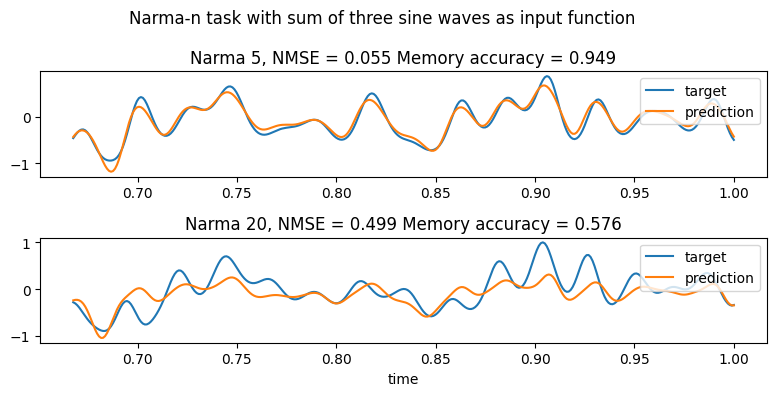

In [18]:
#Plot results
fig, axs = plt.subplots(len(n_list), 1, figsize=(8, 4))
fig.suptitle('Narma-n task with sum of three sine waves as input function')

for i in range(len(n_list)):
    axs[i].plot(test_res.t_test, target_list[i], label = 'target')
    axs[i].plot(test_res.t_test, predictions_list[i], label = 'prediction')
    axs[i].legend(loc = 'upper right')
    axs[i].set_title(f'Narma {str(n_list[i])}, NMSE = {np.round(nmse_list[i],3)} Memory accuracy = {np.round(ma_list[i],3)}')

axs[-1].set_xlabel('time')
fig.tight_layout()

<h1 style="font-size: 20px;">NARMA Task Performance</h1>

In [19]:
target_func_name = 'Narma' #Target function name
input_func_name = 'Random_sin' #Input function name

evolution_rates = list(range(20, 500, 25)) #Different evolution rates to test
ns = [5, 20] #Different Narma tasks to test

V = 1 #Multiplexing factor
repetitions = 20 #Number of reservoirs to test
reservoir_seeds = np.random.randint(0, 1000, repetitions) #Seeds for the reservoirs to use the same reservoirs for all tests

results_ma = np.zeros((len(evolution_rates), 4, repetitions))
results_mse = np.zeros((len(evolution_rates), 4, repetitions))

#Test for different evolution rates
for k in range(len(evolution_rates)):
    
    #Test for different reservoirs
    for i in range(repetitions):
        reservoir_seed=reservoir_seeds[i]
        test_res = Tr(input_func_name, evolution_rates[k], V=V, reservoir_seed=int(reservoir_seeds[i]))
        
        #Test for different Narma tasks
        for j in range(len(ns)):
            ma, mse, predictions, test_target = test_res.run_test(target_func_name, ns[j], warmup=100)
            
            results_ma[k, j, i] = ma
            results_mse[k, j, i] = mse

Time to solve ode:  0.44229769706726074
Number of iterations (nfev):  1379
Total time to solve system:  0.2996077537536621
Average time to solve system 0.00021726450598525172


Running Ridge-15: 100%|██████████| 333/333 [00:00<00:00, 60771.15it/s]

matrix: [[0.03456901 0.05257868]
 [0.05257868 0.18998894]]



Running Ridge-16: 100%|██████████| 333/333 [00:00<00:00, 53419.38it/s]


matrix: [[0.07915095 0.05662301]
 [0.05662301 0.1501789 ]]
Time to solve ode:  0.4833548069000244
Number of iterations (nfev):  1403
Total time to solve system:  0.29633641242980957
Average time to solve system 0.00021121625975039883


Running Ridge-17: 100%|██████████| 333/333 [00:00<00:00, 56640.71it/s]


matrix: [[0.11922957 0.1075399 ]
 [0.1075399  0.13268254]]


Running Ridge-18: 100%|██████████| 333/333 [00:00<00:00, 74626.16it/s]


matrix: [[0.0606223  0.06315177]
 [0.06315177 0.11752266]]
Time to solve ode:  0.4265275001525879
Number of iterations (nfev):  1316
Total time to solve system:  0.2667701244354248
Average time to solve system 0.00020271286051324073


Running Ridge-19: 100%|██████████| 333/333 [00:00<00:00, 40859.59it/s]

matrix: [[0.14855213 0.10688459]
 [0.10688459 0.13107704]]



Running Ridge-20: 100%|██████████| 333/333 [00:00<00:00, 71314.95it/s]


matrix: [[0.1110177  0.0857858 ]
 [0.0857858  0.15999343]]
Time to solve ode:  0.4469261169433594
Number of iterations (nfev):  1403
Total time to solve system:  0.279402494430542
Average time to solve system 0.00019914646787636635


Running Ridge-21: 100%|██████████| 333/333 [00:00<00:00, 95201.64it/s]

matrix: [[0.0421986  0.04082233]
 [0.04082233 0.0508185 ]]



Running Ridge-22: 100%|██████████| 333/333 [00:00<00:00, 100028.88it/s]


matrix: [[0.03816655 0.01645303]
 [0.01645303 0.02717565]]
Time to solve ode:  0.4486844539642334
Number of iterations (nfev):  1373
Total time to solve system:  0.294313907623291
Average time to solve system 0.00021435827212184342


Running Ridge-23: 100%|██████████| 333/333 [00:00<00:00, 54524.64it/s]

matrix: [[0.09719128 0.08734248]
 [0.08734248 0.19427825]]



Running Ridge-24: 100%|██████████| 333/333 [00:00<00:00, 165761.12it/s]


matrix: [[0.05482529 0.05045667]
 [0.05045667 0.12174629]]
Time to solve ode:  0.4652853012084961
Number of iterations (nfev):  1256
Total time to solve system:  0.27929043769836426
Average time to solve system 0.00022236499816748745


Running Ridge-25: 100%|██████████| 333/333 [00:00<00:00, 67692.69it/s]


matrix: [[0.07067946 0.05942562]
 [0.05942562 0.14231933]]


Running Ridge-26: 100%|██████████| 333/333 [00:00<00:00, 69961.09it/s]


matrix: [[0.05026635 0.01890525]
 [0.01890525 0.05696719]]
Time to solve ode:  0.4578263759613037
Number of iterations (nfev):  1427
Total time to solve system:  0.2906928062438965
Average time to solve system 0.00020370904431947897


Running Ridge-27: 100%|██████████| 333/333 [00:00<00:00, 58280.96it/s]

matrix: [[0.06127692 0.06218604]
 [0.06218604 0.1722789 ]]



Running Ridge-28: 100%|██████████| 333/333 [00:00<00:00, 55781.11it/s]


matrix: [[0.08238285 0.11162736]
 [0.11162736 0.23085597]]
Time to solve ode:  0.46080756187438965
Number of iterations (nfev):  1349
Total time to solve system:  0.30017542839050293
Average time to solve system 0.00022251699658302663


Running Ridge-29: 100%|██████████| 333/333 [00:00<00:00, 62363.96it/s]

matrix: [[0.13107586 0.09588066]
 [0.09588066 0.12407802]]



Running Ridge-30: 100%|██████████| 333/333 [00:00<00:00, 72017.29it/s]


matrix: [[0.06908489 0.07850695]
 [0.07850695 0.16528822]]
Time to solve ode:  0.4886665344238281
Number of iterations (nfev):  1373
Total time to solve system:  0.33625102043151855
Average time to solve system 0.0002449024183769254


Running Ridge-31: 100%|██████████| 333/333 [00:00<00:00, 43878.71it/s]

matrix: [[0.08633364 0.10328733]
 [0.10328733 0.19324435]]



Running Ridge-32: 100%|██████████| 333/333 [00:00<00:00, 110963.95it/s]


matrix: [[0.06164354 0.07616225]
 [0.07616225 0.20135424]]
Time to solve ode:  0.45740842819213867
Number of iterations (nfev):  1409
Total time to solve system:  0.3184792995452881
Average time to solve system 0.00022603215013860048


Running Ridge-33: 100%|██████████| 333/333 [00:00<00:00, 66109.87it/s]

matrix: [[0.05196227 0.0627392 ]
 [0.0627392  0.15761338]]



Running Ridge-34: 100%|██████████| 333/333 [00:00<00:00, 195808.67it/s]


matrix: [[0.08333668 0.07256392]
 [0.07256392 0.11650907]]
Time to solve ode:  0.4490504264831543
Number of iterations (nfev):  1364
Total time to solve system:  0.2709689140319824
Average time to solve system 0.00019865756160702524


Running Ridge-35: 100%|██████████| 333/333 [00:00<00:00, 76272.57it/s]

matrix: [[0.06791927 0.05412502]
 [0.05412502 0.12279883]]



Running Ridge-36: 100%|██████████| 333/333 [00:00<00:00, 67333.71it/s]


matrix: [[0.05240337 0.05603495]
 [0.05603495 0.1424248 ]]
Time to solve ode:  0.42639970779418945
Number of iterations (nfev):  1301
Total time to solve system:  0.28212499618530273
Average time to solve system 0.0002168524182823234


Running Ridge-37: 100%|██████████| 333/333 [00:00<00:00, 43114.78it/s]

matrix: [[0.11823692 0.11449012]
 [0.11449012 0.140856  ]]



Running Ridge-38: 100%|██████████| 333/333 [00:00<00:00, 26944.14it/s]


matrix: [[0.07986991 0.08358171]
 [0.08358171 0.12830672]]
Time to solve ode:  0.41297459602355957
Number of iterations (nfev):  1259
Total time to solve system:  0.2818162441253662
Average time to solve system 0.00022384133766907563


Running Ridge-39: 100%|██████████| 333/333 [00:00<00:00, 62781.64it/s]

matrix: [[0.13708297 0.12932129]
 [0.12932129 0.16578662]]



Running Ridge-40: 100%|██████████| 333/333 [00:00<00:00, 164202.12it/s]


matrix: [[0.14131298 0.12996885]
 [0.12996885 0.16365623]]
Time to solve ode:  0.4349961280822754
Number of iterations (nfev):  1349
Total time to solve system:  0.2773556709289551
Average time to solve system 0.00020560094212672726


Running Ridge-41: 100%|██████████| 333/333 [00:00<00:00, 30760.32it/s]


matrix: [[0.05055527 0.04882114]
 [0.04882114 0.09854832]]


Running Ridge-42: 100%|██████████| 333/333 [00:00<00:00, 47874.93it/s]


matrix: [[0.02682567 0.01777603]
 [0.01777603 0.0897878 ]]
Time to solve ode:  0.4384627342224121
Number of iterations (nfev):  1370
Total time to solve system:  0.29250168800354004
Average time to solve system 0.0002135048817544088


Running Ridge-43: 100%|██████████| 333/333 [00:00<00:00, 34265.68it/s]

matrix: [[0.12001545 0.11526769]
 [0.11526769 0.13959464]]



Running Ridge-44: 100%|██████████| 333/333 [00:00<00:00, 50009.07it/s]


matrix: [[0.07249051 0.07938142]
 [0.07938142 0.12282611]]
Time to solve ode:  0.43905067443847656
Number of iterations (nfev):  1352
Total time to solve system:  0.25795555114746094
Average time to solve system 0.0001907955259966427


Running Ridge-45: 100%|██████████| 333/333 [00:00<00:00, 50349.79it/s]

matrix: [[0.04872041 0.05516548]
 [0.05516548 0.126619  ]]



Running Ridge-46: 100%|██████████| 333/333 [00:00<00:00, 93807.73it/s]


matrix: [[0.04330822 0.02930829]
 [0.02930829 0.0784233 ]]
Time to solve ode:  0.4193999767303467
Number of iterations (nfev):  1304
Total time to solve system:  0.2725253105163574
Average time to solve system 0.00020899180254321887


Running Ridge-47: 100%|██████████| 333/333 [00:00<00:00, 58157.20it/s]

matrix: [[0.05240835 0.04781181]
 [0.04781181 0.13119984]]



Running Ridge-48: 100%|██████████| 333/333 [00:00<00:00, 45235.89it/s]


matrix: [[0.05242705 0.03946017]
 [0.03946017 0.06550319]]
Time to solve ode:  0.5113339424133301
Number of iterations (nfev):  1367
Total time to solve system:  0.3278825283050537
Average time to solve system 0.00023985554374912488


Running Ridge-49: 100%|██████████| 333/333 [00:00<00:00, 44674.49it/s]

matrix: [[0.05533605 0.06264602]
 [0.06264602 0.13282599]]



Running Ridge-50: 100%|██████████| 333/333 [00:00<?, ?it/s]


matrix: [[0.06542402 0.06041219]
 [0.06041219 0.21953957]]
Time to solve ode:  0.4887723922729492
Number of iterations (nfev):  1394
Total time to solve system:  0.3051745891571045
Average time to solve system 0.00021892007830495301


Running Ridge-51: 100%|██████████| 333/333 [00:00<00:00, 61670.05it/s]


matrix: [[0.07667646 0.08457772]
 [0.08457772 0.18928617]]


Running Ridge-52: 100%|██████████| 333/333 [00:00<00:00, 67896.71it/s]


matrix: [[0.02892388 0.02502443]
 [0.02502443 0.0950027 ]]
Time to solve ode:  0.4303567409515381
Number of iterations (nfev):  1349
Total time to solve system:  0.27118420600891113
Average time to solve system 0.00020102609785686517


Running Ridge-53: 100%|██████████| 333/333 [00:00<00:00, 59885.23it/s]

matrix: [[0.04318879 0.04727189]
 [0.04727189 0.13315306]]



Running Ridge-54: 100%|██████████| 333/333 [00:00<00:00, 70080.44it/s]


matrix: [[0.09113941 0.06059887]
 [0.06059887 0.20367898]]
Time to solve ode:  0.5612843036651611
Number of iterations (nfev):  1742
Total time to solve system:  0.3529331684112549
Average time to solve system 0.00020260227807764345


Running Ridge-55: 100%|██████████| 333/333 [00:00<00:00, 33379.62it/s]

matrix: [[0.07961777 0.06155639]
 [0.06155639 0.12941596]]



Running Ridge-56: 100%|██████████| 333/333 [00:00<00:00, 221277.44it/s]


matrix: [[0.13686281 0.09920983]
 [0.09920983 0.08566246]]
Time to solve ode:  0.5385606288909912
Number of iterations (nfev):  1664
Total time to solve system:  0.34297943115234375
Average time to solve system 0.0002061174466059758


Running Ridge-57: 100%|██████████| 333/333 [00:00<?, ?it/s]

matrix: [[0.05657561 0.07809472]
 [0.07809472 0.11924307]]



Running Ridge-58: 100%|██████████| 333/333 [00:00<00:00, 65941.33it/s]


matrix: [[0.06657347 0.07712596]
 [0.07712596 0.10459854]]
Time to solve ode:  0.5609009265899658
Number of iterations (nfev):  1736
Total time to solve system:  0.3996284008026123
Average time to solve system 0.00023020069170657392


Running Ridge-59: 100%|██████████| 333/333 [00:00<00:00, 56126.31it/s]

matrix: [[0.07186549 0.09398856]
 [0.09398856 0.1756719 ]]



Running Ridge-60: 100%|██████████| 333/333 [00:00<00:00, 81236.74it/s]


matrix: [[0.06704592 0.07612843]
 [0.07612843 0.11552371]]
Time to solve ode:  0.53128981590271
Number of iterations (nfev):  1631
Total time to solve system:  0.37141966819763184
Average time to solve system 0.00022772511845348364


Running Ridge-61: 100%|██████████| 333/333 [00:00<00:00, 39113.48it/s]

matrix: [[0.07546459 0.08480482]
 [0.08480482 0.10976468]]



Running Ridge-62: 100%|██████████| 333/333 [00:00<00:00, 220648.22it/s]


matrix: [[0.03701083 0.04403823]
 [0.04403823 0.0802411 ]]
Time to solve ode:  0.5998823642730713
Number of iterations (nfev):  1808
Total time to solve system:  0.3988761901855469
Average time to solve system 0.0002206173618282892


Running Ridge-63: 100%|██████████| 333/333 [00:00<00:00, 50935.53it/s]


matrix: [[0.10041168 0.07215291]
 [0.07215291 0.16560555]]


Running Ridge-64: 100%|██████████| 333/333 [00:00<00:00, 60127.57it/s]


matrix: [[0.10703388 0.11612208]
 [0.11612208 0.17730151]]
Time to solve ode:  0.6438937187194824
Number of iterations (nfev):  1766
Total time to solve system:  0.43272852897644043
Average time to solve system 0.0002450331421157647


Running Ridge-65: 100%|██████████| 333/333 [00:00<00:00, 52207.35it/s]

matrix: [[0.09152007 0.07119869]
 [0.07119869 0.17865868]]



Running Ridge-66: 100%|██████████| 333/333 [00:00<00:00, 49069.11it/s]


matrix: [[0.11912595 0.13305656]
 [0.13305656 0.16755463]]
Time to solve ode:  0.5805497169494629
Number of iterations (nfev):  1814
Total time to solve system:  0.3802509307861328
Average time to solve system 0.00020962013825034885


Running Ridge-67: 100%|██████████| 333/333 [00:00<00:00, 100057.54it/s]

matrix: [[0.06928884 0.0513718 ]
 [0.0513718  0.2127671 ]]



Running Ridge-68: 100%|██████████| 333/333 [00:00<00:00, 59900.64it/s]


matrix: [[0.09882632 0.09926307]
 [0.09926307 0.12930738]]
Time to solve ode:  0.5634326934814453
Number of iterations (nfev):  1757
Total time to solve system:  0.36914491653442383
Average time to solve system 0.00021009955408902894


Running Ridge-69: 100%|██████████| 333/333 [00:00<00:00, 83151.95it/s]

matrix: [[0.09563626 0.096995  ]
 [0.096995   0.12928729]]



Running Ridge-70: 100%|██████████| 333/333 [00:00<00:00, 87408.68it/s]


matrix: [[0.07397815 0.0865866 ]
 [0.0865866  0.12786217]]
Time to solve ode:  0.6056275367736816
Number of iterations (nfev):  1877
Total time to solve system:  0.3827860355377197
Average time to solve system 0.0002039350215970803


Running Ridge-71: 100%|██████████| 333/333 [00:00<00:00, 58488.41it/s]

matrix: [[0.0953419  0.08544692]
 [0.08544692 0.13546262]]



Running Ridge-72: 100%|██████████| 333/333 [00:00<00:00, 159568.52it/s]


matrix: [[0.13339792 0.14753567]
 [0.14753567 0.20963026]]
Time to solve ode:  0.554084062576294
Number of iterations (nfev):  1715
Total time to solve system:  0.36644577980041504
Average time to solve system 0.00021367100862997962


Running Ridge-73: 100%|██████████| 333/333 [00:00<00:00, 62478.34it/s]

matrix: [[0.08326053 0.07215361]
 [0.07215361 0.1412984 ]]



Running Ridge-74: 100%|██████████| 333/333 [00:00<00:00, 25586.27it/s]


matrix: [[0.15184482 0.15235372]
 [0.15235372 0.1719628 ]]
Time to solve ode:  0.6678552627563477
Number of iterations (nfev):  1820
Total time to solve system:  0.44739866256713867
Average time to solve system 0.00024582344097095533


Running Ridge-75: 100%|██████████| 333/333 [00:00<00:00, 63849.29it/s]

matrix: [[0.02982767 0.02528074]
 [0.02528074 0.11994346]]



Running Ridge-76: 100%|██████████| 333/333 [00:00<00:00, 54167.28it/s]


matrix: [[0.0672143  0.06197183]
 [0.06197183 0.08223414]]
Time to solve ode:  0.6171488761901855
Number of iterations (nfev):  1880
Total time to solve system:  0.4213521480560303
Average time to solve system 0.00022412348300852674


Running Ridge-77: 100%|██████████| 333/333 [00:00<00:00, 40122.47it/s]

matrix: [[0.07859526 0.08019371]
 [0.08019371 0.09157705]]



Running Ridge-78: 100%|██████████| 333/333 [00:00<00:00, 40870.35it/s]


matrix: [[0.06241719 0.07246181]
 [0.07246181 0.09637999]]
Time to solve ode:  0.5337123870849609
Number of iterations (nfev):  1637
Total time to solve system:  0.345334529876709
Average time to solve system 0.00021095572991857605


Running Ridge-79: 100%|██████████| 333/333 [00:00<00:00, 39285.10it/s]

matrix: [[0.16368735 0.15439804]
 [0.15439804 0.17883541]]



Running Ridge-80: 100%|██████████| 333/333 [00:00<00:00, 28999.51it/s]


matrix: [[0.07229006 0.08861772]
 [0.08861772 0.18142245]]
Time to solve ode:  0.6053464412689209
Number of iterations (nfev):  1856
Total time to solve system:  0.41924571990966797
Average time to solve system 0.00022588670253753662


Running Ridge-81: 100%|██████████| 333/333 [00:00<00:00, 122960.05it/s]

matrix: [[0.06230655 0.02826911]
 [0.02826911 0.06809429]]



Running Ridge-82: 100%|██████████| 333/333 [00:00<00:00, 76048.31it/s]


matrix: [[0.16481844 0.12893052]
 [0.12893052 0.13918689]]
Time to solve ode:  0.5794157981872559
Number of iterations (nfev):  1679
Total time to solve system:  0.3266470432281494
Average time to solve system 0.00019454856654446063


Running Ridge-83: 100%|██████████| 333/333 [00:00<00:00, 72128.86it/s]

matrix: [[0.13101599 0.12029875]
 [0.12029875 0.1203581 ]]



Running Ridge-84: 100%|██████████| 333/333 [00:00<00:00, 60463.34it/s]


matrix: [[0.12019745 0.13896796]
 [0.13896796 0.18460883]]
Time to solve ode:  0.5651702880859375
Number of iterations (nfev):  1715
Total time to solve system:  0.37902116775512695
Average time to solve system 0.0002210035963586746


Running Ridge-85: 100%|██████████| 333/333 [00:00<00:00, 21463.31it/s]

matrix: [[0.06683303 0.04770471]
 [0.04770471 0.16982021]]



Running Ridge-86: 100%|██████████| 333/333 [00:00<00:00, 61943.55it/s]


matrix: [[0.08842139 0.10549408]
 [0.10549408 0.16452079]]
Time to solve ode:  0.5465517044067383
Number of iterations (nfev):  1679
Total time to solve system:  0.37254953384399414
Average time to solve system 0.00022188775094937114


Running Ridge-87: 100%|██████████| 333/333 [00:00<00:00, 92472.41it/s]

matrix: [[0.0749867  0.06429868]
 [0.06429868 0.15096364]]



Running Ridge-88: 100%|██████████| 333/333 [00:00<00:00, 69140.30it/s]


matrix: [[0.20416624 0.18501885]
 [0.18501885 0.18823358]]
Time to solve ode:  0.572084903717041
Number of iterations (nfev):  1745
Total time to solve system:  0.3599400520324707
Average time to solve system 0.00020626937079224681


Running Ridge-89: 100%|██████████| 333/333 [00:00<00:00, 143975.18it/s]

matrix: [[0.10906598 0.10950854]
 [0.10950854 0.15459516]]



Running Ridge-90: 100%|██████████| 333/333 [00:00<00:00, 93525.06it/s]


matrix: [[0.10657599 0.12628928]
 [0.12628928 0.18483681]]
Time to solve ode:  0.5616896152496338
Number of iterations (nfev):  1700
Total time to solve system:  0.39379143714904785
Average time to solve system 0.0002316420218523811


Running Ridge-91: 100%|██████████| 333/333 [00:00<00:00, 21419.86it/s]

matrix: [[0.02375452 0.03058435]
 [0.03058435 0.1030577 ]]



Running Ridge-92: 100%|██████████| 333/333 [00:00<00:00, 75160.27it/s]


matrix: [[0.05321916 0.05958242]
 [0.05958242 0.09036422]]
Time to solve ode:  0.5226235389709473
Number of iterations (nfev):  1628
Total time to solve system:  0.3437955379486084
Average time to solve system 0.00021117662036155307


Running Ridge-93: 100%|██████████| 333/333 [00:00<00:00, 50435.24it/s]

matrix: [[0.01194102 0.01334638]
 [0.01334638 0.06931545]]



Running Ridge-94: 100%|██████████| 333/333 [00:00<00:00, 191381.64it/s]


matrix: [[0.03143821 0.03597981]
 [0.03597981 0.04739908]]
Time to solve ode:  0.6434545516967773
Number of iterations (nfev):  1988
Total time to solve system:  0.4269247055053711
Average time to solve system 0.00021475085790008606


Running Ridge-95: 100%|██████████| 333/333 [00:00<00:00, 72263.21it/s]

matrix: [[0.05341951 0.05964715]
 [0.05964715 0.10615067]]



Running Ridge-96: 100%|██████████| 333/333 [00:00<00:00, 68796.34it/s]


matrix: [[0.09904588 0.09699995]
 [0.09699995 0.1086327 ]]
Time to solve ode:  0.621422529220581
Number of iterations (nfev):  1934
Total time to solve system:  0.40708374977111816
Average time to solve system 0.00021048797816500421


Running Ridge-97: 100%|██████████| 333/333 [00:00<00:00, 38217.68it/s]

matrix: [[0.12372718 0.1256196 ]
 [0.1256196  0.13619775]]



Running Ridge-98: 100%|██████████| 333/333 [00:00<00:00, 44128.25it/s]


matrix: [[0.12431339 0.13850553]
 [0.13850553 0.17310674]]
Time to solve ode:  0.6940934658050537
Number of iterations (nfev):  2120
Total time to solve system:  0.47913455963134766
Average time to solve system 0.00022600686775063567


Running Ridge-99: 100%|██████████| 333/333 [00:00<00:00, 38768.24it/s]

matrix: [[0.05788881 0.04559609]
 [0.04559609 0.15404912]]



Running Ridge-100: 100%|██████████| 333/333 [00:00<00:00, 24956.73it/s]


matrix: [[0.1830495  0.14344025]
 [0.14344025 0.14545027]]
Time to solve ode:  0.636528491973877
Number of iterations (nfev):  1982
Total time to solve system:  0.4094045162200928
Average time to solve system 0.00020656130989913862


Running Ridge-101: 100%|██████████| 333/333 [00:00<00:00, 36347.87it/s]

matrix: [[0.28189387 0.22867882]
 [0.22867882 0.21024057]]



Running Ridge-102: 100%|██████████| 333/333 [00:00<00:00, 38591.49it/s]


matrix: [[0.184442   0.15751372]
 [0.15751372 0.15800917]]
Time to solve ode:  0.6581695079803467
Number of iterations (nfev):  2039
Total time to solve system:  0.44248175621032715
Average time to solve system 0.00021700919872992994


Running Ridge-103: 100%|██████████| 333/333 [00:00<00:00, 60720.95it/s]


matrix: [[0.09908772 0.09903704]
 [0.09903704 0.15650309]]


Running Ridge-104: 100%|██████████| 333/333 [00:00<00:00, 71636.83it/s]


matrix: [[0.13606269 0.13506317]
 [0.13506317 0.15470312]]
Time to solve ode:  0.608400821685791
Number of iterations (nfev):  1736
Total time to solve system:  0.3844795227050781
Average time to solve system 0.00022147437943840907


Running Ridge-105: 100%|██████████| 333/333 [00:00<00:00, 83670.00it/s]

matrix: [[0.10059211 0.10686692]
 [0.10686692 0.12608284]]



Running Ridge-106: 100%|██████████| 333/333 [00:00<00:00, 147611.84it/s]


matrix: [[0.10678187 0.10295141]
 [0.10295141 0.11623631]]
Time to solve ode:  0.6527764797210693
Number of iterations (nfev):  1910
Total time to solve system:  0.3912081718444824
Average time to solve system 0.00020482103237931017


Running Ridge-107: 100%|██████████| 333/333 [00:00<00:00, 38045.91it/s]

matrix: [[0.10639089 0.1149615 ]
 [0.1149615  0.14757012]]



Running Ridge-108: 100%|██████████| 333/333 [00:00<00:00, 64680.15it/s]


matrix: [[0.1192783  0.10539266]
 [0.10539266 0.11569141]]
Time to solve ode:  0.7014191150665283
Number of iterations (nfev):  2096
Total time to solve system:  0.4410429000854492
Average time to solve system 0.00021042123095679828


Running Ridge-109: 100%|██████████| 333/333 [00:00<00:00, 59333.19it/s]


matrix: [[0.06762675 0.07391335]
 [0.07391335 0.09850873]]


Running Ridge-110: 100%|██████████| 333/333 [00:00<00:00, 35815.66it/s]


matrix: [[0.08817782 0.10599269]
 [0.10599269 0.1640173 ]]
Time to solve ode:  0.663489580154419
Number of iterations (nfev):  1952
Total time to solve system:  0.40940189361572266
Average time to solve system 0.0002097345766473989


Running Ridge-111: 100%|██████████| 333/333 [00:00<00:00, 256935.84it/s]


matrix: [[0.07007318 0.08103082]
 [0.08103082 0.14127011]]


Running Ridge-112: 100%|██████████| 333/333 [00:00<00:00, 62900.39it/s]


matrix: [[0.07468043 0.06902375]
 [0.06902375 0.07657885]]
Time to solve ode:  0.6021959781646729
Number of iterations (nfev):  1883
Total time to solve system:  0.4320051670074463
Average time to solve system 0.00022942388051377924


Running Ridge-113: 100%|██████████| 333/333 [00:00<00:00, 106529.12it/s]

matrix: [[0.09623173 0.09076398]
 [0.09076398 0.12838581]]



Running Ridge-114: 100%|██████████| 333/333 [00:00<00:00, 60980.76it/s]


matrix: [[0.06225319 0.07190764]
 [0.07190764 0.09857801]]
Time to solve ode:  0.6784627437591553
Number of iterations (nfev):  2063
Total time to solve system:  0.41024160385131836
Average time to solve system 0.00019885681233704235


Running Ridge-115: 100%|██████████| 333/333 [00:00<00:00, 61599.33it/s]

matrix: [[0.11624043 0.10122422]
 [0.10122422 0.20863191]]



Running Ridge-116: 100%|██████████| 333/333 [00:00<00:00, 113286.01it/s]


matrix: [[0.11507091 0.10656723]
 [0.10656723 0.12607024]]
Time to solve ode:  0.6409571170806885
Number of iterations (nfev):  2006
Total time to solve system:  0.39557433128356934
Average time to solve system 0.00019719557890506947


Running Ridge-117: 100%|██████████| 333/333 [00:00<00:00, 77763.11it/s]

matrix: [[0.14801549 0.15976914]
 [0.15976914 0.18120077]]



Running Ridge-118: 100%|██████████| 333/333 [00:00<00:00, 49190.08it/s]


matrix: [[0.1301912  0.14667765]
 [0.14667765 0.19725288]]
Time to solve ode:  0.700690746307373
Number of iterations (nfev):  2171
Total time to solve system:  0.4622633457183838
Average time to solve system 0.0002129264604875098


Running Ridge-119: 100%|██████████| 333/333 [00:00<00:00, 73475.89it/s]

matrix: [[0.13560597 0.1294215 ]
 [0.1294215  0.15426864]]



Running Ridge-120: 100%|██████████| 333/333 [00:00<00:00, 46703.11it/s]


matrix: [[0.16049752 0.12889821]
 [0.12889821 0.12633353]]
Time to solve ode:  0.6112992763519287
Number of iterations (nfev):  1823
Total time to solve system:  0.39055562019348145
Average time to solve system 0.0002142378607753601


Running Ridge-121: 100%|██████████| 333/333 [00:00<?, ?it/s]

matrix: [[0.09774856 0.09206563]
 [0.09206563 0.1081863 ]]



Running Ridge-122: 100%|██████████| 333/333 [00:00<00:00, 107961.91it/s]


matrix: [[0.10318084 0.09511373]
 [0.09511373 0.09727226]]
Time to solve ode:  0.6572813987731934
Number of iterations (nfev):  2003
Total time to solve system:  0.42629432678222656
Average time to solve system 0.00021282792150885


Running Ridge-123: 100%|██████████| 333/333 [00:00<00:00, 30736.63it/s]

matrix: [[0.22623182 0.2332588 ]
 [0.2332588  0.25427112]]



Running Ridge-124: 100%|██████████| 333/333 [00:00<00:00, 40210.26it/s]


matrix: [[0.11677646 0.12683272]
 [0.12683272 0.18172574]]
Time to solve ode:  0.593803882598877
Number of iterations (nfev):  1847
Total time to solve system:  0.3811306953430176
Average time to solve system 0.00020635121567028563


Running Ridge-125: 100%|██████████| 333/333 [00:00<00:00, 53704.90it/s]

matrix: [[0.06613874 0.05907901]
 [0.05907901 0.12059162]]



Running Ridge-126: 100%|██████████| 333/333 [00:00<00:00, 127774.52it/s]


matrix: [[0.10126632 0.1047612 ]
 [0.1047612  0.13225456]]
Time to solve ode:  0.6113278865814209
Number of iterations (nfev):  1874
Total time to solve system:  0.37192654609680176
Average time to solve system 0.00019846667347748226


Running Ridge-127: 100%|██████████| 333/333 [00:00<00:00, 42398.86it/s]

matrix: [[0.08577342 0.08019876]
 [0.08019876 0.09462435]]



Running Ridge-128: 100%|██████████| 333/333 [00:00<00:00, 82043.19it/s]


matrix: [[0.09991943 0.08720414]
 [0.08720414 0.08709444]]
Time to solve ode:  0.674837589263916
Number of iterations (nfev):  2090
Total time to solve system:  0.4283285140991211
Average time to solve system 0.0002049418727746991


Running Ridge-129: 100%|██████████| 333/333 [00:00<00:00, 28107.77it/s]

matrix: [[0.09275759 0.10468236]
 [0.10468236 0.17161809]]



Running Ridge-130: 100%|██████████| 333/333 [00:00<00:00, 50297.21it/s]


matrix: [[0.13495753 0.15647295]
 [0.15647295 0.22946012]]
Time to solve ode:  0.6543076038360596
Number of iterations (nfev):  2015
Total time to solve system:  0.44643592834472656
Average time to solve system 0.00022155629198249458


Running Ridge-131: 100%|██████████| 333/333 [00:00<00:00, 118686.54it/s]

matrix: [[0.04321994 0.05547646]
 [0.05547646 0.14917622]]



Running Ridge-132: 100%|██████████| 333/333 [00:00<00:00, 63167.80it/s]


matrix: [[0.07869111 0.07973632]
 [0.07973632 0.10432921]]
Time to solve ode:  0.6159243583679199
Number of iterations (nfev):  1898
Total time to solve system:  0.3905665874481201
Average time to solve system 0.000205777970204489


Running Ridge-133: 100%|██████████| 333/333 [00:00<00:00, 55572.48it/s]

matrix: [[0.04955042 0.05008966]
 [0.05008966 0.10103075]]



Running Ridge-134: 100%|██████████| 333/333 [00:00<00:00, 68375.35it/s]


matrix: [[0.05079345 0.05711439]
 [0.05711439 0.07746114]]
Time to solve ode:  0.6066415309906006
Number of iterations (nfev):  1787
Total time to solve system:  0.38964080810546875
Average time to solve system 0.00021804186239813585


Running Ridge-135: 100%|██████████| 333/333 [00:00<00:00, 54043.62it/s]

matrix: [[0.10539304 0.09784576]
 [0.09784576 0.09416879]]



Running Ridge-136: 100%|██████████| 333/333 [00:00<00:00, 72013.57it/s]


matrix: [[0.10502666 0.09488781]
 [0.09488781 0.09059567]]
Time to solve ode:  0.6575021743774414
Number of iterations (nfev):  1985
Total time to solve system:  0.42888355255126953
Average time to solve system 0.00021606224309887634


Running Ridge-137: 100%|██████████| 333/333 [00:00<00:00, 75693.87it/s]

matrix: [[0.09658868 0.08894443]
 [0.08894443 0.0887366 ]]



Running Ridge-138: 100%|██████████| 333/333 [00:00<00:00, 115296.62it/s]


matrix: [[0.05869326 0.04539031]
 [0.04539031 0.05162113]]
Time to solve ode:  0.6018218994140625
Number of iterations (nfev):  1841
Total time to solve system:  0.3934812545776367
Average time to solve system 0.0002137323490372823


Running Ridge-139: 100%|██████████| 333/333 [00:00<00:00, 58675.15it/s]


matrix: [[0.11902275 0.0841017 ]
 [0.0841017  0.08944834]]


Running Ridge-140: 100%|██████████| 333/333 [00:00<00:00, 34766.35it/s]


matrix: [[0.08839072 0.0850223 ]
 [0.0850223  0.08555657]]
Time to solve ode:  0.6584043502807617
Number of iterations (nfev):  2060
Total time to solve system:  0.4059896469116211
Average time to solve system 0.00019708235286971897


Running Ridge-141: 100%|██████████| 333/333 [00:00<00:00, 40234.58it/s]

matrix: [[0.09497934 0.0851472 ]
 [0.0851472  0.08513042]]



Running Ridge-142: 100%|██████████| 333/333 [00:00<00:00, 119366.14it/s]


matrix: [[0.08476111 0.08947187]
 [0.08947187 0.12442751]]
Time to solve ode:  0.6491544246673584
Number of iterations (nfev):  2018
Total time to solve system:  0.43280696868896484
Average time to solve system 0.00021447322531663272


Running Ridge-143: 100%|██████████| 333/333 [00:00<00:00, 41592.07it/s]

matrix: [[0.07259684 0.08451115]
 [0.08451115 0.14553806]]



Running Ridge-144: 100%|██████████| 333/333 [00:00<00:00, 26636.34it/s]


matrix: [[0.13880311 0.13087667]
 [0.13087667 0.15476817]]
Time to solve ode:  0.696587085723877
Number of iterations (nfev):  2150
Total time to solve system:  0.46388745307922363
Average time to solve system 0.00021576160608335982


Running Ridge-145: 100%|██████████| 333/333 [00:00<00:00, 42365.42it/s]

matrix: [[0.09525436 0.0824936 ]
 [0.0824936  0.07723125]]



Running Ridge-146: 100%|██████████| 333/333 [00:00<00:00, 84179.32it/s]


matrix: [[0.0522678  0.05448702]
 [0.05448702 0.06520277]]
Time to solve ode:  0.6631631851196289
Number of iterations (nfev):  2054
Total time to solve system:  0.43804216384887695
Average time to solve system 0.00021326298142593814


Running Ridge-147: 100%|██████████| 333/333 [00:00<00:00, 50116.73it/s]


matrix: [[0.21494032 0.20896828]
 [0.20896828 0.21897427]]


Running Ridge-148: 100%|██████████| 333/333 [00:00<00:00, 44424.40it/s]


matrix: [[0.10185865 0.11027178]
 [0.11027178 0.16692013]]
Time to solve ode:  0.6188294887542725
Number of iterations (nfev):  1883
Total time to solve system:  0.37406349182128906
Average time to solve system 0.00019865294308087577


Running Ridge-149: 100%|██████████| 333/333 [00:00<00:00, 51019.26it/s]

matrix: [[0.09365754 0.11156928]
 [0.11156928 0.15829708]]



Running Ridge-150: 100%|██████████| 333/333 [00:00<00:00, 115716.92it/s]


matrix: [[0.10048986 0.11314299]
 [0.11314299 0.13978291]]
Time to solve ode:  0.7268068790435791
Number of iterations (nfev):  2240
Total time to solve system:  0.47843503952026367
Average time to solve system 0.00021358707121440343


Running Ridge-151: 100%|██████████| 333/333 [00:00<00:00, 61653.71it/s]


matrix: [[0.12804906 0.12743649]
 [0.12743649 0.17968356]]


Running Ridge-152: 100%|██████████| 333/333 [00:00<00:00, 25739.04it/s]


matrix: [[0.09511268 0.08997997]
 [0.08997997 0.10025508]]
Time to solve ode:  0.6267561912536621
Number of iterations (nfev):  1952
Total time to solve system:  0.3595144748687744
Average time to solve system 0.00018417749737129836


Running Ridge-153: 100%|██████████| 333/333 [00:00<00:00, 64349.38it/s]


matrix: [[0.07867512 0.07761685]
 [0.07761685 0.08521272]]


Running Ridge-154: 100%|██████████| 333/333 [00:00<00:00, 34519.74it/s]


matrix: [[0.08446034 0.09495378]
 [0.09495378 0.15522377]]
Time to solve ode:  0.6874358654022217
Number of iterations (nfev):  2078
Total time to solve system:  0.44007158279418945
Average time to solve system 0.00021177650760066864


Running Ridge-155: 100%|██████████| 333/333 [00:00<00:00, 60416.27it/s]

matrix: [[0.09606803 0.10058469]
 [0.10058469 0.11729492]]



Running Ridge-156: 100%|██████████| 333/333 [00:00<00:00, 53382.63it/s]


matrix: [[0.09136961 0.07587489]
 [0.07587489 0.07330519]]
Time to solve ode:  0.6570134162902832
Number of iterations (nfev):  1967
Total time to solve system:  0.39301514625549316
Average time to solve system 0.00019980434481723088


Running Ridge-157: 100%|██████████| 333/333 [00:00<00:00, 48235.37it/s]

matrix: [[0.09443379 0.09394749]
 [0.09394749 0.09942766]]



Running Ridge-158: 100%|██████████| 333/333 [00:00<00:00, 34673.14it/s]


matrix: [[0.12659353 0.10980774]
 [0.10980774 0.10618138]]
Time to solve ode:  0.6269712448120117
Number of iterations (nfev):  1943
Total time to solve system:  0.3750190734863281
Average time to solve system 0.0001930103311818467


Running Ridge-159: 100%|██████████| 333/333 [00:00<00:00, 24546.63it/s]

matrix: [[0.0646052  0.06875407]
 [0.06875407 0.08813412]]



Running Ridge-160: 100%|██████████| 333/333 [00:00<00:00, 33640.10it/s]


matrix: [[0.06732776 0.06020945]
 [0.06020945 0.0704188 ]]
Time to solve ode:  0.6505222320556641
Number of iterations (nfev):  1979
Total time to solve system:  0.42415499687194824
Average time to solve system 0.00021432794182513806


Running Ridge-161: 100%|██████████| 333/333 [00:00<00:00, 85294.85it/s]

matrix: [[0.07246655 0.07041561]
 [0.07041561 0.07245104]]



Running Ridge-162: 100%|██████████| 333/333 [00:00<00:00, 62590.33it/s]


matrix: [[0.06928218 0.0666072 ]
 [0.0666072  0.08432092]]
Time to solve ode:  0.7142322063446045
Number of iterations (nfev):  2153
Total time to solve system:  0.4812648296356201
Average time to solve system 0.00022353220140994897


Running Ridge-163: 100%|██████████| 333/333 [00:00<00:00, 47983.48it/s]

matrix: [[0.20824298 0.21458774]
 [0.21458774 0.2332122 ]]



Running Ridge-164: 100%|██████████| 333/333 [00:00<00:00, 50188.77it/s]


matrix: [[0.20697174 0.20277144]
 [0.20277144 0.23101891]]
Time to solve ode:  0.6973180770874023
Number of iterations (nfev):  2135
Total time to solve system:  0.4085569381713867
Average time to solve system 0.00019136156354631695


Running Ridge-165: 100%|██████████| 333/333 [00:00<00:00, 73367.82it/s]

matrix: [[0.10154669 0.11218955]
 [0.11218955 0.16587506]]



Running Ridge-166: 100%|██████████| 333/333 [00:00<00:00, 55495.20it/s]


matrix: [[0.07484611 0.07346163]
 [0.07346163 0.08837127]]
Time to solve ode:  0.6629636287689209
Number of iterations (nfev):  2039
Total time to solve system:  0.4496581554412842
Average time to solve system 0.00022052876676865335


Running Ridge-167: 100%|██████████| 333/333 [00:00<00:00, 60943.50it/s]

matrix: [[0.12452631 0.1345981 ]
 [0.1345981  0.15737373]]



Running Ridge-168: 100%|██████████| 333/333 [00:00<00:00, 48893.90it/s]


matrix: [[0.1572111  0.14966813]
 [0.14966813 0.15416243]]
Time to solve ode:  0.658639669418335
Number of iterations (nfev):  2039
Total time to solve system:  0.492032527923584
Average time to solve system 0.00024131070521019323


Running Ridge-169: 100%|██████████| 333/333 [00:00<00:00, 60309.31it/s]

matrix: [[0.11973028 0.12704271]
 [0.12704271 0.19089168]]



Running Ridge-170: 100%|██████████| 333/333 [00:00<00:00, 91323.61it/s]


matrix: [[0.1665904  0.1578511 ]
 [0.1578511  0.17035101]]
Time to solve ode:  0.6665482521057129
Number of iterations (nfev):  2048
Total time to solve system:  0.447573184967041
Average time to solve system 0.000218541594222188


Running Ridge-171: 100%|██████████| 333/333 [00:00<00:00, 106456.04it/s]

matrix: [[0.19205581 0.19776302]
 [0.19776302 0.26087301]]



Running Ridge-172: 100%|██████████| 333/333 [00:00<00:00, 65941.33it/s]


matrix: [[0.10713001 0.11003055]
 [0.11003055 0.15788012]]
Time to solve ode:  0.696373701095581
Number of iterations (nfev):  1955
Total time to solve system:  0.45154428482055664
Average time to solve system 0.00023096894364222847


Running Ridge-173: 100%|██████████| 333/333 [00:00<00:00, 54744.77it/s]

matrix: [[0.10113605 0.08814901]
 [0.08814901 0.08421971]]



Running Ridge-174: 100%|██████████| 333/333 [00:00<00:00, 64063.08it/s]


matrix: [[0.07496129 0.07940514]
 [0.07940514 0.09626377]]
Time to solve ode:  0.6507787704467773
Number of iterations (nfev):  2006
Total time to solve system:  0.4490487575531006
Average time to solve system 0.00022385282031560347


Running Ridge-175: 100%|██████████| 333/333 [00:00<00:00, 55273.39it/s]

matrix: [[0.15787628 0.15805575]
 [0.15805575 0.16908352]]



Running Ridge-176: 100%|██████████| 333/333 [00:00<00:00, 55473.16it/s]


matrix: [[0.20083945 0.2078585 ]
 [0.2078585  0.22729408]]
Time to solve ode:  0.649956464767456
Number of iterations (nfev):  2003
Total time to solve system:  0.45543646812438965
Average time to solve system 0.00022737716830973024


Running Ridge-177: 100%|██████████| 333/333 [00:00<00:00, 47427.87it/s]

matrix: [[0.18457977 0.18156768]
 [0.18156768 0.19495396]]



Running Ridge-178: 100%|██████████| 333/333 [00:00<00:00, 69964.60it/s]


matrix: [[0.08405729 0.09333728]
 [0.09333728 0.15321709]]
Time to solve ode:  0.6845080852508545
Number of iterations (nfev):  2147
Total time to solve system:  0.46100878715515137
Average time to solve system 0.00021472230421758332


Running Ridge-179: 100%|██████████| 333/333 [00:00<00:00, 166037.00it/s]

matrix: [[0.086605   0.07109306]
 [0.07109306 0.07544732]]



Running Ridge-180: 100%|██████████| 333/333 [00:00<00:00, 27246.90it/s]


matrix: [[0.12973385 0.10978394]
 [0.10978394 0.10203695]]
Time to solve ode:  0.7401697635650635
Number of iterations (nfev):  2204
Total time to solve system:  0.4701566696166992
Average time to solve system 0.0002133197230565786


Running Ridge-181: 100%|██████████| 333/333 [00:00<00:00, 34310.29it/s]

matrix: [[0.11916829 0.12666132]
 [0.12666132 0.14059722]]



Running Ridge-182: 100%|██████████| 333/333 [00:00<00:00, 35930.83it/s]


matrix: [[0.08119294 0.08971911]
 [0.08971911 0.11348411]]
Time to solve ode:  0.6922590732574463
Number of iterations (nfev):  2132
Total time to solve system:  0.4432351589202881
Average time to solve system 0.00020789641600388748


Running Ridge-183: 100%|██████████| 333/333 [00:00<00:00, 77461.22it/s]

matrix: [[0.14205851 0.12989082]
 [0.12989082 0.18320922]]



Running Ridge-184: 100%|██████████| 333/333 [00:00<00:00, 68820.07it/s]


matrix: [[0.17549711 0.15016911]
 [0.15016911 0.1603715 ]]
Time to solve ode:  0.6497945785522461
Number of iterations (nfev):  1925
Total time to solve system:  0.4171633720397949
Average time to solve system 0.0002167082452154779


Running Ridge-185: 100%|██████████| 333/333 [00:00<00:00, 54522.51it/s]

matrix: [[0.10779507 0.10135823]
 [0.10135823 0.09978363]]



Running Ridge-186: 100%|██████████| 333/333 [00:00<00:00, 56569.59it/s]


matrix: [[0.09648363 0.08043969]
 [0.08043969 0.11210763]]
Time to solve ode:  0.6546111106872559
Number of iterations (nfev):  1883
Total time to solve system:  0.40256261825561523
Average time to solve system 0.00021378790135720405


Running Ridge-187: 100%|██████████| 333/333 [00:00<00:00, 31952.40it/s]


matrix: [[0.18630313 0.19440923]
 [0.19440923 0.21620877]]


Running Ridge-188: 100%|██████████| 333/333 [00:00<00:00, 50859.49it/s]


matrix: [[0.14977312 0.17298813]
 [0.17298813 0.2394137 ]]
Time to solve ode:  0.7413308620452881
Number of iterations (nfev):  2279
Total time to solve system:  0.45590734481811523
Average time to solve system 0.00020004710171922564


Running Ridge-189: 100%|██████████| 333/333 [00:00<00:00, 76712.43it/s]

matrix: [[0.12029659 0.12670206]
 [0.12670206 0.16745138]]



Running Ridge-190: 100%|██████████| 333/333 [00:00<00:00, 51047.23it/s]


matrix: [[0.1026733  0.10009194]
 [0.10009194 0.11871679]]
Time to solve ode:  0.7088921070098877
Number of iterations (nfev):  2177
Total time to solve system:  0.48388075828552246
Average time to solve system 0.00022226952608430062


Running Ridge-191: 100%|██████████| 333/333 [00:00<00:00, 50909.54it/s]

matrix: [[0.11942135 0.12790168]
 [0.12790168 0.15988413]]



Running Ridge-192: 100%|██████████| 333/333 [00:00<00:00, 65074.93it/s]


matrix: [[0.12083873 0.12395898]
 [0.12395898 0.18983097]]
Time to solve ode:  0.6540353298187256
Number of iterations (nfev):  1991
Total time to solve system:  0.4645566940307617
Average time to solve system 0.0002333283244755207


Running Ridge-193: 100%|██████████| 333/333 [00:00<00:00, 161880.30it/s]

matrix: [[0.11040641 0.11889851]
 [0.11889851 0.13191601]]



Running Ridge-194: 100%|██████████| 333/333 [00:00<00:00, 55231.86it/s]


matrix: [[0.11785266 0.13343359]
 [0.13343359 0.18531586]]
Time to solve ode:  0.6779074668884277
Number of iterations (nfev):  2081
Total time to solve system:  0.4233212471008301
Average time to solve system 0.0002034220312834359


Running Ridge-195: 100%|██████████| 333/333 [00:00<00:00, 49428.57it/s]

matrix: [[0.14326883 0.13890467]
 [0.13890467 0.1471393 ]]



Running Ridge-196: 100%|██████████| 333/333 [00:00<00:00, 36442.71it/s]


matrix: [[0.13218126 0.13514748]
 [0.13514748 0.15032053]]
Time to solve ode:  0.6537034511566162
Number of iterations (nfev):  2012
Total time to solve system:  0.41585397720336914
Average time to solve system 0.00020668686739730077


Running Ridge-197: 100%|██████████| 333/333 [00:00<00:00, 28179.22it/s]

matrix: [[0.07315806 0.07044181]
 [0.07044181 0.07098946]]



Running Ridge-198: 100%|██████████| 333/333 [00:00<00:00, 41613.13it/s]


matrix: [[0.06241569 0.0627352 ]
 [0.0627352  0.06771038]]
Time to solve ode:  0.7917563915252686
Number of iterations (nfev):  2288
Total time to solve system:  0.4773101806640625
Average time to solve system 0.00020861458945107628


Running Ridge-199: 100%|██████████| 333/333 [00:00<00:00, 27736.58it/s]


matrix: [[0.10474825 0.11629439]
 [0.11629439 0.17329398]]


Running Ridge-200: 100%|██████████| 333/333 [00:00<00:00, 25448.28it/s]


matrix: [[0.09649953 0.11816363]
 [0.11816363 0.15383268]]
Time to solve ode:  0.8065741062164307
Number of iterations (nfev):  2240
Total time to solve system:  0.517439603805542
Average time to solve system 0.0002309998231274741


Running Ridge-201: 100%|██████████| 333/333 [00:00<00:00, 94929.87it/s]

matrix: [[0.12151071 0.14047873]
 [0.14047873 0.16911708]]



Running Ridge-202: 100%|██████████| 333/333 [00:00<00:00, 19316.03it/s]


matrix: [[0.10276717 0.12992831]
 [0.12992831 0.17731553]]
Time to solve ode:  0.7303919792175293
Number of iterations (nfev):  2267
Total time to solve system:  0.45871925354003906
Average time to solve system 0.00020234638444642218


Running Ridge-203: 100%|██████████| 333/333 [00:00<00:00, 270155.36it/s]

matrix: [[0.07824296 0.07455246]
 [0.07455246 0.07333472]]



Running Ridge-204: 100%|██████████| 333/333 [00:00<00:00, 58481.06it/s]


matrix: [[0.06765776 0.07383139]
 [0.07383139 0.08910735]]
Time to solve ode:  0.7094273567199707
Number of iterations (nfev):  2213
Total time to solve system:  0.47756290435791016
Average time to solve system 0.00021579887228102582


Running Ridge-205: 100%|██████████| 333/333 [00:00<00:00, 66178.78it/s]

matrix: [[0.20073566 0.19713522]
 [0.19713522 0.21103636]]



Running Ridge-206: 100%|██████████| 333/333 [00:00<00:00, 59117.21it/s]


matrix: [[0.16474328 0.15887357]
 [0.15887357 0.17467778]]
Time to solve ode:  0.6605782508850098
Number of iterations (nfev):  2027
Total time to solve system:  0.42697787284851074
Average time to solve system 0.00021064522587494364


Running Ridge-207: 100%|██████████| 333/333 [00:00<00:00, 57324.16it/s]

matrix: [[0.07141994 0.06931965]
 [0.06931965 0.06999143]]



Running Ridge-208: 100%|██████████| 333/333 [00:00<00:00, 158572.12it/s]


matrix: [[0.07316807 0.07872481]
 [0.07872481 0.0972373 ]]
Time to solve ode:  0.7437644004821777
Number of iterations (nfev):  2252
Total time to solve system:  0.523533821105957
Average time to solve system 0.00023247505377706795


Running Ridge-209: 100%|██████████| 333/333 [00:00<00:00, 86719.44it/s]

matrix: [[0.15078277 0.13106026]
 [0.13106026 0.14866502]]



Running Ridge-210: 100%|██████████| 333/333 [00:00<00:00, 59391.22it/s]


matrix: [[0.20023101 0.19002094]
 [0.19002094 0.19819339]]
Time to solve ode:  0.6881861686706543
Number of iterations (nfev):  2135
Total time to solve system:  0.4636390209197998
Average time to solve system 0.00021716113392028093


Running Ridge-211: 100%|██████████| 333/333 [00:00<00:00, 67136.28it/s]

matrix: [[0.15282314 0.1346319 ]
 [0.1346319  0.13955279]]



Running Ridge-212: 100%|██████████| 333/333 [00:00<00:00, 74630.15it/s]


matrix: [[0.12391212 0.10722222]
 [0.10722222 0.12709916]]
Time to solve ode:  0.6512503623962402
Number of iterations (nfev):  2000
Total time to solve system:  0.4438350200653076
Average time to solve system 0.0002219175100326538


Running Ridge-213: 100%|██████████| 333/333 [00:00<00:00, 43363.76it/s]

matrix: [[0.0896823  0.08559149]
 [0.08559149 0.08452813]]



Running Ridge-214: 100%|██████████| 333/333 [00:00<00:00, 91587.10it/s]


matrix: [[0.04012777 0.04171084]
 [0.04171084 0.04900144]]
Time to solve ode:  0.6670458316802979
Number of iterations (nfev):  1886
Total time to solve system:  0.4761819839477539
Average time to solve system 0.0002524824941398483


Running Ridge-215: 100%|██████████| 333/333 [00:00<00:00, 47858.53it/s]

matrix: [[0.12132104 0.13337218]
 [0.13337218 0.15526823]]



Running Ridge-216: 100%|██████████| 333/333 [00:00<00:00, 75071.39it/s]


matrix: [[0.1698093  0.15765922]
 [0.15765922 0.17317706]]
Time to solve ode:  0.618938684463501
Number of iterations (nfev):  1898
Total time to solve system:  0.4199967384338379
Average time to solve system 0.00022128384532868172


Running Ridge-217: 100%|██████████| 333/333 [00:00<00:00, 54663.35it/s]

matrix: [[0.04792463 0.04723005]
 [0.04723005 0.04819561]]



Running Ridge-218: 100%|██████████| 333/333 [00:00<00:00, 65029.48it/s]


matrix: [[0.02727833 0.0401535 ]
 [0.0401535  0.0747317 ]]
Time to solve ode:  0.6677958965301514
Number of iterations (nfev):  2000
Total time to solve system:  0.4408752918243408
Average time to solve system 0.0002204376459121704


Running Ridge-219: 100%|██████████| 333/333 [00:00<00:00, 29825.60it/s]

matrix: [[0.06010323 0.06361737]
 [0.06361737 0.07383849]]



Running Ridge-220: 100%|██████████| 333/333 [00:00<00:00, 52703.79it/s]


matrix: [[0.04216093 0.0499068 ]
 [0.0499068  0.06278514]]
Time to solve ode:  0.7179238796234131
Number of iterations (nfev):  2231
Total time to solve system:  0.49454307556152344
Average time to solve system 0.00022166879227320638


Running Ridge-221: 100%|██████████| 333/333 [00:00<00:00, 52299.23it/s]

matrix: [[0.10271338 0.09481176]
 [0.09481176 0.09583888]]



Running Ridge-222: 100%|██████████| 333/333 [00:00<00:00, 76439.54it/s]


matrix: [[0.14164823 0.14080135]
 [0.14080135 0.14741476]]
Time to solve ode:  0.7761392593383789
Number of iterations (nfev):  2285
Total time to solve system:  0.554917573928833
Average time to solve system 0.00024285232994697287


Running Ridge-223: 100%|██████████| 333/333 [00:00<00:00, 50349.79it/s]

matrix: [[0.07384431 0.06276653]
 [0.06276653 0.06581549]]



Running Ridge-224: 100%|██████████| 333/333 [00:00<00:00, 75330.52it/s]


matrix: [[0.1229866  0.11923793]
 [0.11923793 0.12041792]]
Time to solve ode:  0.6842539310455322
Number of iterations (nfev):  2108
Total time to solve system:  0.4793267250061035
Average time to solve system 0.00022738459440517245


Running Ridge-225: 100%|██████████| 333/333 [00:00<00:00, 63544.28it/s]

matrix: [[0.17201121 0.15282629]
 [0.15282629 0.14542004]]



Running Ridge-226: 100%|██████████| 333/333 [00:00<00:00, 71850.57it/s]


matrix: [[0.11945491 0.1250368 ]
 [0.1250368  0.19819796]]
Time to solve ode:  0.7200489044189453
Number of iterations (nfev):  2114
Total time to solve system:  0.5066678524017334
Average time to solve system 0.00023967258864793442


Running Ridge-227: 100%|██████████| 333/333 [00:00<00:00, 47453.65it/s]

matrix: [[0.15407296 0.13240705]
 [0.13240705 0.11974435]]



Running Ridge-228: 100%|██████████| 333/333 [00:00<00:00, 87114.28it/s]


matrix: [[0.15049925 0.11987015]
 [0.11987015 0.12426247]]
Time to solve ode:  0.7994396686553955
Number of iterations (nfev):  2372
Total time to solve system:  0.5884604454040527
Average time to solve system 0.00024808619114842024


Running Ridge-229: 100%|██████████| 333/333 [00:00<00:00, 66799.14it/s]

matrix: [[0.0791683  0.09092818]
 [0.09092818 0.12160244]]



Running Ridge-230: 100%|██████████| 333/333 [00:00<00:00, 53864.37it/s]


matrix: [[0.09021832 0.1017303 ]
 [0.1017303  0.11966383]]
Time to solve ode:  0.8510980606079102
Number of iterations (nfev):  2354
Total time to solve system:  0.5879545211791992
Average time to solve system 0.00024976827577705997


Running Ridge-231: 100%|██████████| 333/333 [00:00<00:00, 68375.35it/s]

matrix: [[0.11552565 0.1202704 ]
 [0.1202704  0.13529382]]



Running Ridge-232: 100%|██████████| 333/333 [00:00<00:00, 100990.83it/s]


matrix: [[0.09207615 0.09061696]
 [0.09061696 0.12586331]]
Time to solve ode:  0.7478644847869873
Number of iterations (nfev):  2264
Total time to solve system:  0.49967217445373535
Average time to solve system 0.00022070325726755095


Running Ridge-233: 100%|██████████| 333/333 [00:00<00:00, 62931.57it/s]

matrix: [[0.07554894 0.07642668]
 [0.07642668 0.08113786]]



Running Ridge-234: 100%|██████████| 333/333 [00:00<00:00, 78352.03it/s]


matrix: [[0.08074868 0.07747832]
 [0.07747832 0.07856184]]
Time to solve ode:  0.7400708198547363
Number of iterations (nfev):  2228
Total time to solve system:  0.5179715156555176
Average time to solve system 0.00023248272695490017


Running Ridge-235: 100%|██████████| 333/333 [00:00<00:00, 68765.85it/s]

matrix: [[0.10767618 0.11653343]
 [0.11653343 0.13411138]]



Running Ridge-236: 100%|██████████| 333/333 [00:00<00:00, 68321.83it/s]


matrix: [[0.09268344 0.09054867]
 [0.09054867 0.0939547 ]]
Time to solve ode:  1.649177074432373
Number of iterations (nfev):  2060
Total time to solve system:  1.2092831134796143
Average time to solve system 0.0005870306376114632


Running Ridge-237: 100%|██████████| 333/333 [00:00<00:00, 45268.14it/s]


matrix: [[0.16804307 0.18030786]
 [0.18030786 0.20156453]]


Running Ridge-238: 100%|██████████| 333/333 [00:00<00:00, 51163.16it/s]


matrix: [[0.12994568 0.15613841]
 [0.15613841 0.21866612]]
Time to solve ode:  0.7411742210388184
Number of iterations (nfev):  2186
Total time to solve system:  0.500216007232666
Average time to solve system 0.00022882708473589478


Running Ridge-239: 100%|██████████| 333/333 [00:00<00:00, 92496.90it/s]


matrix: [[0.12195551 0.10606647]
 [0.10606647 0.10155865]]


Running Ridge-240: 100%|██████████| 333/333 [00:00<00:00, 69422.10it/s]


matrix: [[0.08665965 0.09639165]
 [0.09639165 0.11759718]]
Time to solve ode:  0.6685864925384521
Number of iterations (nfev):  2033
Total time to solve system:  0.40778446197509766
Average time to solve system 0.0002005826177939487


Running Ridge-241: 100%|██████████| 333/333 [00:00<00:00, 62125.40it/s]

matrix: [[0.08997659 0.09460234]
 [0.09460234 0.10161061]]



Running Ridge-242: 100%|██████████| 333/333 [00:00<00:00, 29233.19it/s]


matrix: [[0.07241776 0.07393682]
 [0.07393682 0.08088184]]
Time to solve ode:  0.7748377323150635
Number of iterations (nfev):  2399
Total time to solve system:  0.5147168636322021
Average time to solve system 0.00021455475766244357


Running Ridge-243: 100%|██████████| 333/333 [00:00<00:00, 69744.49it/s]

matrix: [[0.11544187 0.12626923]
 [0.12626923 0.14642675]]



Running Ridge-244: 100%|██████████| 333/333 [00:00<00:00, 87457.94it/s]


matrix: [[0.07366866 0.07249569]
 [0.07249569 0.07650712]]
Time to solve ode:  0.7672173976898193
Number of iterations (nfev):  2315
Total time to solve system:  0.4984400272369385
Average time to solve system 0.00021530886705699287


Running Ridge-245: 100%|██████████| 333/333 [00:00<00:00, 21257.83it/s]

matrix: [[0.12461367 0.13405478]
 [0.13405478 0.14986703]]



Running Ridge-246: 100%|██████████| 333/333 [00:00<00:00, 55001.31it/s]


matrix: [[0.08116376 0.07816597]
 [0.07816597 0.08735666]]
Time to solve ode:  0.7479147911071777
Number of iterations (nfev):  2135
Total time to solve system:  0.45536375045776367
Average time to solve system 0.0002132851290200298


Running Ridge-247: 100%|██████████| 333/333 [00:00<00:00, 137241.15it/s]

matrix: [[0.17998022 0.17399617]
 [0.17399617 0.1787038 ]]



Running Ridge-248: 100%|██████████| 333/333 [00:00<00:00, 59391.22it/s]


matrix: [[0.14581728 0.11895362]
 [0.11895362 0.16871102]]
Time to solve ode:  0.7394428253173828
Number of iterations (nfev):  2270
Total time to solve system:  0.4709327220916748
Average time to solve system 0.0002074593489390638


Running Ridge-249: 100%|██████████| 333/333 [00:00<00:00, 47213.04it/s]

matrix: [[0.11806353 0.10694602]
 [0.10694602 0.11019347]]



Running Ridge-250: 100%|██████████| 333/333 [00:00<00:00, 57513.00it/s]


matrix: [[0.08616646 0.09062023]
 [0.09062023 0.10498313]]
Time to solve ode:  0.7736458778381348
Number of iterations (nfev):  2270
Total time to solve system:  0.465775728225708
Average time to solve system 0.0002051875454738802


Running Ridge-251: 100%|██████████| 333/333 [00:00<00:00, 62208.41it/s]

matrix: [[0.08594003 0.0654198 ]
 [0.0654198  0.05623212]]



Running Ridge-252: 100%|██████████| 333/333 [00:00<00:00, 74443.20it/s]


matrix: [[0.04698293 0.04018622]
 [0.04018622 0.0637189 ]]
Time to solve ode:  0.6700084209442139
Number of iterations (nfev):  2048
Total time to solve system:  0.4773404598236084
Average time to solve system 0.0002330763963982463


Running Ridge-253: 100%|██████████| 333/333 [00:00<00:00, 33087.82it/s]


matrix: [[0.12425549 0.11006583]
 [0.11006583 0.10201013]]


Running Ridge-254: 100%|██████████| 333/333 [00:00<00:00, 97651.07it/s]


matrix: [[0.12903118 0.10980355]
 [0.10980355 0.10943427]]
Time to solve ode:  0.6066696643829346
Number of iterations (nfev):  1823
Total time to solve system:  0.4328455924987793
Average time to solve system 0.00023743587081666444


Running Ridge-255: 100%|██████████| 333/333 [00:00<00:00, 60001.00it/s]

matrix: [[0.10665141 0.10165757]
 [0.10165757 0.1006263 ]]



Running Ridge-256: 100%|██████████| 333/333 [00:00<00:00, 33570.56it/s]


matrix: [[0.12778337 0.13462051]
 [0.13462051 0.17374844]]
Time to solve ode:  0.6621119976043701
Number of iterations (nfev):  2018
Total time to solve system:  0.48308753967285156
Average time to solve system 0.00023938926643847947


Running Ridge-257: 100%|██████████| 333/333 [00:00<00:00, 20708.16it/s]

matrix: [[0.14459824 0.13553788]
 [0.13553788 0.13894528]]



Running Ridge-258: 100%|██████████| 333/333 [00:00<00:00, 45915.49it/s]


matrix: [[0.11073615 0.08028483]
 [0.08028483 0.11215746]]
Time to solve ode:  0.7363033294677734
Number of iterations (nfev):  2273
Total time to solve system:  0.5266268253326416
Average time to solve system 0.00023168800058629194


Running Ridge-259: 100%|██████████| 333/333 [00:00<00:00, 20915.93it/s]

matrix: [[0.16324752 0.16431183]
 [0.16431183 0.17435123]]



Running Ridge-260: 100%|██████████| 333/333 [00:00<00:00, 43833.27it/s]


matrix: [[0.13393647 0.14302849]
 [0.14302849 0.16249034]]
Time to solve ode:  0.8438105583190918
Number of iterations (nfev):  2588
Total time to solve system:  0.5750010013580322
Average time to solve system 0.0002221796759497806


Running Ridge-261: 100%|██████████| 333/333 [00:00<00:00, 20548.21it/s]

matrix: [[0.22103615 0.22561038]
 [0.22561038 0.2556422 ]]



Running Ridge-262: 100%|██████████| 333/333 [00:00<?, ?it/s]


matrix: [[0.15691086 0.16293824]
 [0.16293824 0.19095949]]
Time to solve ode:  0.7221031188964844
Number of iterations (nfev):  2192
Total time to solve system:  0.5182018280029297
Average time to solve system 0.00023640594343199347


Running Ridge-263: 100%|██████████| 333/333 [00:00<00:00, 34827.90it/s]


matrix: [[0.12611456 0.13128081]
 [0.13128081 0.15014599]]


Running Ridge-264: 100%|██████████| 333/333 [00:00<00:00, 218747.57it/s]


matrix: [[0.08561421 0.09490536]
 [0.09490536 0.12164952]]
Time to solve ode:  0.6947247982025146
Number of iterations (nfev):  2111
Total time to solve system:  0.48129701614379883
Average time to solve system 0.00022799479684689665


Running Ridge-265: 100%|██████████| 333/333 [00:00<00:00, 61256.23it/s]

matrix: [[0.10647619 0.11930312]
 [0.11930312 0.14015337]]



Running Ridge-266: 100%|██████████| 333/333 [00:00<00:00, 110472.45it/s]


matrix: [[0.10443454 0.10684751]
 [0.10684751 0.1239686 ]]
Time to solve ode:  0.7209310531616211
Number of iterations (nfev):  2249
Total time to solve system:  0.5134100914001465
Average time to solve system 0.0002282837222766325


Running Ridge-267: 100%|██████████| 333/333 [00:00<00:00, 33825.03it/s]


matrix: [[0.18246109 0.17601465]
 [0.17601465 0.18007985]]


Running Ridge-268: 100%|██████████| 333/333 [00:00<00:00, 22259.28it/s]


matrix: [[0.14415382 0.13945249]
 [0.13945249 0.17223491]]
Time to solve ode:  0.7653591632843018
Number of iterations (nfev):  2345
Total time to solve system:  0.47458624839782715
Average time to solve system 0.00020238219547881754


Running Ridge-269: 100%|██████████| 333/333 [00:00<00:00, 28957.42it/s]

matrix: [[0.19166896 0.17489457]
 [0.17489457 0.18905338]]



Running Ridge-270: 100%|██████████| 333/333 [00:00<00:00, 96905.80it/s]


matrix: [[0.14787668 0.14390472]
 [0.14390472 0.18598046]]
Time to solve ode:  0.787463903427124
Number of iterations (nfev):  2438
Total time to solve system:  0.5130472183227539
Average time to solve system 0.0002104377433645422


Running Ridge-271: 100%|██████████| 333/333 [00:00<00:00, 21651.63it/s]

matrix: [[0.08708609 0.08443324]
 [0.08443324 0.08578581]]



Running Ridge-272: 100%|██████████| 333/333 [00:00<00:00, 64794.17it/s]


matrix: [[0.06718047 0.06302653]
 [0.06302653 0.07184316]]
Time to solve ode:  0.7308063507080078
Number of iterations (nfev):  2207
Total time to solve system:  0.5141754150390625
Average time to solve system 0.00023297481424515746


Running Ridge-273: 100%|██████████| 333/333 [00:00<00:00, 90378.10it/s]

matrix: [[0.14762743 0.14885532]
 [0.14885532 0.15967711]]



Running Ridge-274: 100%|██████████| 333/333 [00:00<00:00, 68580.14it/s]


matrix: [[0.12897183 0.1435397 ]
 [0.1435397  0.16775112]]
Time to solve ode:  0.7222824096679688
Number of iterations (nfev):  2174
Total time to solve system:  0.4798097610473633
Average time to solve system 0.0002207036619353097


Running Ridge-275: 100%|██████████| 333/333 [00:00<00:00, 66972.10it/s]

matrix: [[0.14323886 0.1490965 ]
 [0.1490965  0.1670139 ]]



Running Ridge-276: 100%|██████████| 333/333 [00:00<00:00, 28215.09it/s]


matrix: [[0.12673564 0.1180872 ]
 [0.1180872  0.1288137 ]]
Time to solve ode:  0.6932804584503174
Number of iterations (nfev):  2093
Total time to solve system:  0.5017664432525635
Average time to solve system 0.00023973551994866865


Running Ridge-277: 100%|██████████| 333/333 [00:00<00:00, 76193.51it/s]

matrix: [[0.04869272 0.07016027]
 [0.07016027 0.10737265]]



Running Ridge-278: 100%|██████████| 333/333 [00:00<00:00, 50583.20it/s]


matrix: [[0.07121769 0.08820775]
 [0.08820775 0.16823301]]
Time to solve ode:  0.671288251876831
Number of iterations (nfev):  2021
Total time to solve system:  0.4766964912414551
Average time to solve system 0.00023587159388493571


Running Ridge-279: 100%|██████████| 333/333 [00:00<00:00, 156668.90it/s]

matrix: [[0.15119928 0.13604284]
 [0.13604284 0.12824515]]



Running Ridge-280: 100%|██████████| 333/333 [00:00<00:00, 35046.38it/s]


matrix: [[0.11255393 0.11146264]
 [0.11146264 0.13064603]]
Time to solve ode:  0.6411027908325195
Number of iterations (nfev):  1946
Total time to solve system:  0.46120476722717285
Average time to solve system 0.00023700142200779696


Running Ridge-281: 100%|██████████| 333/333 [00:00<00:00, 88253.71it/s]

matrix: [[0.17885593 0.17910995]
 [0.17910995 0.1887715 ]]



Running Ridge-282: 100%|██████████| 333/333 [00:00<00:00, 86671.00it/s]


matrix: [[0.12183269 0.15091958]
 [0.15091958 0.23122237]]
Time to solve ode:  0.8558797836303711
Number of iterations (nfev):  2414
Total time to solve system:  0.5893189907073975
Average time to solve system 0.00024412551396329639


Running Ridge-283: 100%|██████████| 333/333 [00:00<00:00, 51394.73it/s]

matrix: [[0.17417026 0.17062045]
 [0.17062045 0.1731107 ]]



Running Ridge-284: 100%|██████████| 333/333 [00:00<00:00, 50541.10it/s]


matrix: [[0.18666565 0.21811738]
 [0.21811738 0.28013289]]
Time to solve ode:  0.8243956565856934
Number of iterations (nfev):  2537
Total time to solve system:  0.5184080600738525
Average time to solve system 0.00020433900672993795


Running Ridge-285: 100%|██████████| 333/333 [00:00<00:00, 59500.01it/s]

matrix: [[0.13322842 0.13255448]
 [0.13255448 0.13969989]]



Running Ridge-286: 100%|██████████| 333/333 [00:00<00:00, 49950.05it/s]


matrix: [[0.13430401 0.11041765]
 [0.11041765 0.10605858]]
Time to solve ode:  0.6822962760925293
Number of iterations (nfev):  2114
Total time to solve system:  0.44059252738952637
Average time to solve system 0.0002084165219439576


Running Ridge-287: 100%|██████████| 333/333 [00:00<00:00, 159623.23it/s]

matrix: [[0.15527066 0.16947369]
 [0.16947369 0.19002934]]



Running Ridge-288: 100%|██████████| 333/333 [00:00<00:00, 58972.44it/s]


matrix: [[0.08414702 0.08322019]
 [0.08322019 0.15939883]]
Time to solve ode:  0.6954400539398193
Number of iterations (nfev):  2147
Total time to solve system:  0.44689369201660156
Average time to solve system 0.00020814797019869658


Running Ridge-289: 100%|██████████| 333/333 [00:00<00:00, 52863.38it/s]

matrix: [[0.1595398  0.15949389]
 [0.15949389 0.16884006]]



Running Ridge-290: 100%|██████████| 333/333 [00:00<00:00, 68847.20it/s]


matrix: [[0.12497706 0.11642159]
 [0.11642159 0.11478317]]
Time to solve ode:  0.7278831005096436
Number of iterations (nfev):  2219
Total time to solve system:  0.48282623291015625
Average time to solve system 0.00021758730640385592


Running Ridge-291: 100%|██████████| 333/333 [00:00<00:00, 56063.23it/s]

matrix: [[0.12494324 0.12332114]
 [0.12332114 0.12959526]]



Running Ridge-292: 100%|██████████| 333/333 [00:00<00:00, 80748.29it/s]


matrix: [[0.08566031 0.08614183]
 [0.08614183 0.12051864]]
Time to solve ode:  0.771918773651123
Number of iterations (nfev):  2213
Total time to solve system:  0.535712480545044
Average time to solve system 0.0002420752284433095


Running Ridge-293: 100%|██████████| 333/333 [00:00<00:00, 46590.94it/s]

matrix: [[0.14921103 0.1164635 ]
 [0.1164635  0.09846588]]



Running Ridge-294: 100%|██████████| 333/333 [00:00<00:00, 59918.63it/s]


matrix: [[0.13359738 0.10002239]
 [0.10002239 0.10217118]]
Time to solve ode:  0.6512770652770996
Number of iterations (nfev):  2000
Total time to solve system:  0.43895983695983887
Average time to solve system 0.00021947991847991944


Running Ridge-295: 100%|██████████| 333/333 [00:00<00:00, 58310.16it/s]

matrix: [[0.1100391  0.12958864]
 [0.12958864 0.15678369]]



Running Ridge-296: 100%|██████████| 333/333 [00:00<00:00, 79693.21it/s]


matrix: [[0.09114857 0.09074434]
 [0.09074434 0.11550329]]
Time to solve ode:  0.7071049213409424
Number of iterations (nfev):  2165
Total time to solve system:  0.47230029106140137
Average time to solve system 0.00021815255938170965


Running Ridge-297: 100%|██████████| 333/333 [00:00<00:00, 55055.51it/s]

matrix: [[0.08618016 0.07845526]
 [0.07845526 0.07773137]]



Running Ridge-298: 100%|██████████| 333/333 [00:00<00:00, 55530.50it/s]


matrix: [[0.06142656 0.04305901]
 [0.04305901 0.06270106]]
Time to solve ode:  0.7484736442565918
Number of iterations (nfev):  2249
Total time to solve system:  0.4605553150177002
Average time to solve system 0.00020478226545918196


Running Ridge-299: 100%|██████████| 333/333 [00:00<00:00, 91629.16it/s]

matrix: [[0.09437251 0.08985589]
 [0.08985589 0.09282529]]



Running Ridge-300: 100%|██████████| 333/333 [00:00<00:00, 39017.33it/s]


matrix: [[0.14154197 0.14155098]
 [0.14155098 0.15127018]]
Time to solve ode:  0.7695589065551758
Number of iterations (nfev):  2372
Total time to solve system:  0.4900553226470947
Average time to solve system 0.00020660005170619508


Running Ridge-301: 100%|██████████| 333/333 [00:00<00:00, 76737.72it/s]


matrix: [[0.17529825 0.19692887]
 [0.19692887 0.2295585 ]]


Running Ridge-302: 100%|██████████| 333/333 [00:00<00:00, 21988.05it/s]


matrix: [[0.06862962 0.08628471]
 [0.08628471 0.12915196]]
Time to solve ode:  0.7816956043243408
Number of iterations (nfev):  2390
Total time to solve system:  0.5190677642822266
Average time to solve system 0.00021718316497164292


Running Ridge-303: 100%|██████████| 333/333 [00:00<?, ?it/s]

matrix: [[0.1167911  0.14104228]
 [0.14104228 0.18121686]]



Running Ridge-304: 100%|██████████| 333/333 [00:00<00:00, 59494.94it/s]


matrix: [[0.07921577 0.08769657]
 [0.08769657 0.13288956]]
Time to solve ode:  0.691155195236206
Number of iterations (nfev):  2123
Total time to solve system:  0.4839925765991211
Average time to solve system 0.00022797577795530903


Running Ridge-305: 100%|██████████| 333/333 [00:00<00:00, 67349.95it/s]

matrix: [[0.11267696 0.1238531 ]
 [0.1238531  0.14133586]]



Running Ridge-306: 100%|██████████| 333/333 [00:00<00:00, 56813.51it/s]


matrix: [[0.06988825 0.06904018]
 [0.06904018 0.07377075]]
Time to solve ode:  0.8232641220092773
Number of iterations (nfev):  2276
Total time to solve system:  0.5719668865203857
Average time to solve system 0.0002513035529527178


Running Ridge-307: 100%|██████████| 333/333 [00:00<00:00, 58210.52it/s]


matrix: [[0.09039725 0.08186567]
 [0.08186567 0.07580688]]


Running Ridge-308: 100%|██████████| 333/333 [00:00<00:00, 51206.31it/s]


matrix: [[0.08040485 0.08052137]
 [0.08052137 0.08668415]]
Time to solve ode:  0.7597060203552246
Number of iterations (nfev):  2315
Total time to solve system:  0.4758763313293457
Average time to solve system 0.00020556213016386423


Running Ridge-309: 100%|██████████| 333/333 [00:00<00:00, 41164.26it/s]

matrix: [[0.10525278 0.116995  ]
 [0.116995   0.13955276]]



Running Ridge-310: 100%|██████████| 333/333 [00:00<00:00, 120748.96it/s]


matrix: [[0.04731439 0.04598063]
 [0.04598063 0.07220279]]
Time to solve ode:  0.7525558471679688
Number of iterations (nfev):  2336
Total time to solve system:  0.5138530731201172
Average time to solve system 0.0002199713497945707


Running Ridge-311: 100%|██████████| 333/333 [00:00<00:00, 69713.16it/s]

matrix: [[0.1242526  0.14410311]
 [0.14410311 0.17320359]]



Running Ridge-312: 100%|██████████| 333/333 [00:00<00:00, 38058.35it/s]


matrix: [[0.08598359 0.12285958]
 [0.12285958 0.18849931]]
Time to solve ode:  0.6809360980987549
Number of iterations (nfev):  2087
Total time to solve system:  0.42557287216186523
Average time to solve system 0.00020391608632576197


Running Ridge-313: 100%|██████████| 333/333 [00:00<00:00, 75144.09it/s]

matrix: [[0.23538619 0.22323181]
 [0.22323181 0.2218736 ]]



Running Ridge-314: 100%|██████████| 333/333 [00:00<?, ?it/s]


matrix: [[0.17819418 0.18044634]
 [0.18044634 0.214499  ]]
Time to solve ode:  0.6565828323364258
Number of iterations (nfev):  2021
Total time to solve system:  0.41161561012268066
Average time to solve system 0.00020366927764605674


Running Ridge-315: 100%|██████████| 333/333 [00:00<00:00, 51461.01it/s]

matrix: [[0.10519797 0.08589346]
 [0.08589346 0.07350082]]



Running Ridge-316: 100%|██████████| 333/333 [00:00<00:00, 56352.76it/s]


matrix: [[0.09205737 0.09405538]
 [0.09405538 0.10754989]]
Time to solve ode:  0.6520404815673828
Number of iterations (nfev):  2018
Total time to solve system:  0.4352538585662842
Average time to solve system 0.00021568575746594855


Running Ridge-317: 100%|██████████| 333/333 [00:00<00:00, 117389.75it/s]

matrix: [[0.18006974 0.17995048]
 [0.17995048 0.18585009]]



Running Ridge-318: 100%|██████████| 333/333 [00:00<00:00, 100316.26it/s]


matrix: [[0.1187396  0.11679178]
 [0.11679178 0.1868042 ]]
Time to solve ode:  0.7909448146820068
Number of iterations (nfev):  2411
Total time to solve system:  0.5339977741241455
Average time to solve system 0.00022148393783664268


Running Ridge-319: 100%|██████████| 333/333 [00:00<00:00, 25602.68it/s]

matrix: [[0.16379355 0.16376979]
 [0.16376979 0.17208105]]



Running Ridge-320: 100%|██████████| 333/333 [00:00<00:00, 71213.14it/s]


matrix: [[0.09150952 0.09011828]
 [0.09011828 0.1558048 ]]
Time to solve ode:  0.7249448299407959
Number of iterations (nfev):  2204
Total time to solve system:  0.47885942459106445
Average time to solve system 0.0002172683414660002


Running Ridge-321: 100%|██████████| 333/333 [00:00<00:00, 240520.62it/s]

matrix: [[0.09744048 0.10352863]
 [0.10352863 0.11565333]]



Running Ridge-322: 100%|██████████| 333/333 [00:00<00:00, 30636.18it/s]


matrix: [[0.06439884 0.07053116]
 [0.07053116 0.12910562]]
Time to solve ode:  0.7372210025787354
Number of iterations (nfev):  2222
Total time to solve system:  0.4969477653503418
Average time to solve system 0.00022364885929358316


Running Ridge-323: 100%|██████████| 333/333 [00:00<00:00, 41225.01it/s]


matrix: [[0.07856755 0.07756837]
 [0.07756837 0.07911989]]


Running Ridge-324: 100%|██████████| 333/333 [00:00<00:00, 61621.07it/s]


matrix: [[0.11404653 0.10902492]
 [0.10902492 0.13489958]]
Time to solve ode:  0.7144451141357422
Number of iterations (nfev):  2216
Total time to solve system:  0.4284791946411133
Average time to solve system 0.00019335703729292115


Running Ridge-325: 100%|██████████| 333/333 [00:00<00:00, 64086.59it/s]

matrix: [[0.15317773 0.14884659]
 [0.14884659 0.15114739]]



Running Ridge-326: 100%|██████████| 333/333 [00:00<00:00, 175774.38it/s]


matrix: [[0.0665215  0.05770978]
 [0.05770978 0.08070765]]
Time to solve ode:  0.6980075836181641
Number of iterations (nfev):  2072
Total time to solve system:  0.5225625038146973
Average time to solve system 0.0002522019806055489


Running Ridge-327: 100%|██████████| 333/333 [00:00<00:00, 69761.91it/s]


matrix: [[0.14890244 0.15333588]
 [0.15333588 0.16321516]]


Running Ridge-328: 100%|██████████| 333/333 [00:00<00:00, 72533.40it/s]


matrix: [[0.10466009 0.1003785 ]
 [0.1003785  0.18299072]]
Time to solve ode:  0.8308954238891602
Number of iterations (nfev):  2618
Total time to solve system:  0.5366010665893555
Average time to solve system 0.00020496603001885237


Running Ridge-329: 100%|██████████| 333/333 [00:00<00:00, 173870.69it/s]

matrix: [[0.12517231 0.14614352]
 [0.14614352 0.17926834]]



Running Ridge-330: 100%|██████████| 333/333 [00:00<00:00, 54554.46it/s]


matrix: [[0.08812157 0.10625458]
 [0.10625458 0.13485312]]
Time to solve ode:  0.789139986038208
Number of iterations (nfev):  2393
Total time to solve system:  0.5675599575042725
Average time to solve system 0.00023717507626588904


Running Ridge-331: 100%|██████████| 333/333 [00:00<00:00, 107290.15it/s]

matrix: [[0.13443245 0.12661435]
 [0.12661435 0.12624838]]



Running Ridge-332: 100%|██████████| 333/333 [00:00<00:00, 42515.01it/s]


matrix: [[0.10187343 0.10458718]
 [0.10458718 0.12672617]]
Time to solve ode:  0.6722006797790527
Number of iterations (nfev):  2036
Total time to solve system:  0.4226725101470947
Average time to solve system 0.00020759946470878915


Running Ridge-333: 100%|██████████| 333/333 [00:00<00:00, 22492.28it/s]

matrix: [[0.12163701 0.12691596]
 [0.12691596 0.13741127]]



Running Ridge-334: 100%|██████████| 333/333 [00:00<00:00, 71809.93it/s]


matrix: [[0.08087716 0.0934611 ]
 [0.0934611  0.13880465]]
Time to solve ode:  0.7186458110809326
Number of iterations (nfev):  2225
Total time to solve system:  0.4668750762939453
Average time to solve system 0.00020983149496357092


Running Ridge-335: 100%|██████████| 333/333 [00:00<00:00, 159952.27it/s]

matrix: [[0.13580484 0.13915317]
 [0.13915317 0.15147403]]



Running Ridge-336: 100%|██████████| 333/333 [00:00<00:00, 117468.73it/s]


matrix: [[0.08596412 0.10051495]
 [0.10051495 0.19323692]]
Time to solve ode:  0.7061474323272705
Number of iterations (nfev):  2132
Total time to solve system:  0.4981088638305664
Average time to solve system 0.00023363455151527505


Running Ridge-337: 100%|██████████| 333/333 [00:00<?, ?it/s]


matrix: [[0.18005929 0.17154648]
 [0.17154648 0.172292  ]]


Running Ridge-338: 100%|██████████| 333/333 [00:00<00:00, 80274.91it/s]


matrix: [[0.08712776 0.08351222]
 [0.08351222 0.13973352]]
Time to solve ode:  0.6673388481140137
Number of iterations (nfev):  2024
Total time to solve system:  0.46870994567871094
Average time to solve system 0.0002315760601179402


Running Ridge-339: 100%|██████████| 333/333 [00:00<00:00, 134712.89it/s]


matrix: [[0.2342738  0.20437313]
 [0.20437313 0.19094511]]


Running Ridge-340: 100%|██████████| 333/333 [00:00<00:00, 77221.39it/s]


matrix: [[0.14739408 0.1345815 ]
 [0.1345815  0.14591586]]
Time to solve ode:  0.7420549392700195
Number of iterations (nfev):  2279
Total time to solve system:  0.46499133110046387
Average time to solve system 0.0002040330544539113


Running Ridge-341: 100%|██████████| 333/333 [00:00<?, ?it/s]

matrix: [[0.06247908 0.06880033]
 [0.06880033 0.07920536]]



Running Ridge-342: 100%|██████████| 333/333 [00:00<00:00, 78132.87it/s]


matrix: [[0.05943159 0.05225008]
 [0.05225008 0.05871055]]
Time to solve ode:  0.8597519397735596
Number of iterations (nfev):  2420
Total time to solve system:  0.584071159362793
Average time to solve system 0.00024135171874495578


Running Ridge-343: 100%|██████████| 333/333 [00:00<00:00, 157197.89it/s]


matrix: [[0.08431938 0.08725342]
 [0.08725342 0.09470092]]


Running Ridge-344: 100%|██████████| 333/333 [00:00<00:00, 108819.89it/s]


matrix: [[0.04113373 0.04464517]
 [0.04464517 0.06506082]]
Time to solve ode:  0.6990280151367188
Number of iterations (nfev):  2114
Total time to solve system:  0.5134210586547852
Average time to solve system 0.00024286710437785485


Running Ridge-345: 100%|██████████| 333/333 [00:00<00:00, 183462.92it/s]


matrix: [[0.19172227 0.15693619]
 [0.15693619 0.13769797]]


Running Ridge-346: 100%|██████████| 333/333 [00:00<00:00, 56309.60it/s]


matrix: [[0.1652564  0.1568171 ]
 [0.1568171  0.17520143]]
Time to solve ode:  0.6689457893371582
Number of iterations (nfev):  2030
Total time to solve system:  0.49983787536621094
Average time to solve system 0.0002462255543675916


Running Ridge-347: 100%|██████████| 333/333 [00:00<00:00, 79106.44it/s]

matrix: [[0.10295481 0.10251372]
 [0.10251372 0.10906795]]



Running Ridge-348: 100%|██████████| 333/333 [00:00<00:00, 23206.83it/s]


matrix: [[0.0740434  0.07432367]
 [0.07432367 0.08136428]]
Time to solve ode:  0.8434476852416992
Number of iterations (nfev):  2576
Total time to solve system:  0.5697026252746582
Average time to solve system 0.00022115785142649776


Running Ridge-349: 100%|██████████| 333/333 [00:00<00:00, 18590.49it/s]

matrix: [[0.13964046 0.14039907]
 [0.14039907 0.14802795]]



Running Ridge-350: 100%|██████████| 333/333 [00:00<00:00, 44046.14it/s]


matrix: [[0.09247435 0.0893126 ]
 [0.0893126  0.13716033]]
Time to solve ode:  0.7655200958251953
Number of iterations (nfev):  2252
Total time to solve system:  0.5176382064819336
Average time to solve system 0.000229857107674038


Running Ridge-351: 100%|██████████| 333/333 [00:00<00:00, 63242.17it/s]

matrix: [[0.06749984 0.05647294]
 [0.05647294 0.04898874]]



Running Ridge-352: 100%|██████████| 333/333 [00:00<00:00, 233718.75it/s]


matrix: [[0.15046792 0.12572234]
 [0.12572234 0.11422612]]
Time to solve ode:  0.7517337799072266
Number of iterations (nfev):  2228
Total time to solve system:  0.502436637878418
Average time to solve system 0.00022551016062765617


Running Ridge-353: 100%|██████████| 333/333 [00:00<00:00, 67207.35it/s]

matrix: [[0.17530194 0.17480709]
 [0.17480709 0.18129115]]



Running Ridge-354: 100%|██████████| 333/333 [00:00<00:00, 25292.97it/s]


matrix: [[0.15411967 0.1404173 ]
 [0.1404173  0.13784086]]
Time to solve ode:  0.6814720630645752
Number of iterations (nfev):  2057
Total time to solve system:  0.4511294364929199
Average time to solve system 0.0002193142617855712


Running Ridge-355: 100%|██████████| 333/333 [00:00<00:00, 20941.65it/s]

matrix: [[0.09711452 0.09815709]
 [0.09815709 0.10381844]]



Running Ridge-356: 100%|██████████| 333/333 [00:00<?, ?it/s]


matrix: [[0.09778698 0.09338609]
 [0.09338609 0.09926421]]
Time to solve ode:  0.7300786972045898
Number of iterations (nfev):  2252
Total time to solve system:  0.49325060844421387
Average time to solve system 0.0002190278012629724


Running Ridge-357: 100%|██████████| 333/333 [00:00<00:00, 70540.57it/s]

matrix: [[0.12992259 0.15355621]
 [0.15355621 0.18983733]]



Running Ridge-358: 100%|██████████| 333/333 [00:00<00:00, 85045.56it/s]


matrix: [[0.10247418 0.10570804]
 [0.10570804 0.18247044]]
Time to solve ode:  0.742664098739624
Number of iterations (nfev):  2261
Total time to solve system:  0.514207124710083
Average time to solve system 0.00022742464604603405


Running Ridge-359: 100%|██████████| 333/333 [00:00<?, ?it/s]

matrix: [[0.1041532  0.11319336]
 [0.11319336 0.12879018]]



Running Ridge-360: 100%|██████████| 333/333 [00:00<00:00, 54916.97it/s]


matrix: [[0.09720167 0.07724702]
 [0.07724702 0.11282938]]
Time to solve ode:  0.6834111213684082
Number of iterations (nfev):  2060
Total time to solve system:  0.46720170974731445
Average time to solve system 0.00022679694647927885


Running Ridge-361: 100%|██████████| 333/333 [00:00<00:00, 161917.83it/s]

matrix: [[0.13875044 0.15081373]
 [0.15081373 0.17014989]]



Running Ridge-362: 100%|██████████| 333/333 [00:00<00:00, 52618.42it/s]


matrix: [[0.09027074 0.08124727]
 [0.08124727 0.14456965]]
Time to solve ode:  0.8246870040893555
Number of iterations (nfev):  2471
Total time to solve system:  0.5403919219970703
Average time to solve system 0.00021869361472969255


Running Ridge-363: 100%|██████████| 333/333 [00:00<00:00, 65696.30it/s]

matrix: [[0.10583963 0.10430545]
 [0.10430545 0.10829327]]



Running Ridge-364: 100%|██████████| 333/333 [00:00<00:00, 71655.20it/s]


matrix: [[0.0902887  0.08312503]
 [0.08312503 0.11257716]]
Time to solve ode:  0.7919924259185791
Number of iterations (nfev):  2444
Total time to solve system:  0.5188496112823486
Average time to solve system 0.00021229525829883332


Running Ridge-365: 100%|██████████| 333/333 [00:00<00:00, 213726.58it/s]

matrix: [[0.16576223 0.16959374]
 [0.16959374 0.18302289]]



Running Ridge-366: 100%|██████████| 333/333 [00:00<00:00, 92033.69it/s]


matrix: [[0.04983529 0.06416215]
 [0.06416215 0.14228741]]
Time to solve ode:  0.7381985187530518
Number of iterations (nfev):  2240
Total time to solve system:  0.5357778072357178
Average time to solve system 0.000239186521087374


Running Ridge-367: 100%|██████████| 333/333 [00:00<00:00, 98000.51it/s]

matrix: [[0.1427903  0.16367781]
 [0.16367781 0.19227   ]]



Running Ridge-368: 100%|██████████| 333/333 [00:00<00:00, 186053.45it/s]


matrix: [[0.05355878 0.06912025]
 [0.06912025 0.15348344]]
Time to solve ode:  0.7538309097290039
Number of iterations (nfev):  2327
Total time to solve system:  0.5256056785583496
Average time to solve system 0.00022587265945782107


Running Ridge-369: 100%|██████████| 333/333 [00:00<00:00, 97202.54it/s]

matrix: [[0.16681726 0.14990483]
 [0.14990483 0.14747109]]



Running Ridge-370: 100%|██████████| 333/333 [00:00<00:00, 80031.13it/s]


matrix: [[0.12579593 0.12504011]
 [0.12504011 0.1518174 ]]
Time to solve ode:  0.6877162456512451
Number of iterations (nfev):  2126
Total time to solve system:  0.5106205940246582
Average time to solve system 0.00024017901882627385


Running Ridge-371: 100%|██████████| 333/333 [00:00<00:00, 104402.99it/s]

matrix: [[0.14530216 0.12548833]
 [0.12548833 0.11449204]]



Running Ridge-372: 100%|██████████| 333/333 [00:00<00:00, 27677.77it/s]


matrix: [[0.09633808 0.08666028]
 [0.08666028 0.09907345]]
Time to solve ode:  0.7796101570129395
Number of iterations (nfev):  2207
Total time to solve system:  0.5327420234680176
Average time to solve system 0.00024138741434889786


Running Ridge-373: 100%|██████████| 333/333 [00:00<?, ?it/s]

matrix: [[0.12568713 0.1320903 ]
 [0.1320903  0.14316366]]



Running Ridge-374: 100%|██████████| 333/333 [00:00<?, ?it/s]


matrix: [[0.07617514 0.0833067 ]
 [0.0833067  0.13609742]]
Time to solve ode:  0.6903889179229736
Number of iterations (nfev):  2096
Total time to solve system:  0.47278499603271484
Average time to solve system 0.00022556536070263112


Running Ridge-375: 100%|██████████| 333/333 [00:00<00:00, 63319.58it/s]

matrix: [[0.13257197 0.13661518]
 [0.13661518 0.14785606]]



Running Ridge-376: 100%|██████████| 333/333 [00:00<00:00, 120811.63it/s]


matrix: [[0.10129241 0.09410542]
 [0.09410542 0.14857874]]
Time to solve ode:  0.6881051063537598
Number of iterations (nfev):  2099
Total time to solve system:  0.5032229423522949
Average time to solve system 0.0002397441364231991


Running Ridge-377: 100%|██████████| 333/333 [00:00<00:00, 98200.33it/s]

matrix: [[0.11732922 0.11954349]
 [0.11954349 0.12754965]]



Running Ridge-378: 100%|██████████| 333/333 [00:00<00:00, 75269.63it/s]


matrix: [[0.0444486  0.03834559]
 [0.03834559 0.08702496]]
Time to solve ode:  0.7071330547332764
Number of iterations (nfev):  2156
Total time to solve system:  0.48942089080810547
Average time to solve system 0.00022700412375144038


Running Ridge-379: 100%|██████████| 333/333 [00:00<00:00, 71846.87it/s]


matrix: [[0.25918666 0.22171622]
 [0.22171622 0.19881541]]


Running Ridge-380: 100%|██████████| 333/333 [00:00<00:00, 67499.67it/s]


matrix: [[0.1522845  0.13879861]
 [0.13879861 0.1477949 ]]
Time to solve ode:  0.8391542434692383
Number of iterations (nfev):  2591
Total time to solve system:  0.5001261234283447
Average time to solve system 0.00019302436257365678


Running Ridge-381: 100%|██████████| 333/333 [00:00<00:00, 84705.15it/s]

matrix: [[0.1250834  0.13459462]
 [0.13459462 0.1510149 ]]



Running Ridge-382: 100%|██████████| 333/333 [00:00<00:00, 30585.86it/s]


matrix: [[0.11308815 0.11772326]
 [0.11772326 0.20415586]]
Time to solve ode:  0.7306854724884033
Number of iterations (nfev):  2270
Total time to solve system:  0.4518578052520752
Average time to solve system 0.00019905630187316088


Running Ridge-383: 100%|██████████| 333/333 [00:00<00:00, 112546.59it/s]

matrix: [[0.12631127 0.1241125 ]
 [0.1241125  0.13136125]]



Running Ridge-384: 100%|██████████| 333/333 [00:00<00:00, 156458.30it/s]


matrix: [[0.05874769 0.0693138 ]
 [0.0693138  0.1291359 ]]
Time to solve ode:  0.6863453388214111
Number of iterations (nfev):  2117
Total time to solve system:  0.4751443862915039
Average time to solve system 0.00022444231756802262


Running Ridge-385: 100%|██████████| 333/333 [00:00<00:00, 30201.60it/s]

matrix: [[0.09833324 0.1158751 ]
 [0.1158751  0.14293885]]



Running Ridge-386: 100%|██████████| 333/333 [00:00<00:00, 89970.58it/s]


matrix: [[0.11921008 0.12529733]
 [0.12529733 0.14230486]]
Time to solve ode:  0.819929838180542
Number of iterations (nfev):  2489
Total time to solve system:  0.5722918510437012
Average time to solve system 0.00022992842548963486


Running Ridge-387: 100%|██████████| 333/333 [00:00<00:00, 77954.08it/s]

matrix: [[0.13568439 0.1190106 ]
 [0.1190106  0.10912831]]



Running Ridge-388: 100%|██████████| 333/333 [00:00<00:00, 21918.01it/s]


matrix: [[0.08552315 0.0826539 ]
 [0.0826539  0.09032106]]
Time to solve ode:  0.788663387298584
Number of iterations (nfev):  2345
Total time to solve system:  0.5032365322113037
Average time to solve system 0.00021459980051654741


Running Ridge-389: 100%|██████████| 333/333 [00:00<?, ?it/s]

matrix: [[0.16135674 0.18363211]
 [0.18363211 0.21295356]]



Running Ridge-390: 100%|██████████| 333/333 [00:00<00:00, 52797.43it/s]


matrix: [[0.07045428 0.06388781]
 [0.06388781 0.11304739]]
Time to solve ode:  0.7519915103912354
Number of iterations (nfev):  2276
Total time to solve system:  0.4998340606689453
Average time to solve system 0.00021961074721834153


Running Ridge-391: 100%|██████████| 333/333 [00:00<00:00, 96771.51it/s]


matrix: [[0.10086594 0.11481929]
 [0.11481929 0.13597265]]


Running Ridge-392: 100%|██████████| 333/333 [00:00<00:00, 60660.29it/s]


matrix: [[0.11337146 0.12940431]
 [0.12940431 0.17060933]]
Time to solve ode:  0.7289643287658691
Number of iterations (nfev):  2204
Total time to solve system:  0.5375034809112549
Average time to solve system 0.00024387635250056936


Running Ridge-393: 100%|██████████| 333/333 [00:00<00:00, 150848.17it/s]

matrix: [[0.07967209 0.09356663]
 [0.09356663 0.11431817]]



Running Ridge-394: 100%|██████████| 333/333 [00:00<00:00, 58571.80it/s]


matrix: [[0.13818757 0.12476897]
 [0.12476897 0.13643959]]
Time to solve ode:  0.7143282890319824
Number of iterations (nfev):  2180
Total time to solve system:  0.4821465015411377
Average time to solve system 0.00022116811997299895


Running Ridge-395: 100%|██████████| 333/333 [00:00<00:00, 91545.08it/s]

matrix: [[0.09927941 0.0960882 ]
 [0.0960882  0.09602129]]



Running Ridge-396: 100%|██████████| 333/333 [00:00<00:00, 86200.29it/s]


matrix: [[0.08813435 0.08580948]
 [0.08580948 0.10436372]]
Time to solve ode:  0.7218682765960693
Number of iterations (nfev):  2186
Total time to solve system:  0.5154783725738525
Average time to solve system 0.00023580895360194535


Running Ridge-397: 100%|██████████| 333/333 [00:00<00:00, 132464.27it/s]

matrix: [[0.19208859 0.20467251]
 [0.20467251 0.2272135 ]]



Running Ridge-398: 100%|██████████| 333/333 [00:00<00:00, 63960.40it/s]


matrix: [[0.07682551 0.09166426]
 [0.09166426 0.17604366]]
Time to solve ode:  0.6933510303497314
Number of iterations (nfev):  2129
Total time to solve system:  0.48691272735595703
Average time to solve system 0.00022870489777170364


Running Ridge-399: 100%|██████████| 333/333 [00:00<00:00, 252842.73it/s]

matrix: [[0.15580741 0.12630395]
 [0.12630395 0.10765413]]



Running Ridge-400: 100%|██████████| 333/333 [00:00<00:00, 25039.05it/s]


matrix: [[0.05591946 0.0605482 ]
 [0.0605482  0.1346574 ]]
Time to solve ode:  0.6786997318267822
Number of iterations (nfev):  2084
Total time to solve system:  0.45110368728637695
Average time to solve system 0.0002164605025366492


Running Ridge-401: 100%|██████████| 333/333 [00:00<00:00, 79101.96it/s]

matrix: [[0.20385855 0.21094884]
 [0.21094884 0.22486421]]



Running Ridge-402: 100%|██████████| 333/333 [00:00<00:00, 60343.18it/s]


matrix: [[0.07021574 0.06825947]
 [0.06825947 0.14279639]]
Time to solve ode:  0.796992301940918
Number of iterations (nfev):  2450
Total time to solve system:  0.5222811698913574
Average time to solve system 0.00021317598771075814


Running Ridge-403: 100%|██████████| 333/333 [00:00<00:00, 75168.36it/s]

matrix: [[0.09025746 0.08360357]
 [0.08360357 0.08521442]]



Running Ridge-404: 100%|██████████| 333/333 [00:00<?, ?it/s]


matrix: [[0.04760282 0.04222416]
 [0.04222416 0.06446003]]
Time to solve ode:  0.7365491390228271
Number of iterations (nfev):  2264
Total time to solve system:  0.5148050785064697
Average time to solve system 0.0002273874021671686


Running Ridge-405: 100%|██████████| 333/333 [00:00<00:00, 44332.75it/s]

matrix: [[0.17849596 0.18348851]
 [0.18348851 0.19374491]]



Running Ridge-406: 100%|██████████| 333/333 [00:00<00:00, 105802.84it/s]


matrix: [[0.09110789 0.0749919 ]
 [0.0749919  0.16001255]]
Time to solve ode:  0.8122560977935791
Number of iterations (nfev):  2312
Total time to solve system:  0.49007248878479004
Average time to solve system 0.0002119690695435943


Running Ridge-407: 100%|██████████| 333/333 [00:00<00:00, 78111.02it/s]

matrix: [[0.11107445 0.12033272]
 [0.12033272 0.13235087]]



Running Ridge-408: 100%|██████████| 333/333 [00:00<00:00, 105316.18it/s]


matrix: [[0.05349914 0.0518889 ]
 [0.0518889  0.08352245]]
Time to solve ode:  0.7664186954498291
Number of iterations (nfev):  2141
Total time to solve system:  0.45909547805786133
Average time to solve system 0.0002144303961036251


Running Ridge-409: 100%|██████████| 333/333 [00:00<00:00, 129624.43it/s]


matrix: [[0.11770834 0.11352225]
 [0.11352225 0.11675041]]


Running Ridge-410: 100%|██████████| 333/333 [00:00<00:00, 86649.50it/s]


matrix: [[0.10276419 0.09020552]
 [0.09020552 0.11334615]]
Time to solve ode:  0.8369472026824951
Number of iterations (nfev):  2432
Total time to solve system:  0.5899298191070557
Average time to solve system 0.00024256982693546698


Running Ridge-411: 100%|██████████| 333/333 [00:00<00:00, 83700.08it/s]

matrix: [[0.16084084 0.12958682]
 [0.12958682 0.11128074]]



Running Ridge-412: 100%|██████████| 333/333 [00:00<00:00, 28934.62it/s]


matrix: [[0.07758604 0.08784269]
 [0.08784269 0.16171136]]
Time to solve ode:  0.6678354740142822
Number of iterations (nfev):  2039
Total time to solve system:  0.46761560440063477
Average time to solve system 0.00022933575497824168


Running Ridge-413: 100%|██████████| 333/333 [00:00<00:00, 168419.54it/s]

matrix: [[0.15521058 0.16744367]
 [0.16744367 0.18981556]]



Running Ridge-414: 100%|██████████| 333/333 [00:00<00:00, 22093.09it/s]


matrix: [[0.07326876 0.0858998 ]
 [0.0858998  0.14522306]]
Time to solve ode:  0.6805768013000488
Number of iterations (nfev):  2144
Total time to solve system:  0.4757049083709717
Average time to solve system 0.0002218772893521323


Running Ridge-415: 100%|██████████| 333/333 [00:00<00:00, 70629.75it/s]

matrix: [[0.13127442 0.1329063 ]
 [0.1329063  0.13880845]]



Running Ridge-416: 100%|██████████| 333/333 [00:00<00:00, 69157.42it/s]


matrix: [[0.06467335 0.08445935]
 [0.08445935 0.17335351]]
Time to solve ode:  0.6723597049713135
Number of iterations (nfev):  2036
Total time to solve system:  0.4746205806732178
Average time to solve system 0.00023311423412240558


Running Ridge-417: 100%|██████████| 333/333 [00:00<00:00, 57565.15it/s]

matrix: [[0.08862489 0.09430562]
 [0.09430562 0.10169156]]



Running Ridge-418: 100%|██████████| 333/333 [00:00<00:00, 59247.61it/s]


matrix: [[0.03671124 0.03596029]
 [0.03596029 0.06760805]]
Time to solve ode:  0.7411880493164062
Number of iterations (nfev):  2276
Total time to solve system:  0.534365177154541
Average time to solve system 0.00023478259101693367


Running Ridge-419: 100%|██████████| 333/333 [00:00<00:00, 81445.17it/s]

matrix: [[0.21148519 0.1985984 ]
 [0.1985984  0.19791337]]



Running Ridge-420: 100%|██████████| 333/333 [00:00<00:00, 53686.32it/s]


matrix: [[0.16497426 0.14663248]
 [0.14663248 0.14914817]]
Time to solve ode:  0.897571325302124
Number of iterations (nfev):  2798
Total time to solve system:  0.6335475444793701
Average time to solve system 0.00022642871496760905


Running Ridge-421: 100%|██████████| 333/333 [00:00<00:00, 21052.76it/s]

matrix: [[0.1126916  0.11116111]
 [0.11116111 0.11434716]]



Running Ridge-422: 100%|██████████| 333/333 [00:00<00:00, 64875.43it/s]


matrix: [[0.06620198 0.08041293]
 [0.08041293 0.17378716]]
Time to solve ode:  0.6967577934265137
Number of iterations (nfev):  2162
Total time to solve system:  0.4771726131439209
Average time to solve system 0.00022070888674556932


Running Ridge-423: 100%|██████████| 333/333 [00:00<00:00, 76468.83it/s]

matrix: [[0.08711862 0.10057165]
 [0.10057165 0.12048821]]



Running Ridge-424: 100%|██████████| 333/333 [00:00<?, ?it/s]


matrix: [[0.05527721 0.05665437]
 [0.05665437 0.09118921]]
Time to solve ode:  0.7114465236663818
Number of iterations (nfev):  2204
Total time to solve system:  0.4671211242675781
Average time to solve system 0.0002119424338782115


Running Ridge-425: 100%|██████████| 333/333 [00:00<00:00, 33433.95it/s]


matrix: [[0.08136477 0.08032785]
 [0.08032785 0.08192124]]


Running Ridge-426: 100%|██████████| 333/333 [00:00<00:00, 30970.40it/s]


matrix: [[0.07205691 0.06990634]
 [0.06990634 0.07893456]]
Time to solve ode:  0.7289187908172607
Number of iterations (nfev):  2222
Total time to solve system:  0.4925198554992676
Average time to solve system 0.0002216561005847289


Running Ridge-427: 100%|██████████| 333/333 [00:00<00:00, 75342.71it/s]

matrix: [[0.09877192 0.09797422]
 [0.09797422 0.09862144]]



Running Ridge-428: 100%|██████████| 333/333 [00:00<00:00, 40632.55it/s]


matrix: [[0.08204737 0.07998133]
 [0.07998133 0.08657666]]
Time to solve ode:  0.7984662055969238
Number of iterations (nfev):  2438
Total time to solve system:  0.5530250072479248
Average time to solve system 0.0002268355238916837


Running Ridge-429: 100%|██████████| 333/333 [00:00<00:00, 44125.46it/s]

matrix: [[0.10984448 0.12365527]
 [0.12365527 0.14683847]]



Running Ridge-430: 100%|██████████| 333/333 [00:00<00:00, 59634.65it/s]


matrix: [[0.06086956 0.05140628]
 [0.05140628 0.12281713]]
Time to solve ode:  0.8108463287353516
Number of iterations (nfev):  2420
Total time to solve system:  0.523017406463623
Average time to solve system 0.0002161228952329021


Running Ridge-431: 100%|██████████| 333/333 [00:00<00:00, 25515.69it/s]


matrix: [[0.1472712  0.14539225]
 [0.14539225 0.15206629]]


Running Ridge-432: 100%|██████████| 333/333 [00:00<00:00, 44750.35it/s]


matrix: [[0.15100329 0.12733906]
 [0.12733906 0.15570164]]
Time to solve ode:  0.7221388816833496
Number of iterations (nfev):  2174
Total time to solve system:  0.49539637565612793
Average time to solve system 0.00022787321787310394


Running Ridge-433: 100%|██████████| 333/333 [00:00<00:00, 34769.81it/s]

matrix: [[0.13746597 0.15346939]
 [0.15346939 0.17511676]]



Running Ridge-434: 100%|██████████| 333/333 [00:00<00:00, 53634.78it/s]


matrix: [[0.16574818 0.16154967]
 [0.16154967 0.18651533]]
Time to solve ode:  0.6990599632263184
Number of iterations (nfev):  2159
Total time to solve system:  0.4916372299194336
Average time to solve system 0.0002277152523943648


Running Ridge-435: 100%|██████████| 333/333 [00:00<00:00, 54796.31it/s]

matrix: [[0.10920408 0.1123822 ]
 [0.1123822  0.11942608]]



Running Ridge-436: 100%|██████████| 333/333 [00:00<00:00, 48511.80it/s]


matrix: [[0.06891709 0.06424242]
 [0.06424242 0.08895889]]
Time to solve ode:  0.7320916652679443
Number of iterations (nfev):  2213
Total time to solve system:  0.4969441890716553
Average time to solve system 0.0002245567957847516


Running Ridge-437: 100%|██████████| 333/333 [00:00<00:00, 38293.12it/s]

matrix: [[0.1324529  0.12590403]
 [0.12590403 0.12635042]]



Running Ridge-438: 100%|██████████| 333/333 [00:00<00:00, 17283.79it/s]


matrix: [[0.1007099  0.10331004]
 [0.10331004 0.15019801]]
Time to solve ode:  0.7280004024505615
Number of iterations (nfev):  2252
Total time to solve system:  0.4916694164276123
Average time to solve system 0.00021832567336927723


Running Ridge-439: 100%|██████████| 333/333 [00:00<00:00, 48122.36it/s]


matrix: [[0.19932606 0.18760682]
 [0.18760682 0.18763801]]


Running Ridge-440: 100%|██████████| 333/333 [00:00<00:00, 37958.02it/s]


matrix: [[0.13006785 0.12032392]
 [0.12032392 0.20353765]]
Time to solve ode:  0.7721107006072998
Number of iterations (nfev):  2303
Total time to solve system:  0.5054080486297607
Average time to solve system 0.00021945638238374327


Running Ridge-441: 100%|██████████| 333/333 [00:00<00:00, 46589.39it/s]


matrix: [[0.17450441 0.18208105]
 [0.18208105 0.19932216]]


Running Ridge-442: 100%|██████████| 333/333 [00:00<00:00, 50424.32it/s]


matrix: [[0.07009817 0.07330181]
 [0.07330181 0.15104071]]
Time to solve ode:  0.848623514175415
Number of iterations (nfev):  2600
Total time to solve system:  0.6044998168945312
Average time to solve system 0.0002324999295748197


Running Ridge-443: 100%|██████████| 333/333 [00:00<00:00, 55033.82it/s]

matrix: [[0.05219299 0.04926978]
 [0.04926978 0.0490559 ]]



Running Ridge-444: 100%|██████████| 333/333 [00:00<00:00, 51257.05it/s]


matrix: [[0.04635043 0.04415177]
 [0.04415177 0.1062503 ]]
Time to solve ode:  0.7872486114501953
Number of iterations (nfev):  2441
Total time to solve system:  0.5175821781158447
Average time to solve system 0.00021203694310358243


Running Ridge-445: 100%|██████████| 333/333 [00:00<00:00, 281820.67it/s]

matrix: [[0.11325396 0.11520782]
 [0.11520782 0.12141835]]



Running Ridge-446: 100%|██████████| 333/333 [00:00<00:00, 33105.86it/s]


matrix: [[0.09693856 0.10910432]
 [0.10910432 0.21255769]]
Time to solve ode:  0.7244460582733154
Number of iterations (nfev):  2159
Total time to solve system:  0.4920833110809326
Average time to solve system 0.00022792186710557323


Running Ridge-447: 100%|██████████| 333/333 [00:00<00:00, 44131.04it/s]

matrix: [[0.10893308 0.11313601]
 [0.11313601 0.11940426]]



Running Ridge-448: 100%|██████████| 333/333 [00:00<00:00, 40168.62it/s]


matrix: [[0.04790746 0.0546164 ]
 [0.0546164  0.12667691]]
Time to solve ode:  0.7077491283416748
Number of iterations (nfev):  2171
Total time to solve system:  0.4537820816040039
Average time to solve system 0.00020901984412897463


Running Ridge-449: 100%|██████████| 333/333 [00:00<00:00, 28736.38it/s]

matrix: [[0.08590159 0.0883377 ]
 [0.0883377  0.09259177]]



Running Ridge-450: 100%|██████████| 333/333 [00:00<00:00, 164124.94it/s]


matrix: [[0.07538685 0.07920672]
 [0.07920672 0.10860481]]
Time to solve ode:  0.7751529216766357
Number of iterations (nfev):  2300
Total time to solve system:  0.4720449447631836
Average time to solve system 0.000205236932505732


Running Ridge-451: 100%|██████████| 333/333 [00:00<00:00, 36876.65it/s]

matrix: [[0.15325342 0.16545724]
 [0.16545724 0.19331547]]



Running Ridge-452: 100%|██████████| 333/333 [00:00<00:00, 34600.12it/s]


matrix: [[0.14238309 0.12614178]
 [0.12614178 0.16916359]]
Time to solve ode:  0.713475227355957
Number of iterations (nfev):  2165
Total time to solve system:  0.46623802185058594
Average time to solve system 0.00021535243503491267


Running Ridge-453: 100%|██████████| 333/333 [00:00<00:00, 26736.28it/s]


matrix: [[0.12934383 0.13061304]
 [0.13061304 0.14024522]]


Running Ridge-454: 100%|██████████| 333/333 [00:00<00:00, 47252.97it/s]


matrix: [[0.0561462  0.0667022 ]
 [0.0667022  0.15276952]]
Time to solve ode:  0.7726516723632812
Number of iterations (nfev):  2360
Total time to solve system:  0.4937589168548584
Average time to solve system 0.00020921988002324508


Running Ridge-455: 100%|██████████| 333/333 [00:00<00:00, 116227.28it/s]

matrix: [[0.0805139 0.079964 ]
 [0.079964  0.0831659]]



Running Ridge-456: 100%|██████████| 333/333 [00:00<00:00, 41222.57it/s]


matrix: [[0.04776427 0.06337642]
 [0.06337642 0.13510434]]
Time to solve ode:  0.7455158233642578
Number of iterations (nfev):  2267
Total time to solve system:  0.46413326263427734
Average time to solve system 0.00020473456666708308


Running Ridge-457: 100%|██████████| 333/333 [00:00<00:00, 54054.07it/s]

matrix: [[0.134156   0.14832424]
 [0.14832424 0.16907141]]



Running Ridge-458: 100%|██████████| 333/333 [00:00<00:00, 87738.13it/s]


matrix: [[0.11368924 0.09980328]
 [0.09980328 0.16074969]]
Time to solve ode:  0.742253303527832
Number of iterations (nfev):  2318
Total time to solve system:  0.4515712261199951
Average time to solve system 0.00019481071014667607


Running Ridge-459: 100%|██████████| 333/333 [00:00<00:00, 79584.23it/s]

matrix: [[0.07104205 0.06524661]
 [0.06524661 0.06315561]]



Running Ridge-460: 100%|██████████| 333/333 [00:00<00:00, 84153.96it/s]


matrix: [[0.07916113 0.06778889]
 [0.06778889 0.07439024]]
Time to solve ode:  0.8740801811218262
Number of iterations (nfev):  2678
Total time to solve system:  0.5675680637359619
Average time to solve system 0.00021193729041671467


Running Ridge-461: 100%|██████████| 333/333 [00:00<00:00, 75665.16it/s]

matrix: [[0.20170146 0.19301699]
 [0.19301699 0.20211524]]



Running Ridge-462: 100%|██████████| 333/333 [00:00<00:00, 70862.67it/s]


matrix: [[0.12844791 0.1046809 ]
 [0.1046809  0.19013271]]
Time to solve ode:  0.7956523895263672
Number of iterations (nfev):  2372
Total time to solve system:  0.5238742828369141
Average time to solve system 0.00022085762345569734


Running Ridge-463: 100%|██████████| 333/333 [00:00<00:00, 90319.66it/s]

matrix: [[0.07297877 0.08187979]
 [0.08187979 0.09644936]]



Running Ridge-464: 100%|██████████| 333/333 [00:00<00:00, 47724.43it/s]


matrix: [[0.04191861 0.04104887]
 [0.04104887 0.10094817]]
Time to solve ode:  0.7385196685791016
Number of iterations (nfev):  2273
Total time to solve system:  0.5024645328521729
Average time to solve system 0.00022105786751085475


Running Ridge-465: 100%|██████████| 333/333 [00:00<00:00, 65065.84it/s]

matrix: [[0.19943787 0.19902851]
 [0.19902851 0.21070442]]



Running Ridge-466: 100%|██████████| 333/333 [00:00<00:00, 78180.98it/s]


matrix: [[0.14843729 0.14929432]
 [0.14929432 0.17379426]]
Time to solve ode:  0.8079886436462402
Number of iterations (nfev):  2495
Total time to solve system:  0.5233333110809326
Average time to solve system 0.00020975283009255817


Running Ridge-467: 100%|██████████| 333/333 [00:00<00:00, 58734.37it/s]

matrix: [[0.11003007 0.10206497]
 [0.10206497 0.09862658]]



Running Ridge-468: 100%|██████████| 333/333 [00:00<00:00, 74024.98it/s]


matrix: [[0.06912057 0.05909685]
 [0.05909685 0.06507417]]
Time to solve ode:  0.8178880214691162
Number of iterations (nfev):  2435
Total time to solve system:  0.547515869140625
Average time to solve system 0.0002248525129940965


Running Ridge-469: 100%|██████████| 333/333 [00:00<00:00, 60628.69it/s]

matrix: [[0.16493029 0.17492529]
 [0.17492529 0.19829643]]



Running Ridge-470: 100%|██████████| 333/333 [00:00<00:00, 70062.87it/s]


matrix: [[0.06438682 0.05611511]
 [0.05611511 0.12904047]]
Time to solve ode:  0.828852653503418
Number of iterations (nfev):  2474
Total time to solve system:  0.5624809265136719
Average time to solve system 0.00022735688218014223


Running Ridge-471: 100%|██████████| 333/333 [00:00<00:00, 80916.70it/s]

matrix: [[0.11415278 0.11036901]
 [0.11036901 0.11388901]]



Running Ridge-472: 100%|██████████| 333/333 [00:00<00:00, 43370.49it/s]


matrix: [[0.09365972 0.1049534 ]
 [0.1049534  0.15523396]]
Time to solve ode:  0.7873687744140625
Number of iterations (nfev):  2405
Total time to solve system:  0.5080468654632568
Average time to solve system 0.0002112460979057201


Running Ridge-473: 100%|██████████| 333/333 [00:00<00:00, 58887.90it/s]

matrix: [[0.10594482 0.09529344]
 [0.09529344 0.08841578]]



Running Ridge-474: 100%|██████████| 333/333 [00:00<00:00, 165270.76it/s]


matrix: [[0.07245174 0.06619989]
 [0.06619989 0.07894704]]
Time to solve ode:  0.7272038459777832
Number of iterations (nfev):  2237
Total time to solve system:  0.4631307125091553
Average time to solve system 0.00020703205744709667


Running Ridge-475: 100%|██████████| 333/333 [00:00<00:00, 49318.62it/s]

matrix: [[0.11065098 0.11665294]
 [0.11665294 0.12820711]]



Running Ridge-476: 100%|██████████| 333/333 [00:00<00:00, 47087.29it/s]


matrix: [[0.13788322 0.121187  ]
 [0.121187   0.13152155]]
Time to solve ode:  0.7219257354736328
Number of iterations (nfev):  2186
Total time to solve system:  0.49893832206726074
Average time to solve system 0.0002282425992988384


Running Ridge-477: 100%|██████████| 333/333 [00:00<00:00, 55049.00it/s]

matrix: [[0.18857722 0.19704085]
 [0.19704085 0.21374626]]



Running Ridge-478: 100%|██████████| 333/333 [00:00<00:00, 70629.75it/s]


matrix: [[0.12738032 0.11748254]
 [0.11748254 0.1537385 ]]
Time to solve ode:  0.7826244831085205
Number of iterations (nfev):  2396
Total time to solve system:  0.5295233726501465
Average time to solve system 0.00022100307706600437


Running Ridge-479: 100%|██████████| 333/333 [00:00<00:00, 152063.50it/s]

matrix: [[0.11220924 0.12896094]
 [0.12896094 0.15410123]]



Running Ridge-480: 100%|██████████| 333/333 [00:00<00:00, 74344.13it/s]


matrix: [[0.08943534 0.06660997]
 [0.06660997 0.11484108]]
Time to solve ode:  0.7778887748718262
Number of iterations (nfev):  2357
Total time to solve system:  0.5112810134887695
Average time to solve system 0.0002169202433130121


Running Ridge-481: 100%|██████████| 333/333 [00:00<00:00, 69975.11it/s]

matrix: [[0.22324132 0.21837286]
 [0.21837286 0.22480024]]



Running Ridge-482: 100%|██████████| 333/333 [00:00<00:00, 69453.17it/s]


matrix: [[0.13801833 0.10093346]
 [0.10093346 0.18480664]]
Time to solve ode:  0.7316625118255615
Number of iterations (nfev):  2261
Total time to solve system:  0.4845442771911621
Average time to solve system 0.0002143052972981699


Running Ridge-483: 100%|██████████| 333/333 [00:00<00:00, 63245.03it/s]

matrix: [[0.10637237 0.1057913 ]
 [0.1057913  0.11025892]]



Running Ridge-484: 100%|██████████| 333/333 [00:00<00:00, 53853.99it/s]


matrix: [[0.05859192 0.06174151]
 [0.06174151 0.1966575 ]]
Time to solve ode:  0.7215511798858643
Number of iterations (nfev):  2243
Total time to solve system:  0.49652886390686035
Average time to solve system 0.00022136819612432473


Running Ridge-485: 100%|██████████| 333/333 [00:00<?, ?it/s]

matrix: [[0.13349389 0.1385053 ]
 [0.1385053  0.1491424 ]]



Running Ridge-486: 100%|██████████| 333/333 [00:00<00:00, 91222.21it/s]


matrix: [[0.08918718 0.08036393]
 [0.08036393 0.17645628]]
Time to solve ode:  0.7662131786346436
Number of iterations (nfev):  2294
Total time to solve system:  0.5082221031188965
Average time to solve system 0.00022154407285043438


Running Ridge-487: 100%|██████████| 333/333 [00:00<00:00, 211557.59it/s]

matrix: [[0.1529997  0.1546139 ]
 [0.1546139  0.15974104]]



Running Ridge-488: 100%|██████████| 333/333 [00:00<00:00, 107043.47it/s]


matrix: [[0.06405684 0.05810627]
 [0.05810627 0.12891062]]
Time to solve ode:  0.6866297721862793
Number of iterations (nfev):  2084
Total time to solve system:  0.46011829376220703
Average time to solve system 0.00022078612944443715


Running Ridge-489: 100%|██████████| 333/333 [00:00<00:00, 162823.88it/s]

matrix: [[0.10692525 0.1379156 ]
 [0.1379156  0.18773099]]



Running Ridge-490: 100%|██████████| 333/333 [00:00<00:00, 99409.48it/s]


matrix: [[0.09990822 0.07956768]
 [0.07956768 0.1238788 ]]
Time to solve ode:  0.7401108741760254
Number of iterations (nfev):  2267
Total time to solve system:  0.4557819366455078
Average time to solve system 0.00020105069988774054


Running Ridge-491: 100%|██████████| 333/333 [00:00<00:00, 74443.20it/s]

matrix: [[0.12944377 0.12628414]
 [0.12628414 0.1284106 ]]



Running Ridge-492: 100%|██████████| 333/333 [00:00<00:00, 59532.98it/s]


matrix: [[0.08043058 0.10699941]
 [0.10699941 0.20308437]]
Time to solve ode:  0.7090413570404053
Number of iterations (nfev):  2132
Total time to solve system:  0.4818863868713379
Average time to solve system 0.00022602550978955812


Running Ridge-493: 100%|██████████| 333/333 [00:00<00:00, 86370.86it/s]

matrix: [[0.13451591 0.15216709]
 [0.15216709 0.17735627]]



Running Ridge-494: 100%|██████████| 333/333 [00:00<00:00, 73700.77it/s]


matrix: [[0.04731817 0.06056641]
 [0.06056641 0.1643409 ]]
Time to solve ode:  0.7429163455963135
Number of iterations (nfev):  2261
Total time to solve system:  0.5137848854064941
Average time to solve system 0.0002272378971280381


Running Ridge-495: 100%|██████████| 333/333 [00:00<00:00, 84098.22it/s]

matrix: [[0.14322187 0.12944618]
 [0.12944618 0.12500694]]



Running Ridge-496: 100%|██████████| 333/333 [00:00<00:00, 165427.36it/s]


matrix: [[0.06527939 0.04578408]
 [0.04578408 0.10412087]]
Time to solve ode:  0.7405853271484375
Number of iterations (nfev):  2279
Total time to solve system:  0.4953296184539795
Average time to solve system 0.0002173451594795873


Running Ridge-497: 100%|██████████| 333/333 [00:00<00:00, 96717.90it/s]

matrix: [[0.03707005 0.04124613]
 [0.04124613 0.04662055]]



Running Ridge-498: 100%|██████████| 333/333 [00:00<00:00, 83529.89it/s]


matrix: [[0.05188775 0.04576275]
 [0.04576275 0.06558742]]
Time to solve ode:  0.7345221042633057
Number of iterations (nfev):  2351
Total time to solve system:  0.48020076751708984
Average time to solve system 0.00020425383560914072


Running Ridge-499: 100%|██████████| 333/333 [00:00<00:00, 73770.84it/s]

matrix: [[0.14290982 0.15220262]
 [0.15220262 0.16623799]]



Running Ridge-500: 100%|██████████| 333/333 [00:00<00:00, 28886.15it/s]


matrix: [[0.07252018 0.06835908]
 [0.06835908 0.10831805]]
Time to solve ode:  0.7975127696990967
Number of iterations (nfev):  2471
Total time to solve system:  0.5723061561584473
Average time to solve system 0.00023160912835226517


Running Ridge-501: 100%|██████████| 333/333 [00:00<00:00, 80358.05it/s]

matrix: [[0.097439   0.10921267]
 [0.10921267 0.13085226]]



Running Ridge-502: 100%|██████████| 333/333 [00:00<00:00, 112937.92it/s]


matrix: [[0.09029212 0.06010596]
 [0.06010596 0.11318736]]
Time to solve ode:  0.7909321784973145
Number of iterations (nfev):  2426
Total time to solve system:  0.5605595111846924
Average time to solve system 0.00023106327748750717


Running Ridge-503: 100%|██████████| 333/333 [00:00<?, ?it/s]

matrix: [[0.10937484 0.12083668]
 [0.12083668 0.13735869]]



Running Ridge-504: 100%|██████████| 333/333 [00:00<00:00, 59869.83it/s]


matrix: [[0.04189915 0.05365128]
 [0.05365128 0.1463051 ]]
Time to solve ode:  0.7481553554534912
Number of iterations (nfev):  2348
Total time to solve system:  0.5097501277923584
Average time to solve system 0.00021709971371054447


Running Ridge-505: 100%|██████████| 333/333 [00:00<00:00, 81392.96it/s]

matrix: [[0.13023594 0.12720582]
 [0.12720582 0.13773326]]



Running Ridge-506: 100%|██████████| 333/333 [00:00<00:00, 203987.62it/s]


matrix: [[0.07288155 0.0835247 ]
 [0.0835247  0.15355472]]
Time to solve ode:  0.9169769287109375
Number of iterations (nfev):  2516
Total time to solve system:  0.6162581443786621
Average time to solve system 0.00024493566946687684


Running Ridge-507: 100%|██████████| 333/333 [00:00<00:00, 62646.48it/s]


matrix: [[0.14455084 0.16349566]
 [0.16349566 0.195759  ]]


Running Ridge-508: 100%|██████████| 333/333 [00:00<00:00, 70334.54it/s]


matrix: [[0.14000477 0.1405162 ]
 [0.1405162  0.20716899]]
Time to solve ode:  0.7390255928039551
Number of iterations (nfev):  2225
Total time to solve system:  0.47112250328063965
Average time to solve system 0.00021174045091264704


Running Ridge-509: 100%|██████████| 333/333 [00:00<00:00, 271362.59it/s]

matrix: [[0.16410271 0.15589493]
 [0.15589493 0.15472651]]



Running Ridge-510: 100%|██████████| 333/333 [00:00<00:00, 60213.11it/s]


matrix: [[0.09997404 0.10933552]
 [0.10933552 0.19342799]]
Time to solve ode:  0.7955386638641357
Number of iterations (nfev):  2462
Total time to solve system:  0.5568244457244873
Average time to solve system 0.00022616752466469834


Running Ridge-511: 100%|██████████| 333/333 [00:00<00:00, 105220.98it/s]

matrix: [[0.14332996 0.12483446]
 [0.12483446 0.1240261 ]]



Running Ridge-512: 100%|██████████| 333/333 [00:00<00:00, 188387.27it/s]


matrix: [[0.17198961 0.11366413]
 [0.11366413 0.1586813 ]]
Time to solve ode:  0.7312150001525879
Number of iterations (nfev):  2324
Total time to solve system:  0.4912688732147217
Average time to solve system 0.0002113893602472985


Running Ridge-513: 100%|██████████| 333/333 [00:00<00:00, 159222.89it/s]

matrix: [[0.11552062 0.10893634]
 [0.10893634 0.10575671]]



Running Ridge-514: 100%|██████████| 333/333 [00:00<00:00, 23201.82it/s]


matrix: [[0.05948572 0.06350787]
 [0.06350787 0.09554886]]
Time to solve ode:  0.735034704208374
Number of iterations (nfev):  2252
Total time to solve system:  0.4767789840698242
Average time to solve system 0.00021171358084805695


Running Ridge-515: 100%|██████████| 333/333 [00:00<00:00, 152511.82it/s]

matrix: [[0.15371326 0.13160996]
 [0.13160996 0.11432421]]



Running Ridge-516: 100%|██████████| 333/333 [00:00<00:00, 31929.02it/s]


matrix: [[0.11684853 0.08571764]
 [0.08571764 0.0924624 ]]
Time to solve ode:  0.7486250400543213
Number of iterations (nfev):  2324
Total time to solve system:  0.4894981384277344
Average time to solve system 0.0002106274261737239


Running Ridge-517: 100%|██████████| 333/333 [00:00<00:00, 60226.09it/s]

matrix: [[0.16405323 0.19329089]
 [0.19329089 0.23981538]]



Running Ridge-518: 100%|██████████| 333/333 [00:00<00:00, 77208.58it/s]


matrix: [[0.0773799  0.09123848]
 [0.09123848 0.13420254]]
Time to solve ode:  0.8039026260375977
Number of iterations (nfev):  2480
Total time to solve system:  0.5188572406768799
Average time to solve system 0.0002092166293051935


Running Ridge-519: 100%|██████████| 333/333 [00:00<00:00, 167510.58it/s]

matrix: [[0.18507826 0.1911606 ]
 [0.1911606  0.20666843]]



Running Ridge-520: 100%|██████████| 333/333 [00:00<?, ?it/s]


matrix: [[0.07581816 0.05639249]
 [0.05639249 0.09360578]]
Time to solve ode:  0.829601526260376
Number of iterations (nfev):  2507
Total time to solve system:  0.602717399597168
Average time to solve system 0.00024041380119551974


Running Ridge-521: 100%|██████████| 333/333 [00:00<00:00, 61388.15it/s]

matrix: [[0.08682478 0.08245892]
 [0.08245892 0.08139398]]



Running Ridge-522: 100%|██████████| 333/333 [00:00<00:00, 310378.50it/s]


matrix: [[0.04185861 0.06022095]
 [0.06022095 0.12726122]]
Time to solve ode:  0.8013856410980225
Number of iterations (nfev):  2357
Total time to solve system:  0.543365478515625
Average time to solve system 0.00023053265953144889


Running Ridge-523: 100%|██████████| 333/333 [00:00<00:00, 71828.40it/s]

matrix: [[0.10754819 0.1041575 ]
 [0.1041575  0.10698313]]



Running Ridge-524: 100%|██████████| 333/333 [00:00<00:00, 69511.93it/s]


matrix: [[0.06912994 0.04093774]
 [0.04093774 0.09938563]]
Time to solve ode:  0.7631180286407471
Number of iterations (nfev):  2315
Total time to solve system:  0.5265886783599854
Average time to solve system 0.00022746811160258547


Running Ridge-525: 100%|██████████| 333/333 [00:00<?, ?it/s]


matrix: [[0.14073339 0.1415261 ]
 [0.1415261  0.14535147]]


Running Ridge-526: 100%|██████████| 333/333 [00:00<00:00, 119755.06it/s]


matrix: [[0.10486891 0.10242715]
 [0.10242715 0.14504296]]
Time to solve ode:  0.7655494213104248
Number of iterations (nfev):  2342
Total time to solve system:  0.5181877613067627
Average time to solve system 0.00022125865128384402


Running Ridge-527: 100%|██████████| 333/333 [00:00<00:00, 36192.46it/s]

matrix: [[0.11433202 0.10344371]
 [0.10344371 0.09809033]]



Running Ridge-528: 100%|██████████| 333/333 [00:00<00:00, 150005.72it/s]


matrix: [[0.03851506 0.03833437]
 [0.03833437 0.11897507]]
Time to solve ode:  0.7332704067230225
Number of iterations (nfev):  2159
Total time to solve system:  0.48986244201660156
Average time to solve system 0.00022689321075340508


Running Ridge-529: 100%|██████████| 333/333 [00:00<00:00, 105778.80it/s]

matrix: [[0.07331132 0.06690128]
 [0.06690128 0.06259401]]



Running Ridge-530: 100%|██████████| 333/333 [00:00<00:00, 103421.19it/s]


matrix: [[0.03640116 0.05686021]
 [0.05686021 0.14477193]]
Time to solve ode:  0.7331085205078125
Number of iterations (nfev):  2240
Total time to solve system:  0.5050680637359619
Average time to solve system 0.00022547681416784014


Running Ridge-531: 100%|██████████| 333/333 [00:00<00:00, 86638.75it/s]

matrix: [[0.08271506 0.0930572 ]
 [0.0930572  0.10989428]]



Running Ridge-532: 100%|██████████| 333/333 [00:00<00:00, 75006.89it/s]


matrix: [[0.09166657 0.06268639]
 [0.06268639 0.1018098 ]]
Time to solve ode:  0.780919075012207
Number of iterations (nfev):  2351
Total time to solve system:  0.5296871662139893
Average time to solve system 0.0002253029205503995


Running Ridge-533: 100%|██████████| 333/333 [00:00<00:00, 142680.89it/s]

matrix: [[0.11149085 0.12291766]
 [0.12291766 0.14063938]]



Running Ridge-534: 100%|██████████| 333/333 [00:00<00:00, 35155.76it/s]


matrix: [[0.03920257 0.03993672]
 [0.03993672 0.12222805]]
Time to solve ode:  0.767540693283081
Number of iterations (nfev):  2348
Total time to solve system:  0.5482401847839355
Average time to solve system 0.00023349241259963184


Running Ridge-535: 100%|██████████| 333/333 [00:00<00:00, 125523.79it/s]

matrix: [[0.18669323 0.14853023]
 [0.14853023 0.12387213]]



Running Ridge-536: 100%|██████████| 333/333 [00:00<00:00, 43877.33it/s]


matrix: [[0.03625269 0.0443698 ]
 [0.0443698  0.11113758]]
Time to solve ode:  0.9066534042358398
Number of iterations (nfev):  2591
Total time to solve system:  0.6640098094940186
Average time to solve system 0.00025627549575222636


Running Ridge-537: 100%|██████████| 333/333 [00:00<00:00, 82959.33it/s]

matrix: [[0.09920978 0.09501936]
 [0.09501936 0.09373688]]



Running Ridge-538: 100%|██████████| 333/333 [00:00<00:00, 65144.74it/s]


matrix: [[0.08285216 0.07843586]
 [0.07843586 0.1074356 ]]
Time to solve ode:  0.8101882934570312
Number of iterations (nfev):  2468
Total time to solve system:  0.5259566307067871
Average time to solve system 0.00021311046625072412


Running Ridge-539: 100%|██████████| 333/333 [00:00<00:00, 47699.98it/s]


matrix: [[0.09811568 0.11171469]
 [0.11171469 0.13091047]]


Running Ridge-540: 100%|██████████| 333/333 [00:00<00:00, 49711.82it/s]


matrix: [[0.06012049 0.06085893]
 [0.06085893 0.09836008]]
Time to solve ode:  0.7913241386413574
Number of iterations (nfev):  2432
Total time to solve system:  0.5546107292175293
Average time to solve system 0.0002280471748427341


Running Ridge-541: 100%|██████████| 333/333 [00:00<00:00, 38717.73it/s]


matrix: [[0.139077   0.12932561]
 [0.12932561 0.1260517 ]]


Running Ridge-542: 100%|██████████| 333/333 [00:00<00:00, 33325.46it/s]


matrix: [[0.09499318 0.07076504]
 [0.07076504 0.10294001]]
Time to solve ode:  0.7098495960235596
Number of iterations (nfev):  2195
Total time to solve system:  0.49570655822753906
Average time to solve system 0.00022583442288270572


Running Ridge-543: 100%|██████████| 333/333 [00:00<00:00, 45953.25it/s]

matrix: [[0.10789397 0.1178638 ]
 [0.1178638  0.13374228]]



Running Ridge-544: 100%|██████████| 333/333 [00:00<00:00, 30419.99it/s]


matrix: [[0.04419962 0.04781197]
 [0.04781197 0.16349558]]
Time to solve ode:  0.8266043663024902
Number of iterations (nfev):  2498
Total time to solve system:  0.5284044742584229
Average time to solve system 0.00021153101451498111


Running Ridge-545: 100%|██████████| 333/333 [00:00<00:00, 84103.28it/s]

matrix: [[0.16050372 0.154011  ]
 [0.154011   0.15140001]]



Running Ridge-546: 100%|██████████| 333/333 [00:00<00:00, 40956.64it/s]


matrix: [[0.04727615 0.05962546]
 [0.05962546 0.1134548 ]]
Time to solve ode:  0.8201782703399658
Number of iterations (nfev):  2504
Total time to solve system:  0.5888960361480713
Average time to solve system 0.00023518212306232879


Running Ridge-547: 100%|██████████| 333/333 [00:00<?, ?it/s]

matrix: [[0.12940365 0.13963667]
 [0.13963667 0.15587659]]



Running Ridge-548: 100%|██████████| 333/333 [00:00<00:00, 81606.97it/s]


matrix: [[0.11456121 0.08600184]
 [0.08600184 0.1103917 ]]
Time to solve ode:  0.7272293567657471
Number of iterations (nfev):  2231
Total time to solve system:  0.517282247543335
Average time to solve system 0.00023186115981323844


Running Ridge-549: 100%|██████████| 333/333 [00:00<00:00, 24477.37it/s]

matrix: [[0.13048444 0.13225542]
 [0.13225542 0.13674821]]



Running Ridge-550: 100%|██████████| 333/333 [00:00<?, ?it/s]


matrix: [[0.08014904 0.05491376]
 [0.05491376 0.08210088]]
Time to solve ode:  0.7541735172271729
Number of iterations (nfev):  2333
Total time to solve system:  0.5536813735961914
Average time to solve system 0.00023732592095850467


Running Ridge-551: 100%|██████████| 333/333 [00:00<?, ?it/s]


matrix: [[0.14390833 0.14605097]
 [0.14605097 0.15777937]]


Running Ridge-552: 100%|██████████| 333/333 [00:00<00:00, 22638.11it/s]


matrix: [[0.11032145 0.11807977]
 [0.11807977 0.20097989]]
Time to solve ode:  0.7484502792358398
Number of iterations (nfev):  2300
Total time to solve system:  0.52117919921875
Average time to solve system 0.00022659965183423914


Running Ridge-553: 100%|██████████| 333/333 [00:00<00:00, 19466.25it/s]

matrix: [[0.09754804 0.0812943 ]
 [0.0812943  0.06993931]]



Running Ridge-554: 100%|██████████| 333/333 [00:00<00:00, 172795.15it/s]


matrix: [[0.07011742 0.06179329]
 [0.06179329 0.07617449]]
Time to solve ode:  0.7609717845916748
Number of iterations (nfev):  2288
Total time to solve system:  0.547494649887085
Average time to solve system 0.00023928961970589378


Running Ridge-555: 100%|██████████| 333/333 [00:00<00:00, 115880.13it/s]

matrix: [[0.17606838 0.17797718]
 [0.17797718 0.18629119]]



Running Ridge-556: 100%|██████████| 333/333 [00:00<00:00, 57050.21it/s]


matrix: [[0.12687469 0.11123569]
 [0.11123569 0.16619304]]
Time to solve ode:  0.7729854583740234
Number of iterations (nfev):  2366
Total time to solve system:  0.5838842391967773
Average time to solve system 0.00024678116618629645


Running Ridge-557: 100%|██████████| 333/333 [00:00<00:00, 24647.56it/s]

matrix: [[0.22859334 0.18323119]
 [0.18323119 0.15541744]]



Running Ridge-558: 100%|██████████| 333/333 [00:00<00:00, 85107.75it/s]


matrix: [[0.10653477 0.1285931 ]
 [0.1285931  0.19301621]]
Time to solve ode:  0.8696503639221191
Number of iterations (nfev):  2255
Total time to solve system:  0.5480766296386719
Average time to solve system 0.00024304950316570814


Running Ridge-559: 100%|██████████| 333/333 [00:00<00:00, 26585.64it/s]

matrix: [[0.10115545 0.11214851]
 [0.11214851 0.1344518 ]]



Running Ridge-560: 100%|██████████| 333/333 [00:00<00:00, 41429.22it/s]


matrix: [[0.04075764 0.05608354]
 [0.05608354 0.15863955]]
Time to solve ode:  0.8094956874847412
Number of iterations (nfev):  2450
Total time to solve system:  0.5110907554626465
Average time to solve system 0.00020860847161740674


Running Ridge-561: 100%|██████████| 333/333 [00:00<00:00, 46880.25it/s]

matrix: [[0.0689431  0.06296585]
 [0.06296585 0.06076977]]



Running Ridge-562: 100%|██████████| 333/333 [00:00<00:00, 58873.01it/s]


matrix: [[0.03867354 0.02489264]
 [0.02489264 0.06929278]]
Time to solve ode:  0.7599465847015381
Number of iterations (nfev):  2333
Total time to solve system:  0.5353827476501465
Average time to solve system 0.00022948253221180732


Running Ridge-563: 100%|██████████| 333/333 [00:00<00:00, 74781.99it/s]

matrix: [[0.1330171  0.14344984]
 [0.14344984 0.15866629]]



Running Ridge-564: 100%|██████████| 333/333 [00:00<00:00, 70235.50it/s]


matrix: [[0.04906363 0.04298575]
 [0.04298575 0.10088115]]
Time to solve ode:  0.7643883228302002
Number of iterations (nfev):  2354
Total time to solve system:  0.48528409004211426
Average time to solve system 0.0002061529694316543


Running Ridge-565: 100%|██████████| 333/333 [00:00<00:00, 62883.40it/s]

matrix: [[0.13554793 0.13989992]
 [0.13989992 0.14646244]]



Running Ridge-566: 100%|██████████| 333/333 [00:00<00:00, 77281.21it/s]


matrix: [[0.13854064 0.13200665]
 [0.13200665 0.15559182]]
Time to solve ode:  0.7757580280303955
Number of iterations (nfev):  2423
Total time to solve system:  0.5136427879333496
Average time to solve system 0.000211986292997668


Running Ridge-567: 100%|██████████| 333/333 [00:00<00:00, 82924.85it/s]

matrix: [[0.13163929 0.13893906]
 [0.13893906 0.14838521]]



Running Ridge-568: 100%|██████████| 333/333 [00:00<00:00, 47633.29it/s]


matrix: [[0.07114673 0.04767537]
 [0.04767537 0.12708328]]
Time to solve ode:  0.7486343383789062
Number of iterations (nfev):  2309
Total time to solve system:  0.4935476779937744
Average time to solve system 0.0002137495357270569


Running Ridge-569: 100%|██████████| 333/333 [00:00<00:00, 81918.08it/s]


matrix: [[0.11670842 0.10479275]
 [0.10479275 0.09904088]]


Running Ridge-570: 100%|██████████| 333/333 [00:00<00:00, 117143.61it/s]


matrix: [[0.07186483 0.04748822]
 [0.04748822 0.06401348]]
Time to solve ode:  0.7876393795013428
Number of iterations (nfev):  2411
Total time to solve system:  0.4879763126373291
Average time to solve system 0.00020239581610839033


Running Ridge-571: 100%|██████████| 333/333 [00:00<00:00, 37770.17it/s]


matrix: [[0.11924787 0.10823226]
 [0.10823226 0.10774633]]


Running Ridge-572: 100%|██████████| 333/333 [00:00<00:00, 72454.39it/s]


matrix: [[0.06691172 0.06046401]
 [0.06046401 0.08923536]]
Time to solve ode:  0.8385236263275146
Number of iterations (nfev):  2429
Total time to solve system:  0.5841336250305176
Average time to solve system 0.00024048317209984256


Running Ridge-573: 100%|██████████| 333/333 [00:00<00:00, 61151.63it/s]

matrix: [[0.07711094 0.0684971 ]
 [0.0684971  0.06375865]]



Running Ridge-574: 100%|██████████| 333/333 [00:00<00:00, 221032.32it/s]


matrix: [[0.04388723 0.03618733]
 [0.03618733 0.05764697]]
Time to solve ode:  0.8868935108184814
Number of iterations (nfev):  2720
Total time to solve system:  0.6111245155334473
Average time to solve system 0.0002246781307108262


Running Ridge-575: 100%|██████████| 333/333 [00:00<00:00, 71238.56it/s]


matrix: [[0.1235212  0.13094761]
 [0.13094761 0.14676953]]


Running Ridge-576: 100%|██████████| 333/333 [00:00<00:00, 131170.48it/s]


matrix: [[0.06063092 0.080288  ]
 [0.080288   0.16985268]]
Time to solve ode:  0.8276829719543457
Number of iterations (nfev):  2345
Total time to solve system:  0.5464835166931152
Average time to solve system 0.00023304201138299156


Running Ridge-577: 100%|██████████| 333/333 [00:00<00:00, 112302.26it/s]

matrix: [[0.14366914 0.15598808]
 [0.15598808 0.17601057]]



Running Ridge-578: 100%|██████████| 333/333 [00:00<00:00, 19550.17it/s]


matrix: [[0.12682132 0.14130552]
 [0.14130552 0.18653872]]
Time to solve ode:  0.786139965057373
Number of iterations (nfev):  2399
Total time to solve system:  0.5395770072937012
Average time to solve system 0.00022491746865098007


Running Ridge-579: 100%|██████████| 333/333 [00:00<00:00, 125953.94it/s]

matrix: [[0.14372183 0.15338079]
 [0.15338079 0.16638178]]



Running Ridge-580: 100%|██████████| 333/333 [00:00<00:00, 46254.58it/s]


matrix: [[0.12559058 0.10163501]
 [0.10163501 0.11992588]]
Time to solve ode:  0.8002629280090332
Number of iterations (nfev):  2408
Total time to solve system:  0.5616731643676758
Average time to solve system 0.00023325297523574577


Running Ridge-581: 100%|██████████| 333/333 [00:00<00:00, 60187.16it/s]

matrix: [[0.11322162 0.11273629]
 [0.11273629 0.1146623 ]]



Running Ridge-582: 100%|██████████| 333/333 [00:00<00:00, 69308.42it/s]


matrix: [[0.05547726 0.02971747]
 [0.02971747 0.04448565]]
Time to solve ode:  0.8085615634918213
Number of iterations (nfev):  2399
Total time to solve system:  0.6068770885467529
Average time to solve system 0.0002529708580853493


Running Ridge-583: 100%|██████████| 333/333 [00:00<00:00, 69588.12it/s]


matrix: [[0.15609624 0.15757523]
 [0.15757523 0.16559167]]


Running Ridge-584: 100%|██████████| 333/333 [00:00<00:00, 160025.58it/s]


matrix: [[0.092039   0.06492275]
 [0.06492275 0.1701552 ]]
Time to solve ode:  0.8502178192138672
Number of iterations (nfev):  2528
Total time to solve system:  0.6126952171325684
Average time to solve system 0.00024236361437206028


Running Ridge-585: 100%|██████████| 333/333 [00:00<00:00, 53151.05it/s]

matrix: [[0.1176892  0.14031455]
 [0.14031455 0.17413742]]



Running Ridge-586: 100%|██████████| 333/333 [00:00<00:00, 124250.80it/s]


matrix: [[0.10424059 0.07878466]
 [0.07878466 0.14652455]]
Time to solve ode:  0.8772799968719482
Number of iterations (nfev):  2645
Total time to solve system:  0.5809354782104492
Average time to solve system 0.00021963534147843072


Running Ridge-587: 100%|██████████| 333/333 [00:00<00:00, 18931.93it/s]

matrix: [[0.10290397 0.09416193]
 [0.09416193 0.09253808]]



Running Ridge-588: 100%|██████████| 333/333 [00:00<00:00, 83305.69it/s]


matrix: [[0.07205104 0.10191477]
 [0.10191477 0.17336522]]
Time to solve ode:  0.7527804374694824
Number of iterations (nfev):  2339
Total time to solve system:  0.5144686698913574
Average time to solve system 0.00021995240268976376


Running Ridge-589: 100%|██████████| 333/333 [00:00<00:00, 53694.57it/s]

matrix: [[0.10259703 0.11035447]
 [0.11035447 0.12471236]]



Running Ridge-590: 100%|██████████| 333/333 [00:00<00:00, 92136.90it/s]


matrix: [[0.05667823 0.06416619]
 [0.06416619 0.13809811]]
Time to solve ode:  0.8353817462921143
Number of iterations (nfev):  2435
Total time to solve system:  0.5794672966003418
Average time to solve system 0.0002379742491171835


Running Ridge-591: 100%|██████████| 333/333 [00:00<?, ?it/s]

matrix: [[0.21405764 0.17455408]
 [0.17455408 0.15419565]]



Running Ridge-592: 100%|██████████| 333/333 [00:00<00:00, 62590.33it/s]


matrix: [[0.17555248 0.10937511]
 [0.10937511 0.13185532]]
Time to solve ode:  0.8713827133178711
Number of iterations (nfev):  2468
Total time to solve system:  0.543327808380127
Average time to solve system 0.00022014903094818758


Running Ridge-593: 100%|██████████| 333/333 [00:00<00:00, 103123.39it/s]

matrix: [[0.08912387 0.08275911]
 [0.08275911 0.07909115]]



Running Ridge-594: 100%|██████████| 333/333 [00:00<00:00, 66978.53it/s]


matrix: [[0.0586333  0.05600213]
 [0.05600213 0.06830331]]
Time to solve ode:  0.7961540222167969
Number of iterations (nfev):  2432
Total time to solve system:  0.5047612190246582
Average time to solve system 0.00020754984334895484


Running Ridge-595: 100%|██████████| 333/333 [00:00<00:00, 92564.33it/s]

matrix: [[0.16779056 0.18090765]
 [0.18090765 0.19910267]]



Running Ridge-596: 100%|██████████| 333/333 [00:00<00:00, 74036.75it/s]


matrix: [[0.08139861 0.08806315]
 [0.08806315 0.1709402 ]]
Time to solve ode:  0.8019430637359619
Number of iterations (nfev):  2447
Total time to solve system:  0.5581762790679932
Average time to solve system 0.00022810636659909814


Running Ridge-597: 100%|██████████| 333/333 [00:00<00:00, 60975.43it/s]

matrix: [[0.12226513 0.13069256]
 [0.13069256 0.14391407]]



Running Ridge-598: 100%|██████████| 333/333 [00:00<00:00, 56936.25it/s]


matrix: [[0.05477107 0.05424432]
 [0.05424432 0.08081144]]
Time to solve ode:  0.8098099231719971
Number of iterations (nfev):  2507
Total time to solve system:  0.5528550148010254
Average time to solve system 0.00022052453721620478


Running Ridge-599: 100%|██████████| 333/333 [00:00<00:00, 75685.66it/s]


matrix: [[0.21517568 0.20354834]
 [0.20354834 0.19964602]]


Running Ridge-600: 100%|██████████| 333/333 [00:00<00:00, 68158.46it/s]


matrix: [[0.07949289 0.05697285]
 [0.05697285 0.1352869 ]]
Time to solve ode:  1.2918155193328857
Number of iterations (nfev):  2369
Total time to solve system:  0.8357350826263428
Average time to solve system 0.0003527796887405415


Running Ridge-601: 100%|██████████| 333/333 [00:00<?, ?it/s]


matrix: [[0.10424809 0.10068465]
 [0.10068465 0.10044097]]


Running Ridge-602: 100%|██████████| 333/333 [00:00<00:00, 53350.01it/s]


matrix: [[0.02796654 0.03638505]
 [0.03638505 0.10441034]]
Time to solve ode:  0.9078433513641357
Number of iterations (nfev):  2579
Total time to solve system:  0.560784101486206
Average time to solve system 0.00021744245889344943


Running Ridge-603: 100%|██████████| 333/333 [00:00<00:00, 43220.18it/s]


matrix: [[0.19467961 0.18136634]
 [0.18136634 0.17695787]]


Running Ridge-604: 100%|██████████| 333/333 [00:00<00:00, 70977.91it/s]


matrix: [[0.04912807 0.05044502]
 [0.05044502 0.16610143]]
Time to solve ode:  0.9661204814910889
Number of iterations (nfev):  2288
Total time to solve system:  0.5739307403564453
Average time to solve system 0.0002508438550508939


Running Ridge-605: 100%|██████████| 333/333 [00:00<00:00, 47061.91it/s]

matrix:

 [[0.09305697 0.08936892]
 [0.08936892 0.08666291]]


Running Ridge-606: 100%|██████████| 333/333 [00:00<00:00, 61393.55it/s]


matrix: [[0.12542949 0.10230406]
 [0.10230406 0.13708698]]
Time to solve ode:  0.8126599788665771
Number of iterations (nfev):  2525
Total time to solve system:  0.5034959316253662
Average time to solve system 0.00019940432935658067


Running Ridge-607: 100%|██████████| 333/333 [00:00<00:00, 58739.31it/s]

matrix: [[0.12480871 0.12827163]
 [0.12827163 0.13319405]]



Running Ridge-608: 100%|██████████| 333/333 [00:00<00:00, 58125.73it/s]


matrix: [[0.06269561 0.06118677]
 [0.06118677 0.14634277]]
Time to solve ode:  0.7402310371398926
Number of iterations (nfev):  2300
Total time to solve system:  0.4629790782928467
Average time to solve system 0.00020129525143167248


Running Ridge-609: 100%|██████████| 333/333 [00:00<00:00, 84408.25it/s]

matrix: [[0.20928115 0.20052891]
 [0.20052891 0.20170097]]



Running Ridge-610: 100%|██████████| 333/333 [00:00<00:00, 53244.25it/s]


matrix: [[0.07999166 0.06369173]
 [0.06369173 0.1282839 ]]
Time to solve ode:  0.7375402450561523
Number of iterations (nfev):  2144
Total time to solve system:  0.4459090232849121
Average time to solve system 0.0002079799548903508


Running Ridge-611: 100%|██████████| 333/333 [00:00<00:00, 238426.64it/s]

matrix: [[0.10010545 0.07312217]
 [0.07312217 0.05671175]]



Running Ridge-612: 100%|██████████| 333/333 [00:00<00:00, 29045.34it/s]


matrix: [[0.09831898 0.08268549]
 [0.08268549 0.10610687]]
Time to solve ode:  0.7642803192138672
Number of iterations (nfev):  2369
Total time to solve system:  0.48386263847351074
Average time to solve system 0.00020424763126783907


Running Ridge-613: 100%|██████████| 333/333 [00:00<00:00, 61431.35it/s]


matrix: [[0.14065635 0.14926358]
 [0.14926358 0.16389645]]


Running Ridge-614: 100%|██████████| 333/333 [00:00<00:00, 47431.09it/s]


matrix: [[0.0584691  0.07393599]
 [0.07393599 0.19341534]]
Time to solve ode:  0.8453116416931152
Number of iterations (nfev):  2633
Total time to solve system:  0.5653049945831299
Average time to solve system 0.0002146999599632092


Running Ridge-615: 100%|██████████| 333/333 [00:00<00:00, 42868.64it/s]

matrix: [[0.1851961  0.20508771]
 [0.20508771 0.24161249]]



Running Ridge-616: 100%|██████████| 333/333 [00:00<00:00, 61896.89it/s]


matrix: [[0.07128086 0.06166672]
 [0.06166672 0.18912496]]
Time to solve ode:  0.8058934211730957
Number of iterations (nfev):  2462
Total time to solve system:  0.504976749420166
Average time to solve system 0.00020510834663694803


Running Ridge-617: 100%|██████████| 333/333 [00:00<00:00, 48938.45it/s]

matrix: [[0.0833899  0.09416504]
 [0.09416504 0.10967771]]



Running Ridge-618: 100%|██████████| 333/333 [00:00<00:00, 53173.31it/s]


matrix: [[0.06032601 0.07368793]
 [0.07368793 0.13191534]]
Time to solve ode:  0.7762548923492432
Number of iterations (nfev):  2384
Total time to solve system:  0.5419700145721436
Average time to solve system 0.00022733641550844947


Running Ridge-619: 100%|██████████| 333/333 [00:00<00:00, 295411.01it/s]

matrix: [[0.22554756 0.21316089]
 [0.21316089 0.20546629]]



Running Ridge-620: 100%|██████████| 333/333 [00:00<00:00, 59695.83it/s]


matrix: [[0.1396498  0.16316466]
 [0.16316466 0.27981303]]
Time to solve ode:  0.8247716426849365
Number of iterations (nfev):  2249
Total time to solve system:  0.5445501804351807
Average time to solve system 0.00024212991571150762


Running Ridge-621: 100%|██████████| 333/333 [00:00<00:00, 49107.07it/s]


matrix: [[0.07838381 0.08175054]
 [0.08175054 0.09064553]]


Running Ridge-622: 100%|██████████| 333/333 [00:00<00:00, 70519.20it/s]


matrix: [[0.05743981 0.03640193]
 [0.03640193 0.0935462 ]]
Time to solve ode:  0.8242282867431641
Number of iterations (nfev):  2558
Total time to solve system:  0.5432343482971191
Average time to solve system 0.00021236682888863142


Running Ridge-623: 100%|██████████| 333/333 [00:00<00:00, 64095.42it/s]

matrix: [[0.1218247  0.13091081]
 [0.13091081 0.14982481]]



Running Ridge-624: 100%|██████████| 333/333 [00:00<00:00, 56293.71it/s]


matrix: [[0.04141275 0.04453362]
 [0.04453362 0.18170267]]
Time to solve ode:  0.8370110988616943
Number of iterations (nfev):  2540
Total time to solve system:  0.524080753326416
Average time to solve system 0.00020633100524662047


Running Ridge-625: 100%|██████████| 333/333 [00:00<00:00, 175619.67it/s]

matrix: [[0.10301174 0.10250491]
 [0.10250491 0.10514557]]



Running Ridge-626: 100%|██████████| 333/333 [00:00<00:00, 39237.65it/s]


matrix: [[0.10050957 0.09456302]
 [0.09456302 0.13467583]]
Time to solve ode:  0.9754104614257812
Number of iterations (nfev):  2756
Total time to solve system:  0.6796920299530029
Average time to solve system 0.0002466226523777224


Running Ridge-627: 100%|██████████| 333/333 [00:00<00:00, 94904.07it/s]

matrix: [[0.11230586 0.09519037]
 [0.09519037 0.08682411]]



Running Ridge-628: 100%|██████████| 333/333 [00:00<00:00, 154913.85it/s]


matrix: [[0.08475955 0.06527975]
 [0.06527975 0.08092273]]
Time to solve ode:  0.782738208770752
Number of iterations (nfev):  2408
Total time to solve system:  0.45561742782592773
Average time to solve system 0.00018920989527654807


Running Ridge-629: 100%|██████████| 333/333 [00:00<00:00, 89589.69it/s]

matrix: [[0.15946305 0.14960633]
 [0.14960633 0.14679577]]



Running Ridge-630: 100%|██████████| 333/333 [00:00<00:00, 97767.27it/s]


matrix: [[0.04633993 0.05629666]
 [0.05629666 0.13943474]]
Time to solve ode:  0.7894508838653564
Number of iterations (nfev):  2456
Total time to solve system:  0.5143084526062012
Average time to solve system 0.00020940897907418616


Running Ridge-631: 100%|██████████| 333/333 [00:00<00:00, 84423.55it/s]

matrix: [[0.26567533 0.21568246]
 [0.21568246 0.18781057]]



Running Ridge-632: 100%|██████████| 333/333 [00:00<00:00, 56016.01it/s]


matrix: [[0.18921238 0.15096084]
 [0.15096084 0.22044768]]
Time to solve ode:  0.7845163345336914
Number of iterations (nfev):  2384
Total time to solve system:  0.5088553428649902
Average time to solve system 0.0002134460330809523


Running Ridge-633: 100%|██████████| 333/333 [00:00<?, ?it/s]

matrix: [[0.16062726 0.14184803]
 [0.14184803 0.12949163]]



Running Ridge-634: 100%|██████████| 333/333 [00:00<00:00, 74894.27it/s]


matrix: [[0.09545282 0.07659924]
 [0.07659924 0.1012002 ]]
Time to solve ode:  0.8295602798461914
Number of iterations (nfev):  2564
Total time to solve system:  0.5495765209197998
Average time to solve system 0.00021434341689539774


Running Ridge-635: 100%|██████████| 333/333 [00:00<00:00, 58633.27it/s]

matrix: [[0.08699533 0.08333657]
 [0.08333657 0.08061139]]



Running Ridge-636: 100%|██████████| 333/333 [00:00<00:00, 77867.16it/s]


matrix: [[0.11618631 0.07384674]
 [0.07384674 0.10289055]]
Time to solve ode:  0.8322803974151611
Number of iterations (nfev):  2540
Total time to solve system:  0.5784251689910889
Average time to solve system 0.00022772644448468065


Running Ridge-637: 100%|██████████| 333/333 [00:00<00:00, 53926.77it/s]

matrix: [[0.05731231 0.05317606]
 [0.05317606 0.05153428]]



Running Ridge-638: 100%|██████████| 333/333 [00:00<00:00, 37397.00it/s]


matrix: [[0.04976251 0.04530099]
 [0.04530099 0.05125768]]
Time to solve ode:  0.829334020614624
Number of iterations (nfev):  2552
Total time to solve system:  0.5898089408874512
Average time to solve system 0.00023111635614712035


Running Ridge-639: 100%|██████████| 333/333 [00:00<00:00, 62067.42it/s]


matrix: [[0.14666112 0.15409959]
 [0.15409959 0.17149694]]


Running Ridge-640: 100%|██████████| 333/333 [00:00<00:00, 89849.03it/s]


matrix: [[0.09046837 0.07635604]
 [0.07635604 0.13918259]]
Time to solve ode:  0.8735637664794922
Number of iterations (nfev):  2717
Total time to solve system:  0.6055409908294678
Average time to solve system 0.00022287117807488692


Running Ridge-641: 100%|██████████| 333/333 [00:00<00:00, 45823.60it/s]


matrix: [[0.14691506 0.15113269]
 [0.15113269 0.16309868]]


Running Ridge-642: 100%|██████████| 333/333 [00:00<00:00, 35866.24it/s]


matrix: [[0.06416001 0.07405208]
 [0.07405208 0.17679581]]
Time to solve ode:  0.9445805549621582
Number of iterations (nfev):  2471
Total time to solve system:  0.6445496082305908
Average time to solve system 0.0002608456528654759


Running Ridge-643: 100%|██████████| 333/333 [00:00<00:00, 42204.12it/s]


matrix: [[0.07410543 0.06527912]
 [0.06527912 0.05933522]]


Running Ridge-644: 100%|██████████| 333/333 [00:00<00:00, 60829.37it/s]


matrix: [[0.01697445 0.01582828]
 [0.01582828 0.04755594]]
Time to solve ode:  0.7797956466674805
Number of iterations (nfev):  2393
Total time to solve system:  0.4999055862426758
Average time to solve system 0.00020890329554645875


Running Ridge-645: 100%|██████████| 333/333 [00:00<00:00, 71769.35it/s]

matrix: [[0.15548348 0.15555582]
 [0.15555582 0.15721978]]



Running Ridge-646: 100%|██████████| 333/333 [00:00<00:00, 86226.89it/s]


matrix: [[0.0739154  0.05957866]
 [0.05957866 0.13320867]]
Time to solve ode:  0.8523356914520264
Number of iterations (nfev):  2615
Total time to solve system:  0.5528666973114014
Average time to solve system 0.0002114212991630598


Running Ridge-647: 100%|██████████| 333/333 [00:00<00:00, 65804.63it/s]

matrix: [[0.03686683 0.03516668]
 [0.03516668 0.03394275]]



Running Ridge-648: 100%|██████████| 333/333 [00:00<00:00, 52432.74it/s]


matrix: [[0.03981943 0.03959579]
 [0.03959579 0.09805845]]
Time to solve ode:  0.7814233303070068
Number of iterations (nfev):  2417
Total time to solve system:  0.512845516204834
Average time to solve system 0.00021218267116459826


Running Ridge-649: 100%|██████████| 333/333 [00:00<00:00, 69322.18it/s]


matrix: [[0.11941297 0.13809292]
 [0.13809292 0.16287772]]


Running Ridge-650: 100%|██████████| 333/333 [00:00<00:00, 54550.20it/s]


matrix: [[0.0469964  0.06485658]
 [0.06485658 0.14966927]]
Time to solve ode:  0.8480041027069092
Number of iterations (nfev):  2345
Total time to solve system:  0.5159542560577393
Average time to solve system 0.00022002313691161588


Running Ridge-651: 100%|██████████| 333/333 [00:00<00:00, 58375.96it/s]

matrix: [[0.22458044 0.2268986 ]
 [0.2268986  0.24028681]]



Running Ridge-652: 100%|██████████| 333/333 [00:00<00:00, 194175.34it/s]


matrix: [[0.10497986 0.09270527]
 [0.09270527 0.18369062]]
Time to solve ode:  0.8039371967315674
Number of iterations (nfev):  2525
Total time to solve system:  0.4941122531890869
Average time to solve system 0.00019568802106498492


Running Ridge-653: 100%|██████████| 333/333 [00:00<00:00, 75071.39it/s]

matrix: [[0.13972543 0.14090403]
 [0.14090403 0.14561586]]



Running Ridge-654: 100%|██████████| 333/333 [00:00<00:00, 162729.03it/s]


matrix: [[0.04972722 0.06161756]
 [0.06161756 0.12923043]]
Time to solve ode:  0.8970744609832764
Number of iterations (nfev):  2747
Total time to solve system:  0.549971342086792
Average time to solve system 0.0002002079876544565


Running Ridge-655: 100%|██████████| 333/333 [00:00<00:00, 133438.73it/s]

matrix: [[0.10027116 0.08216956]
 [0.08216956 0.06988773]]



Running Ridge-656: 100%|██████████| 333/333 [00:00<00:00, 84993.81it/s]


matrix: [[0.09132626 0.07197897]
 [0.07197897 0.10105509]]
Time to solve ode:  0.786057710647583
Number of iterations (nfev):  2411
Total time to solve system:  0.5356638431549072
Average time to solve system 0.00022217496605346628


Running Ridge-657: 100%|██████████| 333/333 [00:00<00:00, 88612.06it/s]

matrix: [[0.24548339 0.24775956]
 [0.24775956 0.25452552]]



Running Ridge-658: 100%|██████████| 333/333 [00:00<00:00, 49731.29it/s]


matrix: [[0.11470632 0.1282018 ]
 [0.1282018  0.17523408]]
Time to solve ode:  0.9123845100402832
Number of iterations (nfev):  2492
Total time to solve system:  0.5803947448730469
Average time to solve system 0.00023290318815130293


Running Ridge-659: 100%|██████████| 333/333 [00:00<00:00, 40532.32it/s]


matrix: [[0.13777201 0.14062313]
 [0.14062313 0.14569752]]


Running Ridge-660: 100%|██████████| 333/333 [00:00<00:00, 52073.05it/s]


matrix: [[0.06432373 0.07610291]
 [0.07610291 0.12297919]]
Time to solve ode:  0.7806880474090576
Number of iterations (nfev):  2387
Total time to solve system:  0.5293381214141846
Average time to solve system 0.00022175874378474426


Running Ridge-661: 100%|██████████| 333/333 [00:00<00:00, 53288.94it/s]

matrix: [[0.10432722 0.12876149]
 [0.12876149 0.16949546]]



Running Ridge-662: 100%|██████████| 333/333 [00:00<00:00, 105674.75it/s]


matrix: [[0.12402565 0.10082717]
 [0.10082717 0.14470262]]
Time to solve ode:  0.8823337554931641
Number of iterations (nfev):  2504
Total time to solve system:  0.5679805278778076
Average time to solve system 0.00022682928429624904


Running Ridge-663: 100%|██████████| 333/333 [00:00<00:00, 115268.07it/s]

matrix: [[0.07339809 0.07960962]
 [0.07960962 0.09012707]]



Running Ridge-664: 100%|██████████| 333/333 [00:00<00:00, 54507.62it/s]


matrix: [[0.04719285 0.05623907]
 [0.05623907 0.16730818]]
Time to solve ode:  0.893080472946167
Number of iterations (nfev):  2738
Total time to solve system:  0.5154232978820801
Average time to solve system 0.0001882481000299781


Running Ridge-665: 100%|██████████| 333/333 [00:00<00:00, 73798.12it/s]


matrix: [[0.14544437 0.15733772]
 [0.15733772 0.17559455]]


Running Ridge-666: 100%|██████████| 333/333 [00:00<00:00, 50248.35it/s]


matrix: [[0.09384597 0.09476052]
 [0.09476052 0.15691059]]
Time to solve ode:  0.9551331996917725
Number of iterations (nfev):  2906
Total time to solve system:  0.6443362236022949
Average time to solve system 0.00022172616090925497


Running Ridge-667: 100%|██████████| 333/333 [00:00<00:00, 68918.54it/s]

matrix: [[0.12268689 0.12875578]
 [0.12875578 0.141193  ]]



Running Ridge-668: 100%|██████████| 333/333 [00:00<00:00, 56173.71it/s]


matrix: [[0.0766815  0.07752671]
 [0.07752671 0.13164788]]
Time to solve ode:  0.8036563396453857
Number of iterations (nfev):  2351
Total time to solve system:  0.5430088043212891
Average time to solve system 0.00023096929150203703


Running Ridge-669: 100%|██████████| 333/333 [00:00<00:00, 55251.52it/s]

matrix: [[0.15460569 0.16177981]
 [0.16177981 0.17226619]]



Running Ridge-670: 100%|██████████| 333/333 [00:00<00:00, 72458.15it/s]


matrix: [[0.08435546 0.07347799]
 [0.07347799 0.10894666]]
Time to solve ode:  0.8411478996276855
Number of iterations (nfev):  2606
Total time to solve system:  0.5723235607147217
Average time to solve system 0.00021961763649835827


Running Ridge-671: 100%|██████████| 333/333 [00:00<00:00, 46718.73it/s]


matrix: [[0.16711316 0.155173  ]
 [0.155173   0.16466412]]


Running Ridge-672: 100%|██████████| 333/333 [00:00<00:00, 45461.16it/s]


matrix: [[0.08621822 0.04839919]
 [0.04839919 0.09139824]]
Time to solve ode:  0.8291172981262207
Number of iterations (nfev):  2573
Total time to solve system:  0.5598015785217285
Average time to solve system 0.00021756765585764808


Running Ridge-673: 100%|██████████| 333/333 [00:00<?, ?it/s]

matrix: [[0.11879378 0.10461488]
 [0.10461488 0.09618401]]



Running Ridge-674: 100%|██████████| 333/333 [00:00<00:00, 42751.86it/s]


matrix: [[0.05726454 0.07658266]
 [0.07658266 0.16443889]]
Time to solve ode:  0.8690788745880127
Number of iterations (nfev):  2639
Total time to solve system:  0.5732302665710449
Average time to solve system 0.00021721495512354866


Running Ridge-675: 100%|██████████| 333/333 [00:00<00:00, 59323.11it/s]

matrix: [[0.15058357 0.14846938]
 [0.14846938 0.14737003]]



Running Ridge-676: 100%|██████████| 333/333 [00:00<00:00, 96490.72it/s]


matrix: [[0.06243277 0.08319634]
 [0.08319634 0.16874105]]
Time to solve ode:  0.8500866889953613
Number of iterations (nfev):  2618
Total time to solve system:  0.5680100917816162
Average time to solve system 0.00021696336584477318


Running Ridge-677: 100%|██████████| 333/333 [00:00<00:00, 77392.54it/s]

matrix: [[0.09346988 0.10488291]
 [0.10488291 0.12670724]]



Running Ridge-678: 100%|██████████| 333/333 [00:00<00:00, 124661.12it/s]


matrix: [[0.05695049 0.07114727]
 [0.07114727 0.12634759]]
Time to solve ode:  0.8558797836303711
Number of iterations (nfev):  2648
Total time to solve system:  0.5792961120605469
Average time to solve system 0.0002187674139201461


Running Ridge-679: 100%|██████████| 333/333 [00:00<00:00, 33700.16it/s]

matrix: [[0.11564965 0.10774944]
 [0.10774944 0.10339375]]



Running Ridge-680: 100%|██████████| 333/333 [00:00<00:00, 130863.23it/s]


matrix: [[0.06138281 0.08508837]
 [0.08508837 0.19566102]]
Time to solve ode:  0.8985641002655029
Number of iterations (nfev):  2762
Total time to solve system:  0.6710383892059326
Average time to solve system 0.00024295379768498647


Running Ridge-681: 100%|██████████| 333/333 [00:00<?, ?it/s]

matrix: [[0.1020323  0.11868959]
 [0.11868959 0.14385729]]



Running Ridge-682: 100%|██████████| 333/333 [00:00<00:00, 21656.66it/s]


matrix: [[0.0658209  0.05925027]
 [0.05925027 0.11406646]]
Time to solve ode:  0.7462353706359863
Number of iterations (nfev):  2360
Total time to solve system:  0.4486823081970215
Average time to solve system 0.00019011962211738198


Running Ridge-683: 100%|██████████| 333/333 [00:00<00:00, 146190.42it/s]


matrix: [[0.17009802 0.15631479]
 [0.15631479 0.1501266 ]]


Running Ridge-684: 100%|██████████| 333/333 [00:00<00:00, 66789.56it/s]


matrix: [[0.04784402 0.04249942]
 [0.04249942 0.09593223]]
Time to solve ode:  0.7890632152557373
Number of iterations (nfev):  2414
Total time to solve system:  0.5009677410125732
Average time to solve system 0.0002075259904774537


Running Ridge-685: 100%|██████████| 333/333 [00:00<00:00, 50125.73it/s]


matrix: [[0.07478234 0.08406588]
 [0.08406588 0.09598242]]


Running Ridge-686: 100%|██████████| 333/333 [00:00<00:00, 62458.78it/s]


matrix: [[0.06507593 0.07664009]
 [0.07664009 0.12617018]]
Time to solve ode:  0.8886942863464355
Number of iterations (nfev):  2726
Total time to solve system:  0.5866844654083252
Average time to solve system 0.0002152180724168471


Running Ridge-687: 100%|██████████| 333/333 [00:00<00:00, 330658.91it/s]

matrix: [[0.15419827 0.15235551]
 [0.15235551 0.15268231]]



Running Ridge-688: 100%|██████████| 333/333 [00:00<00:00, 75160.27it/s]


matrix: [[0.07753933 0.09504163]
 [0.09504163 0.20590393]]
Time to solve ode:  0.8112859725952148
Number of iterations (nfev):  2420
Total time to solve system:  0.540860652923584
Average time to solve system 0.00022349613757172891


Running Ridge-689: 100%|██████████| 333/333 [00:00<00:00, 67692.69it/s]


matrix: [[0.14984969 0.14833447]
 [0.14833447 0.15370069]]


Running Ridge-690: 100%|██████████| 333/333 [00:00<00:00, 69661.01it/s]


matrix: [[0.05477821 0.08390435]
 [0.08390435 0.19757181]]
Time to solve ode:  0.8559467792510986
Number of iterations (nfev):  2579
Total time to solve system:  0.6263694763183594
Average time to solve system 0.00024287300361316766


Running Ridge-691: 100%|██████████| 333/333 [00:00<00:00, 98979.75it/s]

matrix: [[0.13903646 0.11511687]
 [0.11511687 0.09983223]]



Running Ridge-692: 100%|██████████| 333/333 [00:00<00:00, 119714.00it/s]


matrix: [[0.03312101 0.04594781]
 [0.04594781 0.12986552]]
Time to solve ode:  0.8905441761016846
Number of iterations (nfev):  2648
Total time to solve system:  0.6176273822784424
Average time to solve system 0.00023324296913838457


Running Ridge-693: 100%|██████████| 333/333 [00:00<00:00, 118585.77it/s]

matrix: [[0.09138226 0.08781927]
 [0.08781927 0.08737379]]



Running Ridge-694: 100%|██████████| 333/333 [00:00<00:00, 23330.10it/s]


matrix: [[0.07466355 0.06823039]
 [0.06823039 0.13918818]]
Time to solve ode:  0.9468050003051758
Number of iterations (nfev):  2726
Total time to solve system:  0.6415784358978271
Average time to solve system 0.00023535525895004665


Running Ridge-695: 100%|██████████| 333/333 [00:00<00:00, 40931.43it/s]


matrix: [[0.18473974 0.18515684]
 [0.18515684 0.19482934]]


Running Ridge-696: 100%|██████████| 333/333 [00:00<00:00, 53806.27it/s]


matrix: [[0.14683716 0.11359755]
 [0.11359755 0.21639572]]
Time to solve ode:  0.9387032985687256
Number of iterations (nfev):  2771
Total time to solve system:  0.6052234172821045
Average time to solve system 0.00021841335881707128


Running Ridge-697: 100%|██████████| 333/333 [00:00<00:00, 62144.75it/s]

matrix: [[0.11250263 0.10826759]
 [0.10826759 0.11115512]]



Running Ridge-698: 100%|██████████| 333/333 [00:00<00:00, 86601.14it/s]


matrix: [[0.09486997 0.08932553]
 [0.08932553 0.14308177]]
Time to solve ode:  0.8869600296020508
Number of iterations (nfev):  2705
Total time to solve system:  0.5992288589477539
Average time to solve system 0.0002215263803873397


Running Ridge-699: 100%|██████████| 333/333 [00:00<00:00, 65135.63it/s]

matrix: [[0.12510493 0.13154396]
 [0.13154396 0.14205798]]



Running Ridge-700: 100%|██████████| 333/333 [00:00<00:00, 57832.11it/s]


matrix: [[0.15342464 0.1007329 ]
 [0.1007329  0.13334389]]
Time to solve ode:  0.7647898197174072
Number of iterations (nfev):  2369
Total time to solve system:  0.5213930606842041
Average time to solve system 0.00022008993697095994


Running Ridge-701: 100%|██████████| 333/333 [00:00<00:00, 62635.24it/s]

matrix: [[0.13609081 0.11947071]
 [0.11947071 0.10927074]]



Running Ridge-702: 100%|██████████| 333/333 [00:00<00:00, 82767.60it/s]


matrix: [[0.03420204 0.03096748]
 [0.03096748 0.08651094]]
Time to solve ode:  0.8761563301086426
Number of iterations (nfev):  2699
Total time to solve system:  0.6202669143676758
Average time to solve system 0.00022981360295208438


Running Ridge-703: 100%|██████████| 333/333 [00:00<00:00, 64163.14it/s]

matrix: [[0.11061809 0.10748917]
 [0.10748917 0.10845214]]



Running Ridge-704: 100%|██████████| 333/333 [00:00<00:00, 60887.71it/s]


matrix: [[0.04238935 0.04399202]
 [0.04399202 0.10370553]]
Time to solve ode:  0.9704585075378418
Number of iterations (nfev):  2780
Total time to solve system:  0.6267518997192383
Average time to solve system 0.00022545032364001377


Running Ridge-705: 100%|██████████| 333/333 [00:00<00:00, 329955.88it/s]

matrix: [[0.13858796 0.12266704]
 [0.12266704 0.11033869]]



Running Ridge-706: 100%|██████████| 333/333 [00:00<00:00, 131096.61it/s]


matrix: [[0.06309027 0.05434789]
 [0.05434789 0.08374975]]
Time to solve ode:  1.0099847316741943
Number of iterations (nfev):  3119
Total time to solve system:  0.6852149963378906
Average time to solve system 0.0002196906047893205


Running Ridge-707: 100%|██████████| 333/333 [00:00<00:00, 30175.50it/s]


matrix: [[0.22585134 0.18783732]
 [0.18783732 0.16842704]]


Running Ridge-708: 100%|██████████| 333/333 [00:00<00:00, 202391.43it/s]


matrix: [[0.08756863 0.07181444]
 [0.07181444 0.13168461]]
Time to solve ode:  0.7830438613891602
Number of iterations (nfev):  2408
Total time to solve system:  0.5531210899353027
Average time to solve system 0.00022970144930868053


Running Ridge-709: 100%|██████████| 333/333 [00:00<?, ?it/s]

matrix: [[0.16229218 0.17394538]
 [0.17394538 0.19165423]]



Running Ridge-710: 100%|██████████| 333/333 [00:00<00:00, 46092.77it/s]


matrix: [[0.06407828 0.06786015]
 [0.06786015 0.15470044]]
Time to solve ode:  0.8598148822784424
Number of iterations (nfev):  2561
Total time to solve system:  0.5519447326660156
Average time to solve system 0.00021551922400078706


Running Ridge-711: 100%|██████████| 333/333 [00:00<00:00, 141309.51it/s]

matrix: [[0.14643852 0.14552006]
 [0.14552006 0.1519498 ]]



Running Ridge-712: 100%|██████████| 333/333 [00:00<00:00, 146266.96it/s]


matrix: [[0.09561584 0.10372416]
 [0.10372416 0.18909368]]
Time to solve ode:  0.8617017269134521
Number of iterations (nfev):  2648
Total time to solve system:  0.5245108604431152
Average time to solve system 0.000198078119502687


Running Ridge-713: 100%|██████████| 333/333 [00:00<00:00, 64599.38it/s]


matrix: [[0.12744509 0.12429927]
 [0.12429927 0.12840444]]


Running Ridge-714: 100%|██████████| 333/333 [00:00<00:00, 64996.19it/s]


matrix: [[0.11540022 0.11094622]
 [0.11094622 0.15813586]]
Time to solve ode:  0.8930034637451172
Number of iterations (nfev):  2777
Total time to solve system:  0.6134803295135498
Average time to solve system 0.00022091477476181124


Running Ridge-715: 100%|██████████| 333/333 [00:00<00:00, 95553.34it/s]

matrix: [[0.12673183 0.12445603]
 [0.12445603 0.12308095]]



Running Ridge-716: 100%|██████████| 333/333 [00:00<00:00, 27467.66it/s]


matrix: [[0.07533936 0.06297072]
 [0.06297072 0.09349817]]
Time to solve ode:  0.8456063270568848
Number of iterations (nfev):  2600
Total time to solve system:  0.5651936531066895
Average time to solve system 0.00021738217427180363


Running Ridge-717: 100%|██████████| 333/333 [00:00<00:00, 76733.50it/s]

matrix: [[0.06490791 0.05611937]
 [0.05611937 0.05102298]]



Running Ridge-718: 100%|██████████| 333/333 [00:00<00:00, 80427.46it/s]


matrix: [[0.06000231 0.05064821]
 [0.05064821 0.07338585]]
Time to solve ode:  0.8609516620635986
Number of iterations (nfev):  2645
Total time to solve system:  0.5599226951599121
Average time to solve system 0.00021169100006045827


Running Ridge-719: 100%|██████████| 333/333 [00:00<00:00, 62297.20it/s]

matrix: [[0.14104894 0.16112597]
 [0.16112597 0.19301601]]



Running Ridge-720: 100%|██████████| 333/333 [00:00<00:00, 135444.46it/s]


matrix: [[0.06760267 0.05155262]
 [0.05155262 0.11430112]]
Time to solve ode:  0.8920764923095703
Number of iterations (nfev):  2756
Total time to solve system:  0.6266911029815674
Average time to solve system 0.00022739154680027844


Running Ridge-721: 100%|██████████| 333/333 [00:00<00:00, 130838.71it/s]

matrix: [[0.15744305 0.14848643]
 [0.14848643 0.14681018]]



Running Ridge-722: 100%|██████████| 333/333 [00:00<00:00, 77901.90it/s]


matrix: [[0.07536257 0.09001899]
 [0.09001899 0.18480074]]
Time to solve ode:  0.8925809860229492
Number of iterations (nfev):  2537
Total time to solve system:  0.6019346714019775
Average time to solve system 0.00023726238525895844


Running Ridge-723: 100%|██████████| 333/333 [00:00<00:00, 142419.01it/s]

matrix: [[0.20384167 0.18894579]
 [0.18894579 0.18145155]]



Running Ridge-724: 100%|██████████| 333/333 [00:00<00:00, 123460.02it/s]


matrix: [[0.0443835  0.03451853]
 [0.03451853 0.09534725]]
Time to solve ode:  0.8106632232666016
Number of iterations (nfev):  2480
Total time to solve system:  0.5955049991607666
Average time to solve system 0.00024012298353256719


Running Ridge-725: 100%|██████████| 333/333 [00:00<00:00, 52813.40it/s]

matrix: [[0.0853425  0.08981736]
 [0.08981736 0.09587735]]



Running Ridge-726: 100%|██████████| 333/333 [00:00<00:00, 53837.38it/s]


matrix: [[0.02311099 0.02422474]
 [0.02422474 0.05100788]]
Time to solve ode:  0.9347100257873535
Number of iterations (nfev):  2891
Total time to solve system:  0.6208250522613525
Average time to solve system 0.00021474405128376082


Running Ridge-727: 100%|██████████| 333/333 [00:00<00:00, 54714.74it/s]

matrix: [[0.15597114 0.15404283]
 [0.15404283 0.15265757]]



Running Ridge-728: 100%|██████████| 333/333 [00:00<00:00, 67863.72it/s]


matrix: [[0.05893648 0.05101841]
 [0.05101841 0.12034426]]
Time to solve ode:  0.7481379508972168
Number of iterations (nfev):  2312
Total time to solve system:  0.5266106128692627
Average time to solve system 0.000227772756431342


Running Ridge-729: 100%|██████████| 333/333 [00:00<00:00, 88136.76it/s]

matrix: [[0.1225868  0.13124859]
 [0.13124859 0.15035704]]



Running Ridge-730: 100%|██████████| 333/333 [00:00<00:00, 49026.05it/s]


matrix: [[0.0764566  0.0791762 ]
 [0.0791762  0.17222779]]
Time to solve ode:  0.8576011657714844
Number of iterations (nfev):  2603
Total time to solve system:  0.5369062423706055
Average time to solve system 0.00020626440352309084


Running Ridge-731: 100%|██████████| 333/333 [00:00<00:00, 69136.88it/s]

matrix: [[0.12484997 0.14248276]
 [0.14248276 0.16783531]]



Running Ridge-732: 100%|██████████| 333/333 [00:00<00:00, 53509.43it/s]


matrix: [[0.06193784 0.0644066 ]
 [0.0644066  0.15677201]]
Time to solve ode:  0.8557529449462891
Number of iterations (nfev):  2654
Total time to solve system:  0.5705718994140625
Average time to solve system 0.00021498564408969952


Running Ridge-733: 100%|██████████| 333/333 [00:00<00:00, 85692.57it/s]

matrix: [[0.07968755 0.07858658]
 [0.07858658 0.07834579]]



Running Ridge-734: 100%|██████████| 333/333 [00:00<00:00, 88781.03it/s]


matrix: [[0.02786799 0.02832778]
 [0.02832778 0.0746822 ]]
Time to solve ode:  0.9576294422149658
Number of iterations (nfev):  2951
Total time to solve system:  0.656163215637207
Average time to solve system 0.00022235283484825722


Running Ridge-735: 100%|██████████| 333/333 [00:00<00:00, 52481.99it/s]

matrix: [[0.21808819 0.21714235]
 [0.21714235 0.22692988]]



Running Ridge-736: 100%|██████████| 333/333 [00:00<00:00, 46001.69it/s]


matrix: [[0.07368132 0.07775719]
 [0.07775719 0.24437617]]
Time to solve ode:  0.8887145519256592
Number of iterations (nfev):  2771
Total time to solve system:  0.583564281463623
Average time to solve system 0.00021059699800202926


Running Ridge-737: 100%|██████████| 333/333 [00:00<00:00, 39276.26it/s]

matrix: [[0.17657517 0.17265848]
 [0.17265848 0.17977108]]



Running Ridge-738: 100%|██████████| 333/333 [00:00<00:00, 102774.34it/s]


matrix: [[0.10546653 0.1063107 ]
 [0.1063107  0.21934524]]
Time to solve ode:  0.9691469669342041
Number of iterations (nfev):  2828
Total time to solve system:  0.6581676006317139
Average time to solve system 0.00023273253204798933


Running Ridge-739: 100%|██████████| 333/333 [00:00<00:00, 69082.17it/s]

matrix: [[0.11300199 0.11095044]
 [0.11095044 0.11109039]]



Running Ridge-740: 100%|██████████| 333/333 [00:00<00:00, 43599.29it/s]


matrix: [[0.03392066 0.03796348]
 [0.03796348 0.06630052]]
Time to solve ode:  0.8123066425323486
Number of iterations (nfev):  2501
Total time to solve system:  0.5614545345306396
Average time to solve system 0.00022449201700545368


Running Ridge-741: 100%|██████████| 333/333 [00:00<00:00, 134104.97it/s]

matrix: [[0.09411079 0.11085546]
 [0.11085546 0.13813647]]



Running Ridge-742: 100%|██████████| 333/333 [00:00<00:00, 52646.18it/s]


matrix: [[0.09056117 0.0932443 ]
 [0.0932443  0.17069823]]
Time to solve ode:  0.8856086730957031
Number of iterations (nfev):  2663
Total time to solve system:  0.6317892074584961
Average time to solve system 0.00023724716765245816


Running Ridge-743: 100%|██████████| 333/333 [00:00<00:00, 44471.08it/s]

matrix: [[0.16745461 0.17495971]
 [0.17495971 0.1888091 ]]



Running Ridge-744: 100%|██████████| 333/333 [00:00<00:00, 72832.21it/s]


matrix: [[0.03707638 0.04742756]
 [0.04742756 0.13067375]]
Time to solve ode:  1.0279326438903809
Number of iterations (nfev):  2936
Total time to solve system:  0.6900396347045898
Average time to solve system 0.00023502712353698564


Running Ridge-745: 100%|██████████| 333/333 [00:00<00:00, 70239.04it/s]

matrix: [[0.21589013 0.21596303]
 [0.21596303 0.22507391]]



Running Ridge-746: 100%|██████████| 333/333 [00:00<00:00, 67663.17it/s]


matrix: [[0.1762352  0.16492514]
 [0.16492514 0.30327322]]
Time to solve ode:  1.0664784908294678
Number of iterations (nfev):  3293
Total time to solve system:  0.7612960338592529
Average time to solve system 0.00023118616272676978


Running Ridge-747: 100%|██████████| 333/333 [00:00<00:00, 79232.09it/s]

matrix: [[0.22138057 0.22470514]
 [0.22470514 0.24702398]]



Running Ridge-748: 100%|██████████| 333/333 [00:00<00:00, 24118.52it/s]


matrix: [[0.16477378 0.14084921]
 [0.14084921 0.22529118]]
Time to solve ode:  0.869896650314331
Number of iterations (nfev):  2630
Total time to solve system:  0.6218602657318115
Average time to solve system 0.0002364487702402325


Running Ridge-749: 100%|██████████| 333/333 [00:00<00:00, 70327.45it/s]

matrix: [[0.13004458 0.11860817]
 [0.11860817 0.11249646]]



Running Ridge-750: 100%|██████████| 333/333 [00:00<00:00, 76645.08it/s]


matrix: [[0.05185274 0.03274615]
 [0.03274615 0.06759911]]
Time to solve ode:  0.8567969799041748
Number of iterations (nfev):  2534
Total time to solve system:  0.5616676807403564
Average time to solve system 0.00022165259697725195


Running Ridge-751: 100%|██████████| 333/333 [00:00<00:00, 51810.34it/s]


matrix: [[0.07977923 0.08070511]
 [0.08070511 0.08569657]]


Running Ridge-752: 100%|██████████| 333/333 [00:00<00:00, 64444.39it/s]


matrix: [[0.04662723 0.05927817]
 [0.05927817 0.13607647]]
Time to solve ode:  0.961824893951416
Number of iterations (nfev):  2810
Total time to solve system:  0.6199061870574951
Average time to solve system 0.00022060718400622602


Running Ridge-753: 100%|██████████| 333/333 [00:00<00:00, 59926.34it/s]


matrix: [[0.12044122 0.12210107]
 [0.12210107 0.12849041]]


Running Ridge-754: 100%|██████████| 333/333 [00:00<00:00, 38506.37it/s]


matrix: [[0.04698049 0.04603321]
 [0.04603321 0.07228145]]
Time to solve ode:  0.9686930179595947
Number of iterations (nfev):  2834
Total time to solve system:  0.6305615901947021
Average time to solve system 0.00022249879682240725


Running Ridge-755: 100%|██████████| 333/333 [00:00<00:00, 44185.49it/s]

matrix: [[0.21807409 0.22069806]
 [0.22069806 0.22471144]]



Running Ridge-756: 100%|██████████| 333/333 [00:00<00:00, 44348.23it/s]


matrix: [[0.05792305 0.06804266]
 [0.06804266 0.14481482]]
Time to solve ode:  0.8760092258453369
Number of iterations (nfev):  2684
Total time to solve system:  0.5997028350830078
Average time to solve system 0.00022343622767623242


Running Ridge-757: 100%|██████████| 333/333 [00:00<00:00, 47886.42it/s]

matrix: [[0.15748362 0.12170011]
 [0.12170011 0.09880545]]



Running Ridge-758: 100%|██████████| 333/333 [00:00<00:00, 144332.26it/s]


matrix: [[0.09393118 0.08543085]
 [0.08543085 0.10374848]]
Time to solve ode:  0.8820066452026367
Number of iterations (nfev):  2702
Total time to solve system:  0.5654361248016357
Average time to solve system 0.00020926577527817755


Running Ridge-759: 100%|██████████| 333/333 [00:00<00:00, 94410.11it/s]

matrix: [[0.08298135 0.07179061]
 [0.07179061 0.06663041]]



Running Ridge-760: 100%|██████████| 333/333 [00:00<00:00, 53266.59it/s]


matrix: [[0.02347923 0.02554829]
 [0.02554829 0.08391242]]
Time to solve ode:  1.0356464385986328
Number of iterations (nfev):  2831
Total time to solve system:  0.6856555938720703
Average time to solve system 0.00024219554711129294


Running Ridge-761: 100%|██████████| 333/333 [00:00<00:00, 63665.93it/s]

matrix: [[0.18834038 0.17089177]
 [0.17089177 0.16214683]]



Running Ridge-762: 100%|██████████| 333/333 [00:00<00:00, 54184.09it/s]


matrix: [[0.0289591  0.03008642]
 [0.03008642 0.09534339]]
Time to solve ode:  0.8416368961334229
Number of iterations (nfev):  2546
Total time to solve system:  0.5587685108184814
Average time to solve system 0.00021946917157049546


Running Ridge-763: 100%|██████████| 333/333 [00:00<00:00, 20856.59it/s]


matrix: [[0.20048935 0.16479825]
 [0.16479825 0.14308723]]


Running Ridge-764: 100%|██████████| 333/333 [00:00<00:00, 30311.72it/s]


matrix: [[0.0762197  0.05814984]
 [0.05814984 0.11215668]]
Time to solve ode:  0.8369584083557129
Number of iterations (nfev):  2492
Total time to solve system:  0.5072932243347168
Average time to solve system 0.0002035687096046215


Running Ridge-765: 100%|██████████| 333/333 [00:00<00:00, 182718.89it/s]

matrix: [[0.05686956 0.05229458]
 [0.05229458 0.04961891]]



Running Ridge-766: 100%|██████████| 333/333 [00:00<00:00, 73160.30it/s]


matrix: [[0.04518178 0.02614407]
 [0.02614407 0.0374772 ]]
Time to solve ode:  1.0209338665008545
Number of iterations (nfev):  3062
Total time to solve system:  0.6494147777557373
Average time to solve system 0.00021208843166418593


Running Ridge-767: 100%|██████████| 333/333 [00:00<00:00, 74344.13it/s]


matrix: [[0.1965122  0.19917519]
 [0.19917519 0.20358471]]


Running Ridge-768: 100%|██████████| 333/333 [00:00<00:00, 59114.71it/s]


matrix: [[0.11326273 0.07699726]
 [0.07699726 0.17393059]]
Time to solve ode:  0.8513936996459961
Number of iterations (nfev):  2585
Total time to solve system:  0.5696835517883301
Average time to solve system 0.00022038048425080469


Running Ridge-769: 100%|██████████| 333/333 [00:00<00:00, 251250.81it/s]

matrix: [[0.16206387 0.14493534]
 [0.14493534 0.13451285]]



Running Ridge-770: 100%|██████████| 333/333 [00:00<00:00, 73406.38it/s]


matrix: [[0.06137416 0.06782171]
 [0.06782171 0.18410937]]
Time to solve ode:  0.8801858425140381
Number of iterations (nfev):  2708
Total time to solve system:  0.5915660858154297
Average time to solve system 0.00021845128722874064


Running Ridge-771: 100%|██████████| 333/333 [00:00<00:00, 139894.15it/s]

matrix: [[0.1124658  0.13384795]
 [0.13384795 0.16499705]]



Running Ridge-772: 100%|██████████| 333/333 [00:00<00:00, 72334.31it/s]


matrix: [[0.07006371 0.08197486]
 [0.08197486 0.16846662]]
Time to solve ode:  0.8911817073822021
Number of iterations (nfev):  2762
Total time to solve system:  0.6272571086883545
Average time to solve system 0.00022710250133539266


Running Ridge-773: 100%|██████████| 333/333 [00:00<00:00, 82983.97it/s]

matrix: [[0.13625355 0.14091464]
 [0.14091464 0.14895865]]



Running Ridge-774: 100%|██████████| 333/333 [00:00<00:00, 238956.93it/s]


matrix: [[0.04577792 0.05304217]
 [0.05304217 0.13080388]]
Time to solve ode:  0.9699451923370361
Number of iterations (nfev):  2957
Total time to solve system:  0.6728320121765137
Average time to solve system 0.00022753872579523628


Running Ridge-775: 100%|██████████| 333/333 [00:00<00:00, 37828.48it/s]


matrix: [[0.07516046 0.08210821]
 [0.08210821 0.09087254]]


Running Ridge-776: 100%|██████████| 333/333 [00:00<00:00, 40314.71it/s]


matrix: [[0.03884203 0.0492122 ]
 [0.0492122  0.12387759]]
Time to solve ode:  0.903989315032959
Number of iterations (nfev):  2723
Total time to solve system:  0.5933520793914795
Average time to solve system 0.00021790381174861532


Running Ridge-777: 100%|██████████| 333/333 [00:00<00:00, 59985.54it/s]

matrix: [[0.10611898 0.09898185]
 [0.09898185 0.09448305]]



Running Ridge-778: 100%|██████████| 333/333 [00:00<00:00, 36371.53it/s]


matrix: [[0.03587747 0.03207572]
 [0.03207572 0.05093195]]
Time to solve ode:  0.9036626815795898
Number of iterations (nfev):  2795
Total time to solve system:  0.6000738143920898
Average time to solve system 0.00021469546132096238


Running Ridge-779: 100%|██████████| 333/333 [00:00<?, ?it/s]

matrix: [[0.11710309 0.11855211]
 [0.11855211 0.12086666]]



Running Ridge-780: 100%|██████████| 333/333 [00:00<00:00, 73864.47it/s]


matrix: [[0.03096475 0.03487714]
 [0.03487714 0.06426904]]
Time to solve ode:  0.8404812812805176
Number of iterations (nfev):  2543
Total time to solve system:  0.5703139305114746
Average time to solve system 0.00022426815985508242


Running Ridge-781: 100%|██████████| 333/333 [00:00<00:00, 73041.69it/s]

matrix: [[0.09618271 0.09014069]
 [0.09014069 0.08937576]]



Running Ridge-782: 100%|██████████| 333/333 [00:00<00:00, 56214.41it/s]


matrix: [[0.08331103 0.06052446]
 [0.06052446 0.12227698]]
Time to solve ode:  0.8987832069396973
Number of iterations (nfev):  2798
Total time to solve system:  0.5947082042694092
Average time to solve system 0.00021254760695833065


Running Ridge-783: 100%|██████████| 333/333 [00:00<00:00, 58089.47it/s]

matrix: [[0.20966174 0.19851719]
 [0.19851719 0.19232094]]



Running Ridge-784: 100%|██████████| 333/333 [00:00<00:00, 26950.38it/s]


matrix: [[0.14021129 0.10318366]
 [0.10318366 0.19168316]]
Time to solve ode:  0.9817988872528076
Number of iterations (nfev):  3008
Total time to solve system:  0.6718978881835938
Average time to solve system 0.00022337030857167345


Running Ridge-785: 100%|██████████| 333/333 [00:00<00:00, 67058.92it/s]

matrix: [[0.08652101 0.09713748]
 [0.09713748 0.11277529]]



Running Ridge-786: 100%|██████████| 333/333 [00:00<00:00, 49143.35it/s]


matrix: [[0.09374443 0.08290376]
 [0.08290376 0.17131438]]
Time to solve ode:  1.1105244159698486
Number of iterations (nfev):  3455
Total time to solve system:  0.7466046810150146
Average time to solve system 0.0002160939742445773


Running Ridge-787: 100%|██████████| 333/333 [00:00<00:00, 72099.07it/s]

matrix: [[0.14429147 0.14417163]
 [0.14417163 0.15887823]]



Running Ridge-788: 100%|██████████| 333/333 [00:00<00:00, 134040.62it/s]


matrix: [[0.10753618 0.07587113]
 [0.07587113 0.12978361]]
Time to solve ode:  0.7922401428222656
Number of iterations (nfev):  2465
Total time to solve system:  0.5617809295654297
Average time to solve system 0.00022790301402248668


Running Ridge-789: 100%|██████████| 333/333 [00:00<00:00, 73464.30it/s]

matrix: [[0.09276522 0.0806193 ]
 [0.0806193  0.07227802]]



Running Ridge-790: 100%|██████████| 333/333 [00:00<00:00, 43888.36it/s]


matrix: [[0.05247003 0.04563674]
 [0.04563674 0.10375414]]
Time to solve ode:  0.9222548007965088
Number of iterations (nfev):  2717
Total time to solve system:  0.6625423431396484
Average time to solve system 0.00024385069677572633


Running Ridge-791: 100%|██████████| 333/333 [00:00<00:00, 21318.83it/s]

matrix: [[0.08765013 0.10701559]
 [0.10701559 0.13507779]]



Running Ridge-792: 100%|██████████| 333/333 [00:00<00:00, 113139.18it/s]


matrix: [[0.04350811 0.03607937]
 [0.03607937 0.09673107]]
Time to solve ode:  0.9562110900878906
Number of iterations (nfev):  2939
Total time to solve system:  0.6188757419586182
Average time to solve system 0.00021057357671269757


Running Ridge-793: 100%|██████████| 333/333 [00:00<00:00, 83285.82it/s]


matrix: [[0.1442113  0.13398818]
 [0.13398818 0.12944016]]


Running Ridge-794: 100%|██████████| 333/333 [00:00<00:00, 28256.76it/s]


matrix: [[0.05570195 0.06444808]
 [0.06444808 0.12346668]]
Time to solve ode:  0.9687809944152832
Number of iterations (nfev):  2945
Total time to solve system:  0.6930787563323975
Average time to solve system 0.0002353408340687258


Running Ridge-795: 100%|██████████| 333/333 [00:00<00:00, 21464.30it/s]

matrix: [[0.15960153 0.15967546]
 [0.15967546 0.16141905]]



Running Ridge-796: 100%|██████████| 333/333 [00:00<00:00, 57660.21it/s]


matrix: [[0.0563393  0.06370498]
 [0.06370498 0.16405287]]
Time to solve ode:  0.9404945373535156
Number of iterations (nfev):  2888
Total time to solve system:  0.6411173343658447
Average time to solve system 0.00022199353683027864


Running Ridge-797: 100%|██████████| 333/333 [00:00<00:00, 63019.59it/s]

matrix: [[0.09231147 0.08175966]
 [0.08175966 0.07573893]]



Running Ridge-798: 100%|██████████| 333/333 [00:00<00:00, 68221.72it/s]


matrix: [[0.04909545 0.04318016]
 [0.04318016 0.07577793]]
Time to solve ode:  0.9053664207458496
Number of iterations (nfev):  2771
Total time to solve system:  0.602041482925415
Average time to solve system 0.0002172650606010159


Running Ridge-799: 100%|██████████| 333/333 [00:00<00:00, 295223.68it/s]

matrix: [[0.16662055 0.1358988 ]
 [0.1358988  0.12242171]]



Running Ridge-800: 100%|██████████| 333/333 [00:00<00:00, 50621.70it/s]


matrix: [[0.06925811 0.05329965]
 [0.05329965 0.09540111]]
Time to solve ode:  0.9863128662109375
Number of iterations (nfev):  2978
Total time to solve system:  0.625669002532959
Average time to solve system 0.00021009704584719913


Running Ridge-801: 100%|██████████| 333/333 [00:00<00:00, 73499.09it/s]

matrix: [[0.19368119 0.18866701]
 [0.18866701 0.19635086]]



Running Ridge-802: 100%|██████████| 333/333 [00:00<00:00, 103123.39it/s]


matrix: [[0.07979342 0.08618156]
 [0.08618156 0.19712727]]
Time to solve ode:  0.8132293224334717
Number of iterations (nfev):  2489
Total time to solve system:  0.555412769317627
Average time to solve system 0.00022314695432608557


Running Ridge-803: 100%|██████████| 333/333 [00:00<00:00, 83400.20it/s]


matrix: [[0.11864321 0.11762599]
 [0.11762599 0.11915186]]


Running Ridge-804: 100%|██████████| 333/333 [00:00<00:00, 82566.99it/s]


matrix: [[0.04168609 0.05422148]
 [0.05422148 0.12449282]]
Time to solve ode:  0.8726818561553955
Number of iterations (nfev):  2633
Total time to solve system:  0.6204652786254883
Average time to solve system 0.00023564955511792186


Running Ridge-805: 100%|██████████| 333/333 [00:00<00:00, 63547.17it/s]

matrix: [[0.21313677 0.21006928]
 [0.21006928 0.21020623]]



Running Ridge-806: 100%|██████████| 333/333 [00:00<00:00, 140471.01it/s]


matrix: [[0.07487512 0.07922793]
 [0.07922793 0.16181748]]
Time to solve ode:  1.0299034118652344
Number of iterations (nfev):  3140
Total time to solve system:  0.6589410305023193
Average time to solve system 0.0002098538313701654


Running Ridge-807: 100%|██████████| 333/333 [00:00<00:00, 170620.97it/s]

matrix: [[0.16912389 0.16812054]
 [0.16812054 0.16993664]]



Running Ridge-808: 100%|██████████| 333/333 [00:00<00:00, 21285.37it/s]


matrix: [[0.04710133 0.06881523]
 [0.06881523 0.17713539]]
Time to solve ode:  0.8400483131408691
Number of iterations (nfev):  2558
Total time to solve system:  0.6025128364562988
Average time to solve system 0.0002355405928288893


Running Ridge-809: 100%|██████████| 333/333 [00:00<00:00, 66370.62it/s]

matrix: [[0.23443979 0.24013418]
 [0.24013418 0.25447534]]



Running Ridge-810: 100%|██████████| 333/333 [00:00<00:00, 228630.42it/s]


matrix: [[0.06110945 0.04768054]
 [0.04768054 0.10680052]]
Time to solve ode:  0.9300317764282227
Number of iterations (nfev):  2825
Total time to solve system:  0.5778787136077881
Average time to solve system 0.0002045588366753232


Running Ridge-811: 100%|██████████| 333/333 [00:00<00:00, 40336.83it/s]


matrix: [[0.18822741 0.18208787]
 [0.18208787 0.18636618]]


Running Ridge-812: 100%|██████████| 333/333 [00:00<00:00, 52458.34it/s]


matrix: [[0.05934545 0.06551661]
 [0.06551661 0.11636988]]
Time to solve ode:  0.9420537948608398
Number of iterations (nfev):  2876
Total time to solve system:  0.6370024681091309
Average time to solve system 0.00022148903619928056


Running Ridge-813: 100%|██████████| 333/333 [00:00<00:00, 90695.02it/s]

matrix: [[0.15853233 0.15478771]
 [0.15478771 0.15933621]]



Running Ridge-814: 100%|██████████| 333/333 [00:00<00:00, 20778.40it/s]

matrix: [[0.09021535 0.11514789]
 [0.11514789 0.26318742]]


Text(0.5, 1.0, 'NARMA-n task performance averaged over 20 random reservoirs')

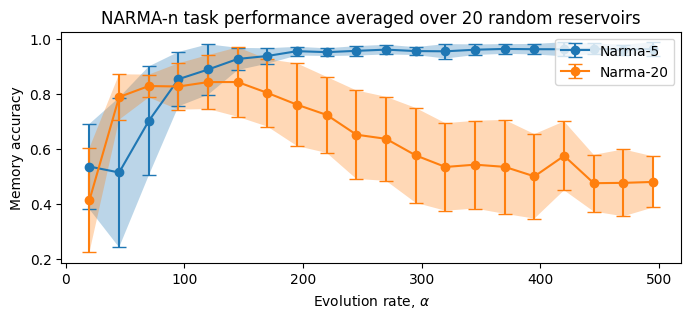

In [20]:
#Plot results
plt.figure(figsize=(8, 3))
for i in range(len(ns)):
    x_data = evolution_rates
    y_data = results_ma[:,i,:]

    mean = np.mean(y_data, axis=1)
    std = np.std(y_data, axis=1)
    plt.fill_between(x_data, mean - std, mean + std, alpha=0.3)
    plt.errorbar(x_data, mean, yerr=std, fmt='o', linestyle='-', capsize=5, label = 'Narma-' + str(ns[i]))
    plt.title(f'Narma-{ns[i]}')
    plt.xlabel(r'Evolution rate, $\alpha$')
    plt.ylabel('Memory accuracy')

plt.legend(loc='upper right')
plt.title('NARMA-n task performance averaged over 20 random reservoirs')